In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
dataSet = pd.read_csv("data.csv")

In [3]:
dataSet

#                 From   To (Interval: 15M)  \
0        1  2023-02-01 00:00:00  2023-02-01 00:15:00   
1        2  2023-02-01 00:15:00  2023-02-01 00:30:00   
2        3  2023-02-01 00:30:00  2023-02-01 00:45:00   
3        4  2023-02-01 00:45:00  2023-02-01 01:00:00   
4        5  2023-02-01 01:00:00  2023-02-01 01:15:00   
...    ...                  ...                  ...   
8638  8639  2023-05-01 23:30:00  2023-05-01 23:45:00   
8639  8640  2023-05-01 23:45:00  2023-05-02 00:00:00   
8640  8641                  Min                  NaN   
8641  8642                  Max                  NaN   
8642  8643                 Avg.                  NaN   

      Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
0                                                 95.00       
1                                                 95.00       
2                                                 95.00       
3                                                122.00       
4                                                122.00       
...                                                 ...       
8638                                              19.00       
8639                                              32.00       
8640                                              12.00       
8641                                             847.00       
8642                                             181.41       

      Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
0                                                 35.00        
1                                                 35.00        
2                                                 35.00        
3                                                 34.00        
4                                                 34.00        
...                                                 ...        
8638                                              11.00        
8639                                               6.00        
8640                                               3.00        
8641                                             474.00        
8642                                              75.69        

      Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
8638                                              20.80     
8639                                              21.80     
8640                                               0.10     
8641                                             157.50     
8642                                              14.65     

      Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
0                                                 90.10      
1                                                 88.00      
2                                                 87.70      
3                                                 88.90      
4                                                 90.00      
...                                                 ...      
8638                                             100.20      
8639                                              98.80      
8640                                               0.20      
8641                                             106.90      
8642                                              55.76      

      Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
0                                                 56.20    
1                                                 55.10    
2                                                 55.20    
3                                                 55.70    
4                               

In [4]:
dataSet.describe()

#  Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
count  8643.000000                                        6962.000000       
mean   4322.000000                                         181.479950       
std    2495.163522                                         136.235742       
min       1.000000                                          12.000000       
25%    2161.500000                                          84.000000       
50%    4322.000000                                         145.000000       
75%    6482.500000                                         238.000000       
max    8643.000000                                         847.000000       

       Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
count                                        8417.000000        
mean                                           75.729083        
std                                            55.411450        
min                                             3.000000        
25%                                            36.000000        
50%                                            61.000000        
75%                                           101.000000        
max                                           474.000000        

       Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
count                                        7274.000000     
mean                                           14.667274     
std                                            19.291029     
min                                             0.100000     
25%                                             3.900000     
50%                                             6.100000     
75%                                            16.500000     
max                                           157.500000     

       Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
count                                        8227.000000      
mean                                           55.756492      
std                                            20.244845      
min                                             0.200000      
25%                                            39.400000      
50%                                            53.200000      
75%                                            71.050000      
max                                           106.900000      

       Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
count                                        8228.000000    
mean                                           42.682434    
std                                            22.475811    
min                                             4.200000    
25%                                            25.000000    
50%                                            37.700000    
75%                                            53.800000    
max                                           165.200000    

       Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)  \
count                                        8147.000000     
mean                                            1.408695     
std                                             0.631759     
min                                             0.100000     
25%                                             0.950000     
50%                                             1.420000     
75%                                             1.850000     
max                                             4.000000     

       Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)  \
count                                        7192.000000      
mean                                           34.312991      
std                                            40.099306      
min                                             0.100000      
25%                                            16.100000      
50%                                            25.300000      
75%                                            35.200000    

In [5]:
columns = dataSet.columns
dates = columns[2]
columns = columns[3:]
columns

Index(['Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)'],
      dtype='object')

In [6]:
for column in columns:
    print((dataSet[column].isna().sum() / len(dataSet[column])) * 100)

19.449265301399976
2.614832812680782
15.839407613097304
4.813143584403563
4.801573527710286
5.738748119865787
16.788152261946085
3.7718384820085618
5.2412356820548425
71.67650121485595


In [7]:
dataSet

#                 From   To (Interval: 15M)  \
0        1  2023-02-01 00:00:00  2023-02-01 00:15:00   
1        2  2023-02-01 00:15:00  2023-02-01 00:30:00   
2        3  2023-02-01 00:30:00  2023-02-01 00:45:00   
3        4  2023-02-01 00:45:00  2023-02-01 01:00:00   
4        5  2023-02-01 01:00:00  2023-02-01 01:15:00   
...    ...                  ...                  ...   
8638  8639  2023-05-01 23:30:00  2023-05-01 23:45:00   
8639  8640  2023-05-01 23:45:00  2023-05-02 00:00:00   
8640  8641                  Min                  NaN   
8641  8642                  Max                  NaN   
8642  8643                 Avg.                  NaN   

      Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
0                                                 95.00       
1                                                 95.00       
2                                                 95.00       
3                                                122.00       
4                                                122.00       
...                                                 ...       
8638                                              19.00       
8639                                              32.00       
8640                                              12.00       
8641                                             847.00       
8642                                             181.41       

      Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
0                                                 35.00        
1                                                 35.00        
2                                                 35.00        
3                                                 34.00        
4                                                 34.00        
...                                                 ...        
8638                                              11.00        
8639                                               6.00        
8640                                               3.00        
8641                                             474.00        
8642                                              75.69        

      Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
8638                                              20.80     
8639                                              21.80     
8640                                               0.10     
8641                                             157.50     
8642                                              14.65     

      Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
0                                                 90.10      
1                                                 88.00      
2                                                 87.70      
3                                                 88.90      
4                                                 90.00      
...                                                 ...      
8638                                             100.20      
8639                                              98.80      
8640                                               0.20      
8641                                             106.90      
8642                                              55.76      

      Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
0                                                 56.20    
1                                                 55.10    
2                                                 55.20    
3                                                 55.70    
4                               

In [8]:
for column in columns:
    y = pd.Series(dataSet[column])
    dataSet[column] = y.interpolate(limit_direction='both', kind='cubic')

In [9]:
dataSet.describe()

#  Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
count  8643.000000                                        8643.000000       
mean   4322.000000                                         177.521857       
std    2495.163522                                         124.972306       
min       1.000000                                          12.000000       
25%    2161.500000                                          97.000000       
50%    4322.000000                                         151.944444       
75%    6482.500000                                         215.000000       
max    8643.000000                                         847.000000       

       Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
count                                        8643.000000        
mean                                           75.595070        
std                                            54.990164        
min                                             3.000000        
25%                                            36.642857        
50%                                            61.000000        
75%                                           101.000000        
max                                           474.000000        

       Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
count                                        8643.000000     
mean                                           14.954952     
std                                            17.926000     
min                                             0.100000     
25%                                             4.000000     
50%                                             7.500000     
75%                                            18.100000     
max                                           157.500000     

       Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
count                                        8643.000000      
mean                                           55.430292      
std                                            20.218340      
min                                             0.200000      
25%                                            39.300000      
50%                                            52.800000      
75%                                            70.700000      
max                                           106.900000      

       Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
count                                        8643.000000    
mean                                           42.338646    
std                                            22.220510    
min                                             4.200000    
25%                                            24.900000    
50%                                            37.500000    
75%                                            53.200000    
max                                           165.200000    

       Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)  \
count                                         8643.00000     
mean                                             1.40205     
std                                              0.63379     
min                                              0.10000     
25%                                              0.95000     
50%                                              1.41000     
75%                                              1.85000     
max                                              4.00000     

       Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)  \
count                                        8643.000000      
mean                                           31.990314      
std                                            39.577810      
min                                             0.100000      
25%                                            12.300000      
50%                                            22.800000      
75%                                            33.400000    

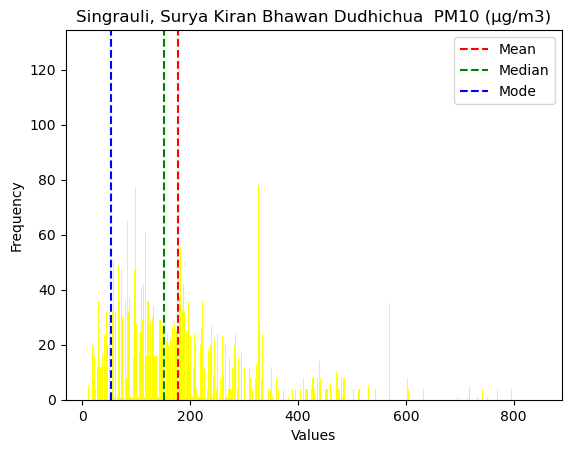

Mean = 177.52185699409927 , Median = 151.94444444444446 , Mode = 53.0


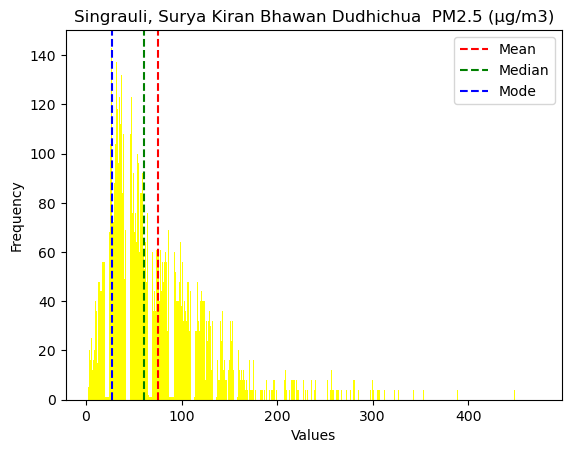

Mean = 75.59506999884299 , Median = 61.0 , Mode = 27.0


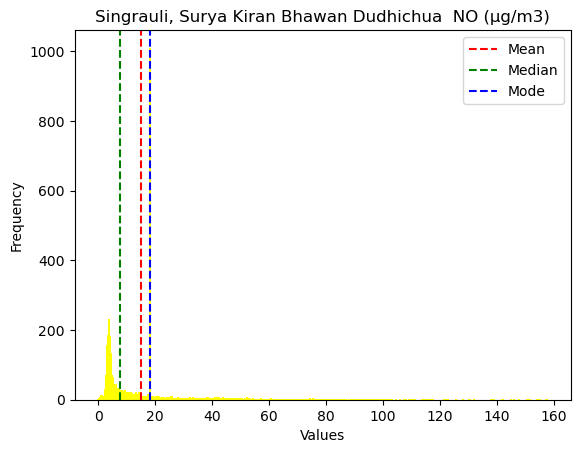

Mean = 14.95495198426471 , Median = 7.5 , Mode = 18.1


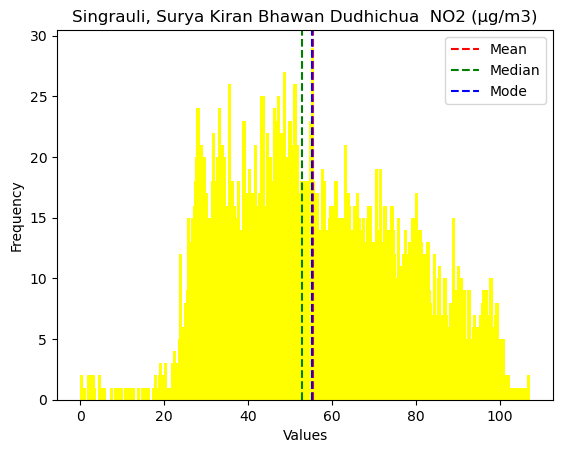

Mean = 55.43029156542875 , Median = 52.8 , Mode = 55.3


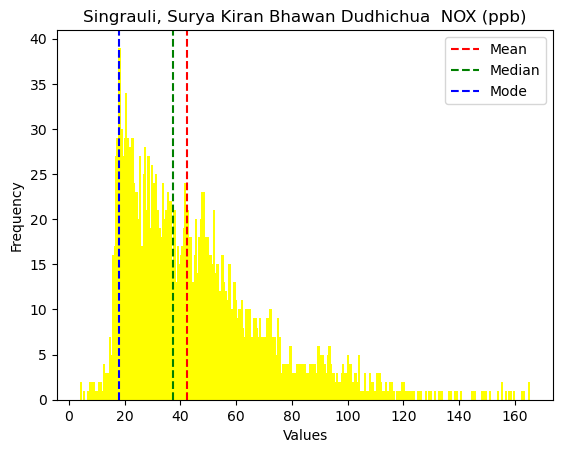

Mean = 42.33864630336682 , Median = 37.5 , Mode = 18.1


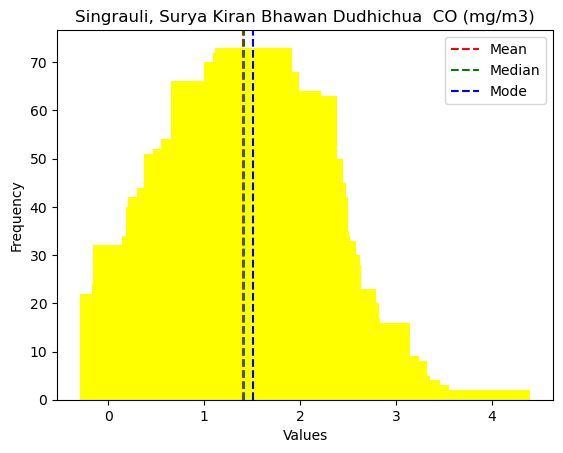

Mean = 1.402049635543208 , Median = 1.41 , Mode = 1.51


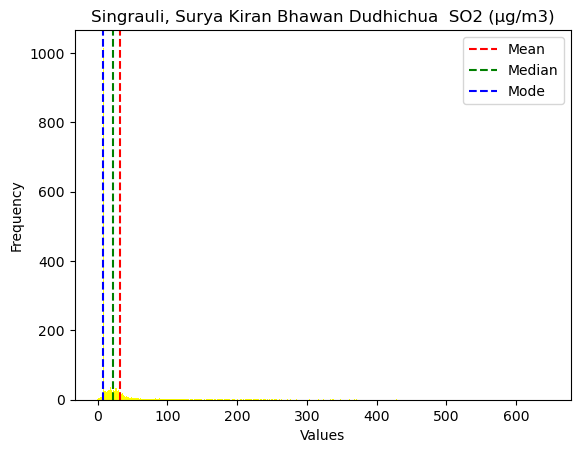

Mean = 31.9903135485365 , Median = 22.8 , Mode = 8.2


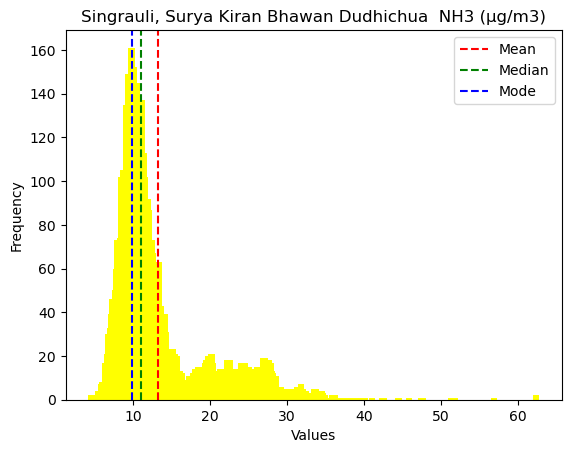

Mean = 13.29162790697677 , Median = 11.0 , Mode = 9.8


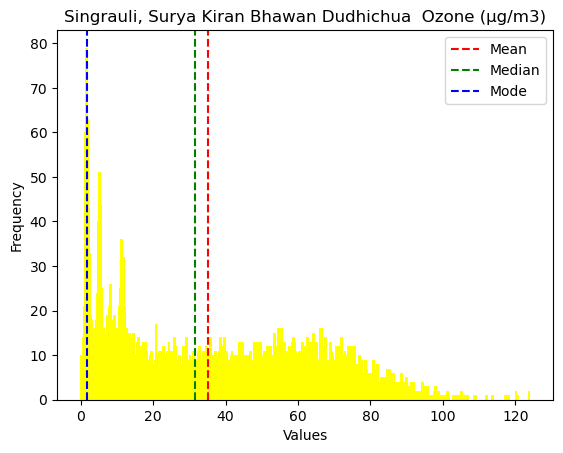

Mean = 35.200211732037424 , Median = 31.7 , Mode = 1.7


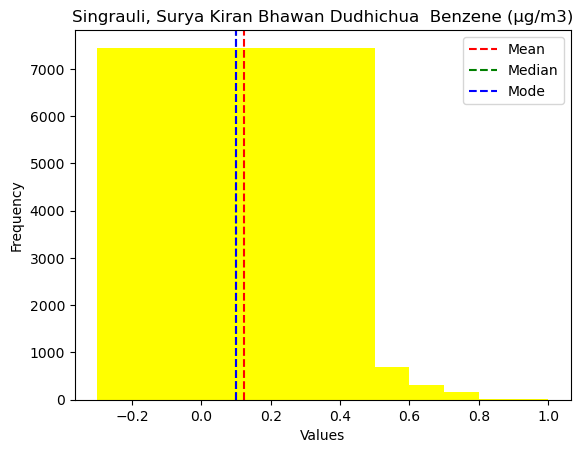

Mean = 0.12206178410275549 , Median = 0.1 , Mode = 0.1


In [10]:
for column in columns:
    value_counts = dataSet[column].value_counts()
    value_counts = value_counts.sort_index()
    values = value_counts.index.tolist()
    frequencies = value_counts.values.tolist()
    plt.bar(values, frequencies , color='yellow')
#     plt.plot(values,frequencies , color = 'black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(column)
    mean_value = dataSet[column].mean()
    median_value = dataSet[column].median()
    mode_value = dataSet[column].mode()[0]
    std_dev = np.std(dataSet[column])
    variance = np.var(dataSet[column])
    plt.axvline(mean_value, color='r', linestyle='--', label='Mean')
    plt.axvline(median_value, color='g', linestyle='--', label='Median')
    plt.axvline(mode_value, color='b', linestyle='--', label='Mode')
    plt.legend()
    plt.show()
    print("Mean =",mean_value,", Median =",median_value,", Mode =",mode_value)

In [11]:
for column in columns:
    print(column,"-")
    std_dev = np.std(dataSet[column])
    variance = np.var(dataSet[column])
    ran = np.ptp(dataSet[column])
    print("\nRange =", ran)
    print("Variance =", variance)
    print("Standard Deviation =",std_dev)
    print("\n")

Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3) -

Range = 835.0
Variance = 15616.270302349527
Standard Deviation = 124.96507633074741


Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3) -

Range = 471.0
Variance = 3023.5682353370844
Standard Deviation = 54.98698241708745


Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3) -

Range = 157.4
Variance = 321.3043064520576
Standard Deviation = 17.92496322038228


Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3) -

Range = 106.7
Variance = 408.73398088196217
Standard Deviation = 20.217170446973093


Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb) -

Range = 161.0
Variance = 493.69391594600773
Standard Deviation = 22.219224017638595


Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3) -

Range = 3.9
Variance = 0.4016429823988621
Standard Deviation = 0.6337530926148306


Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3) -

Range = 645.5
Variance = 1566.2218029429519
Standard Deviation = 39.57552024854445


Singrauli, Su

<Figure size 2000x700 with 0 Axes>

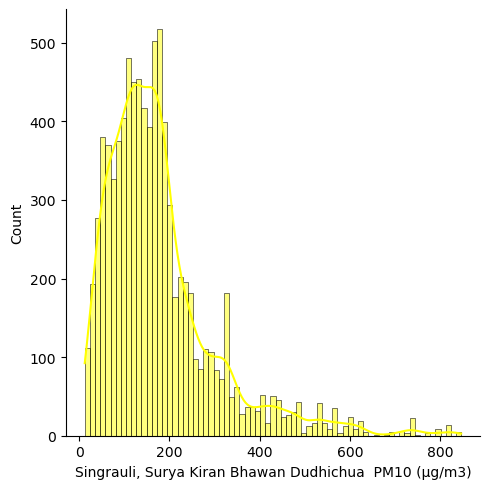

<Figure size 2000x700 with 0 Axes>

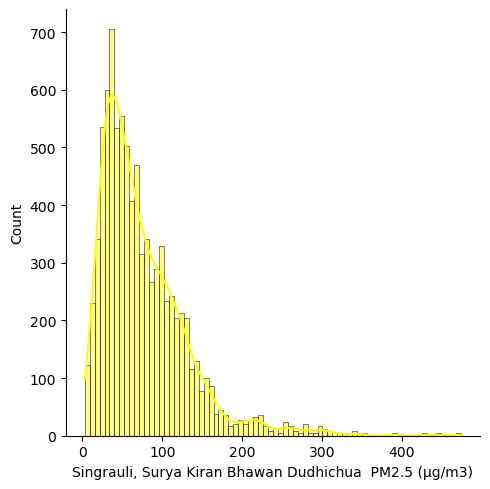

<Figure size 2000x700 with 0 Axes>

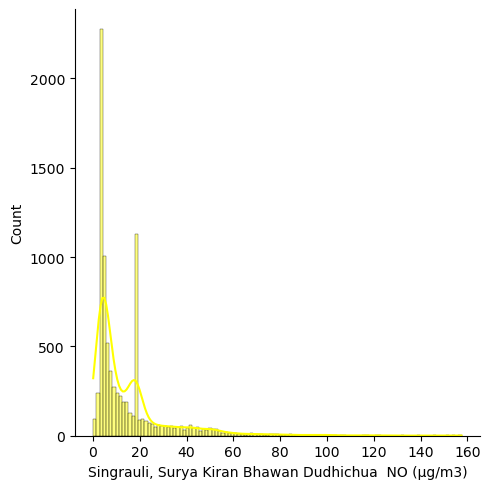

<Figure size 2000x700 with 0 Axes>

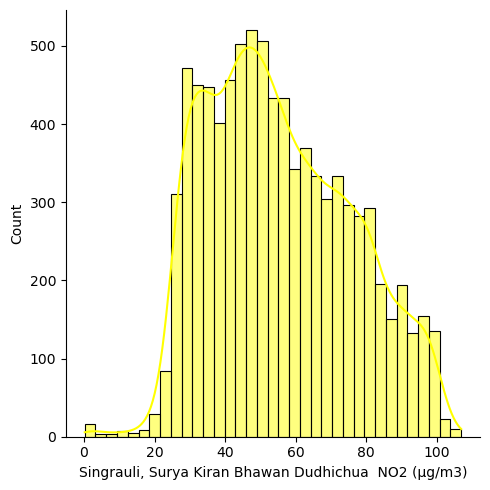

<Figure size 2000x700 with 0 Axes>

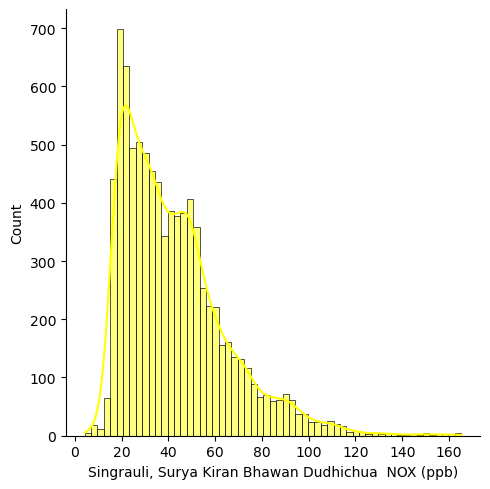

<Figure size 2000x700 with 0 Axes>

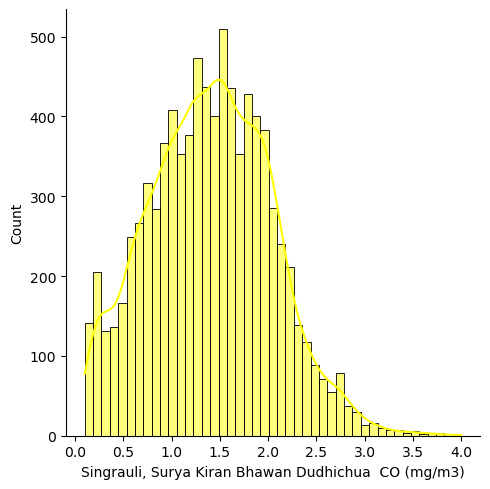

<Figure size 2000x700 with 0 Axes>

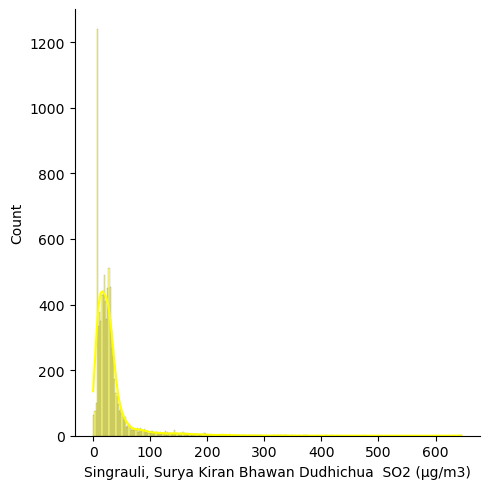

<Figure size 2000x700 with 0 Axes>

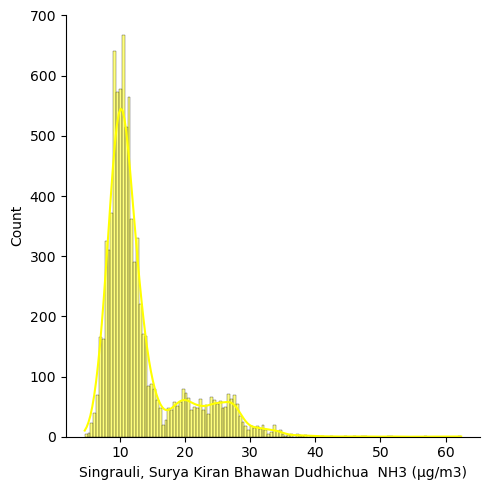

<Figure size 2000x700 with 0 Axes>

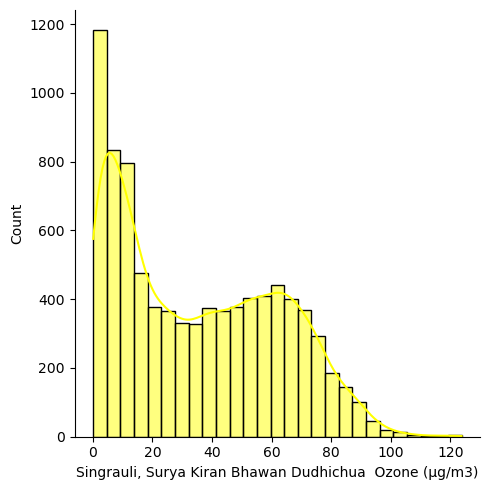

<Figure size 2000x700 with 0 Axes>

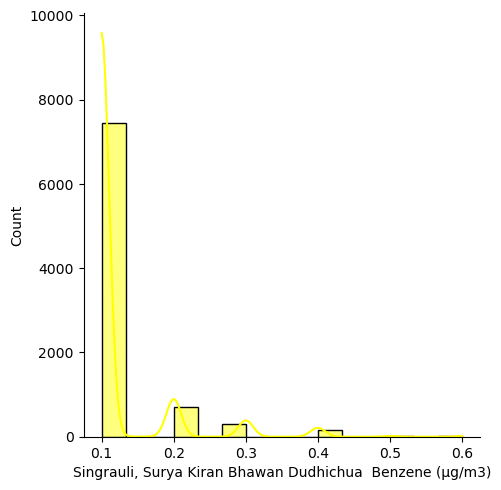

In [12]:
for column in columns:
    plt.figure(figsize=(20,7))
    sns.displot(dataSet[column], kde = True , color='yellow')
    plt.show()

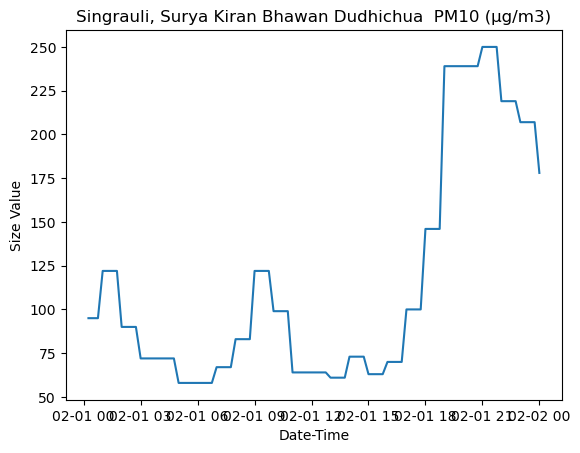

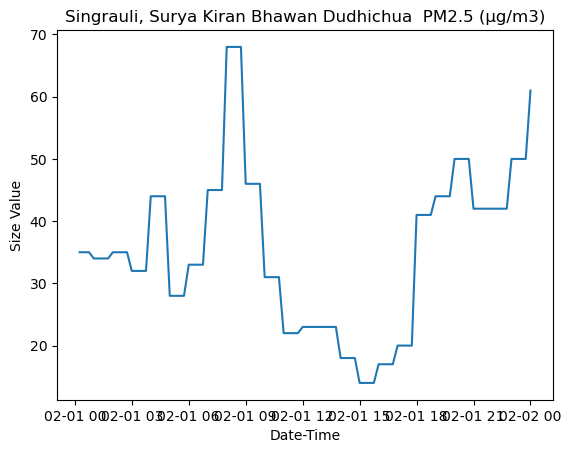

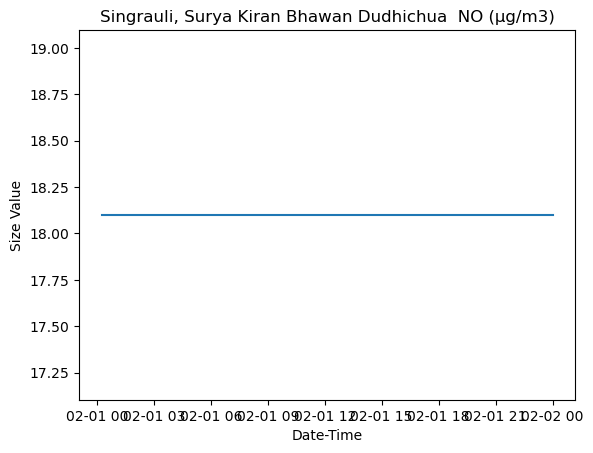

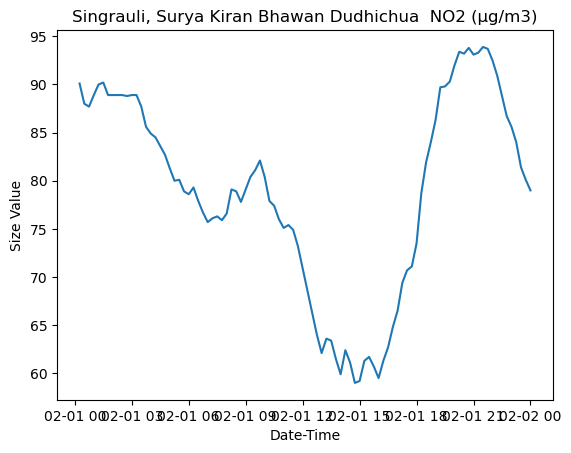

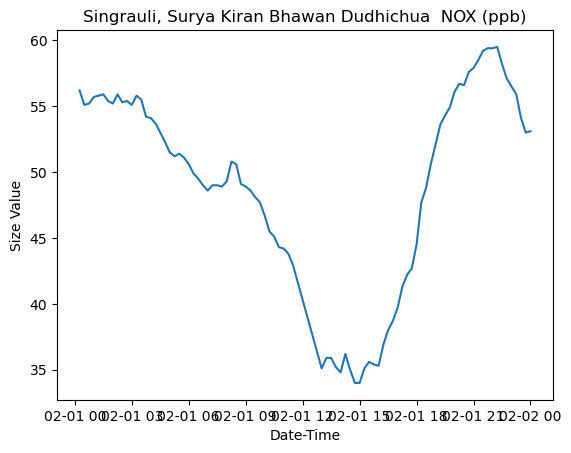

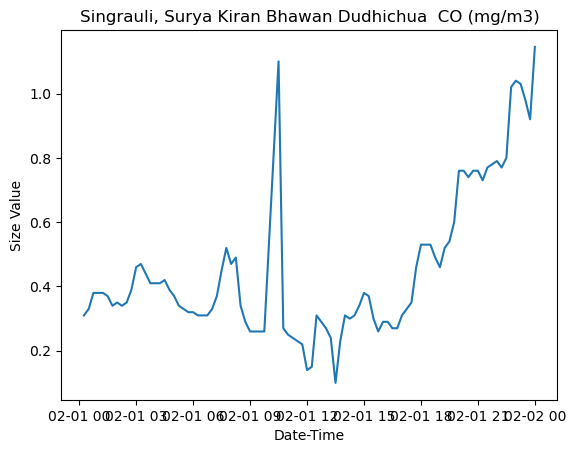

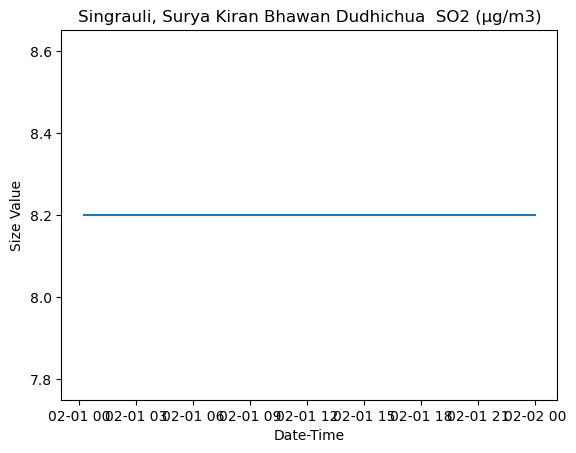

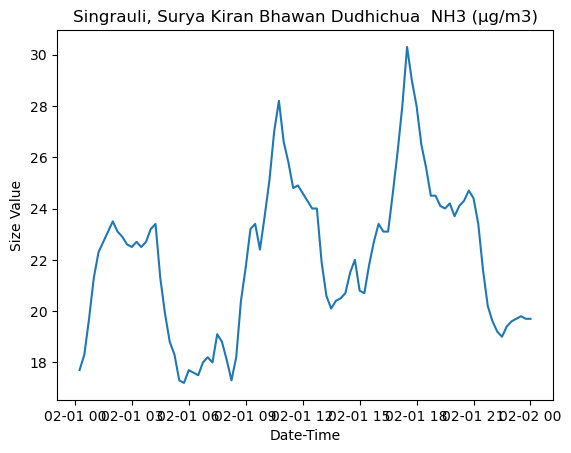

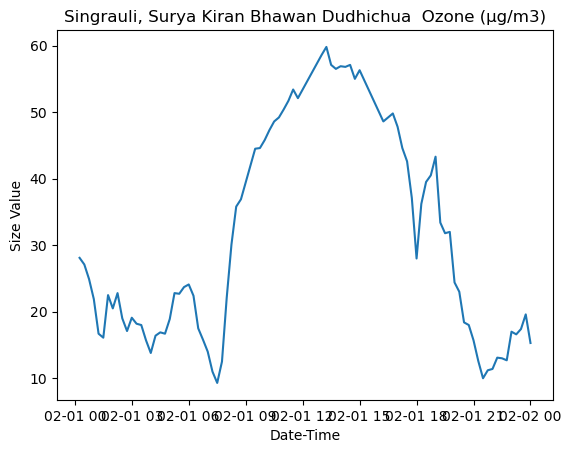

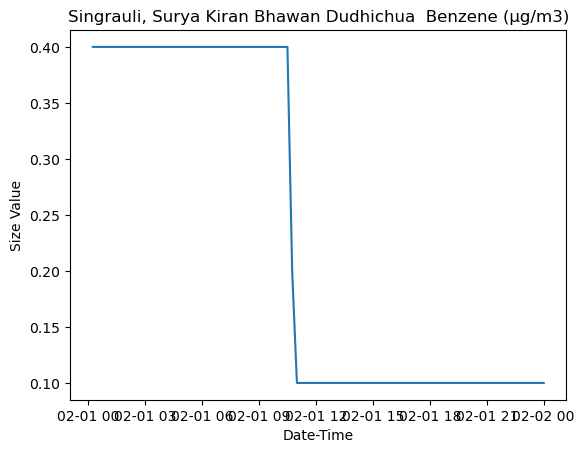

In [13]:
dat = np.array(dataSet[dates])
dates = [datetime.strptime(str(i), '%Y-%m-%d %H:%M:%S') for i in dat[:96]]
for column in columns:
    fig = plt.figure()
    data1 = dataSet[column][:96]
    ax = fig.add_subplot(111)
    ax.plot(dates , data1)
    plt.xlabel('Date-Time')
    plt.ylabel('Size Value')
    plt.title(column)
    plt.show()

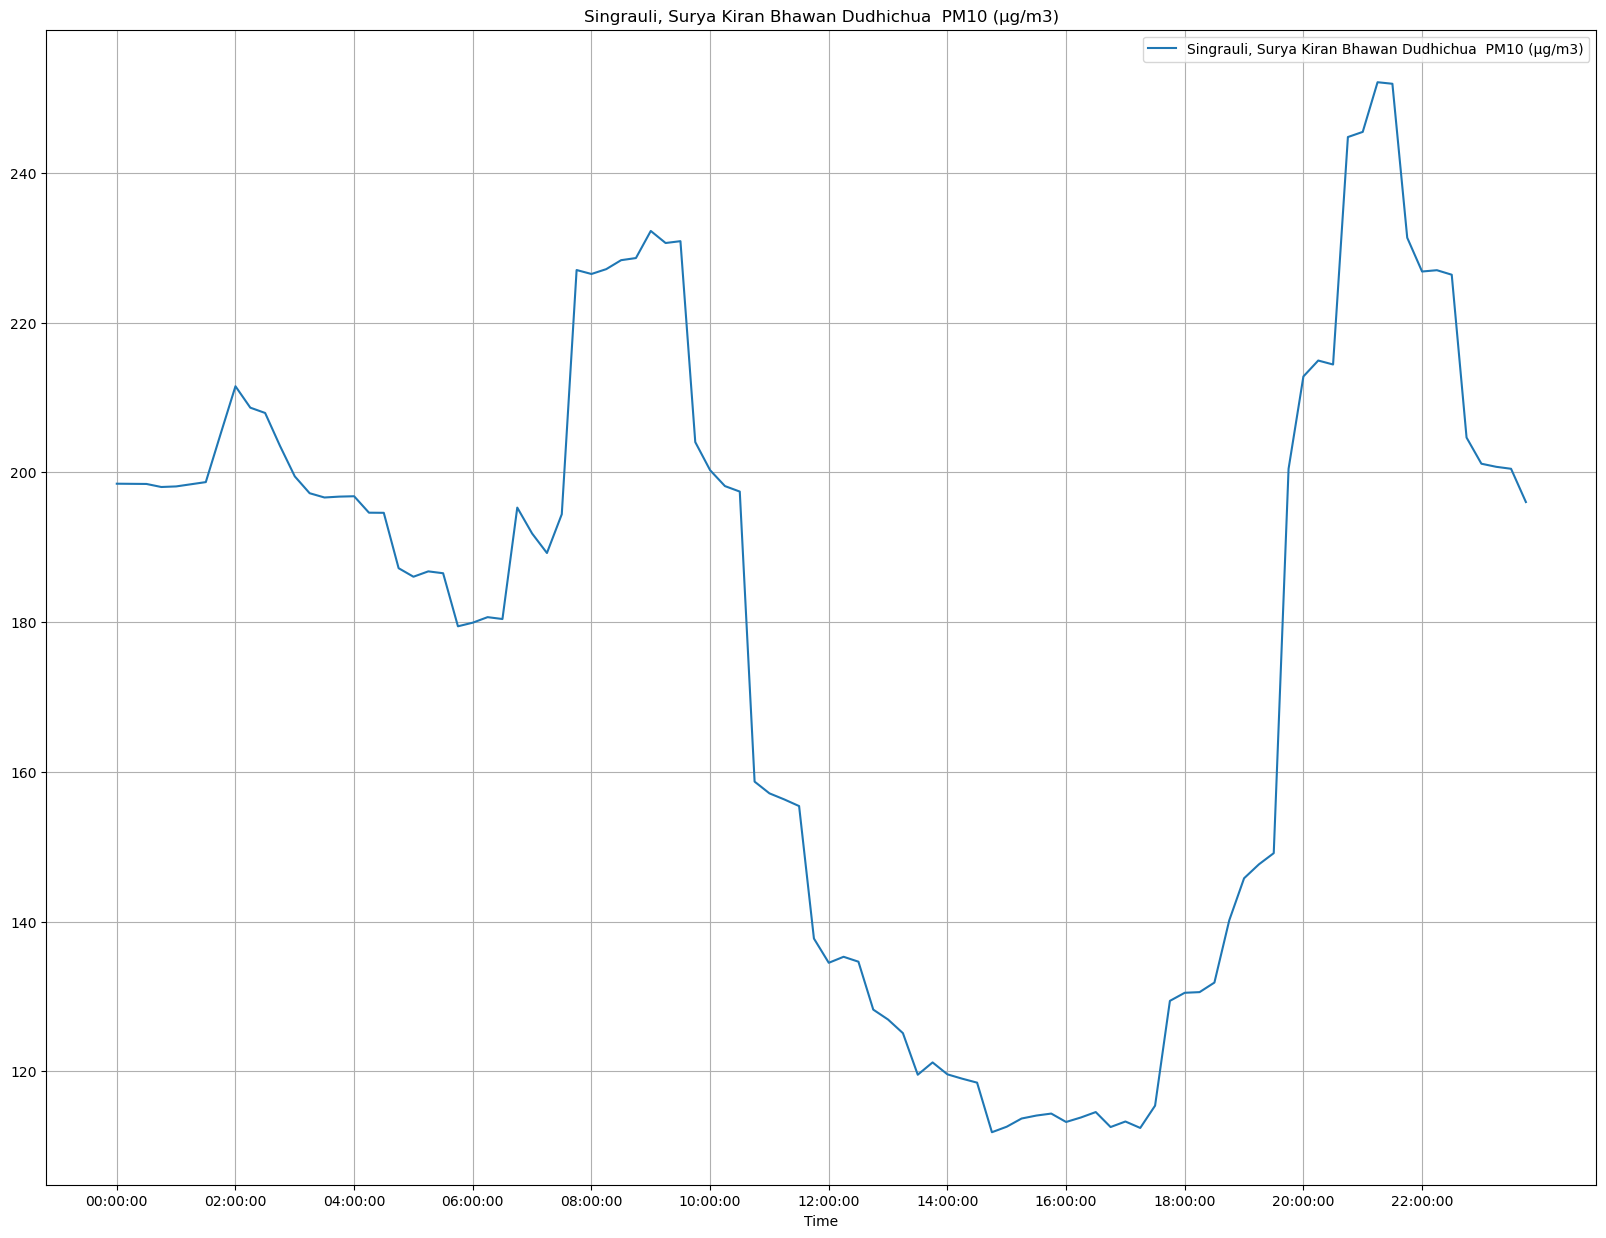

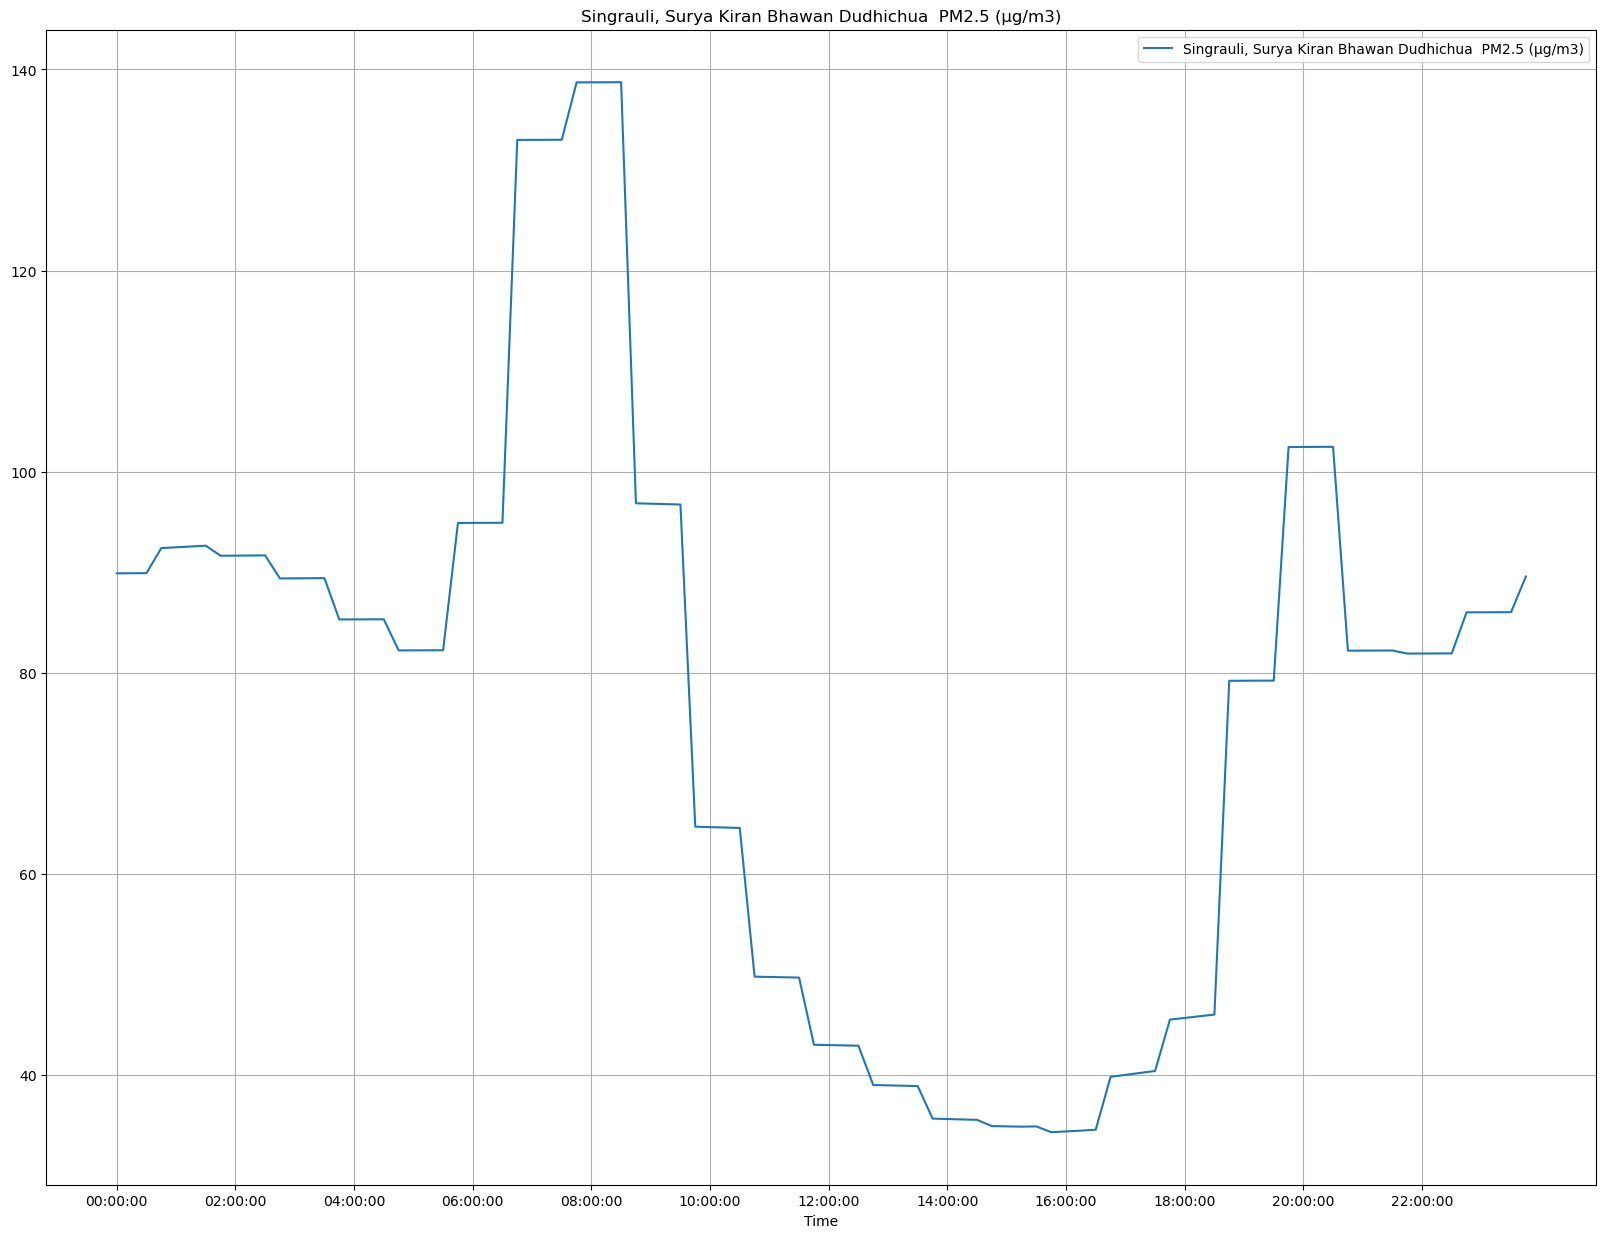

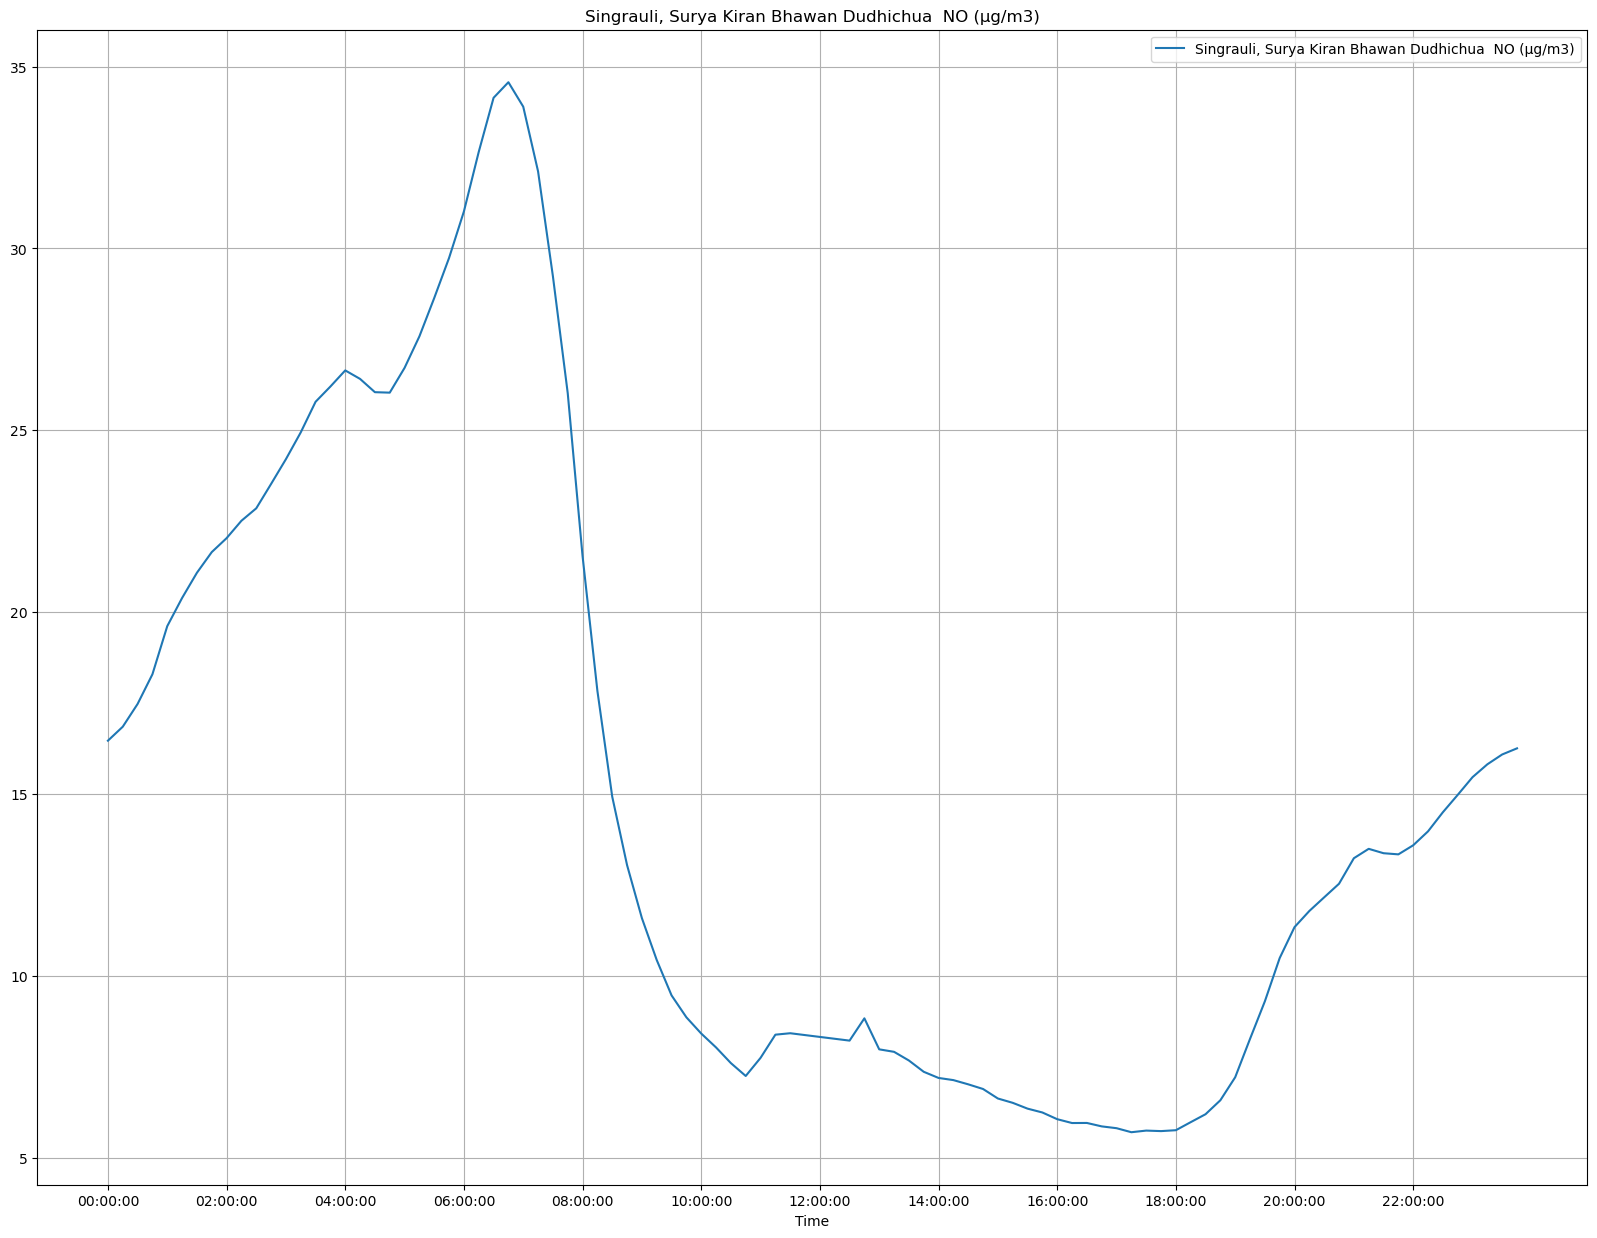

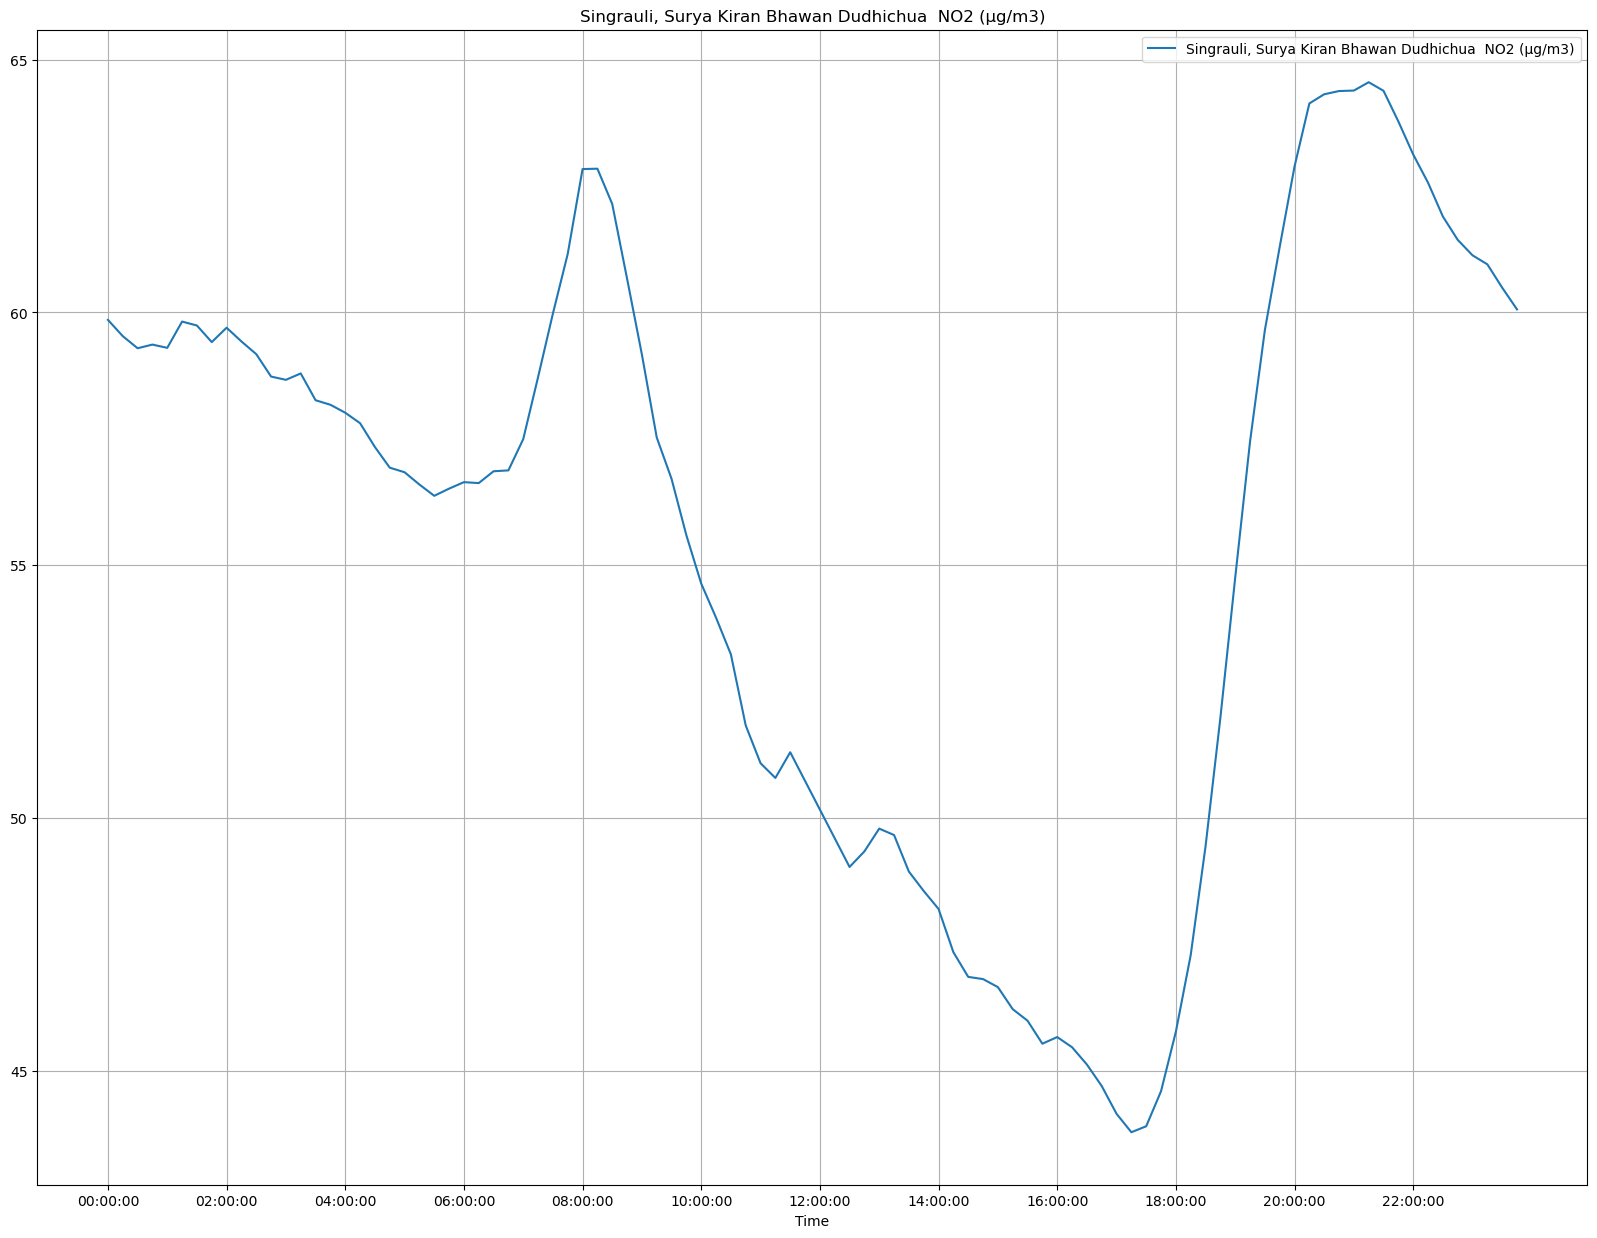

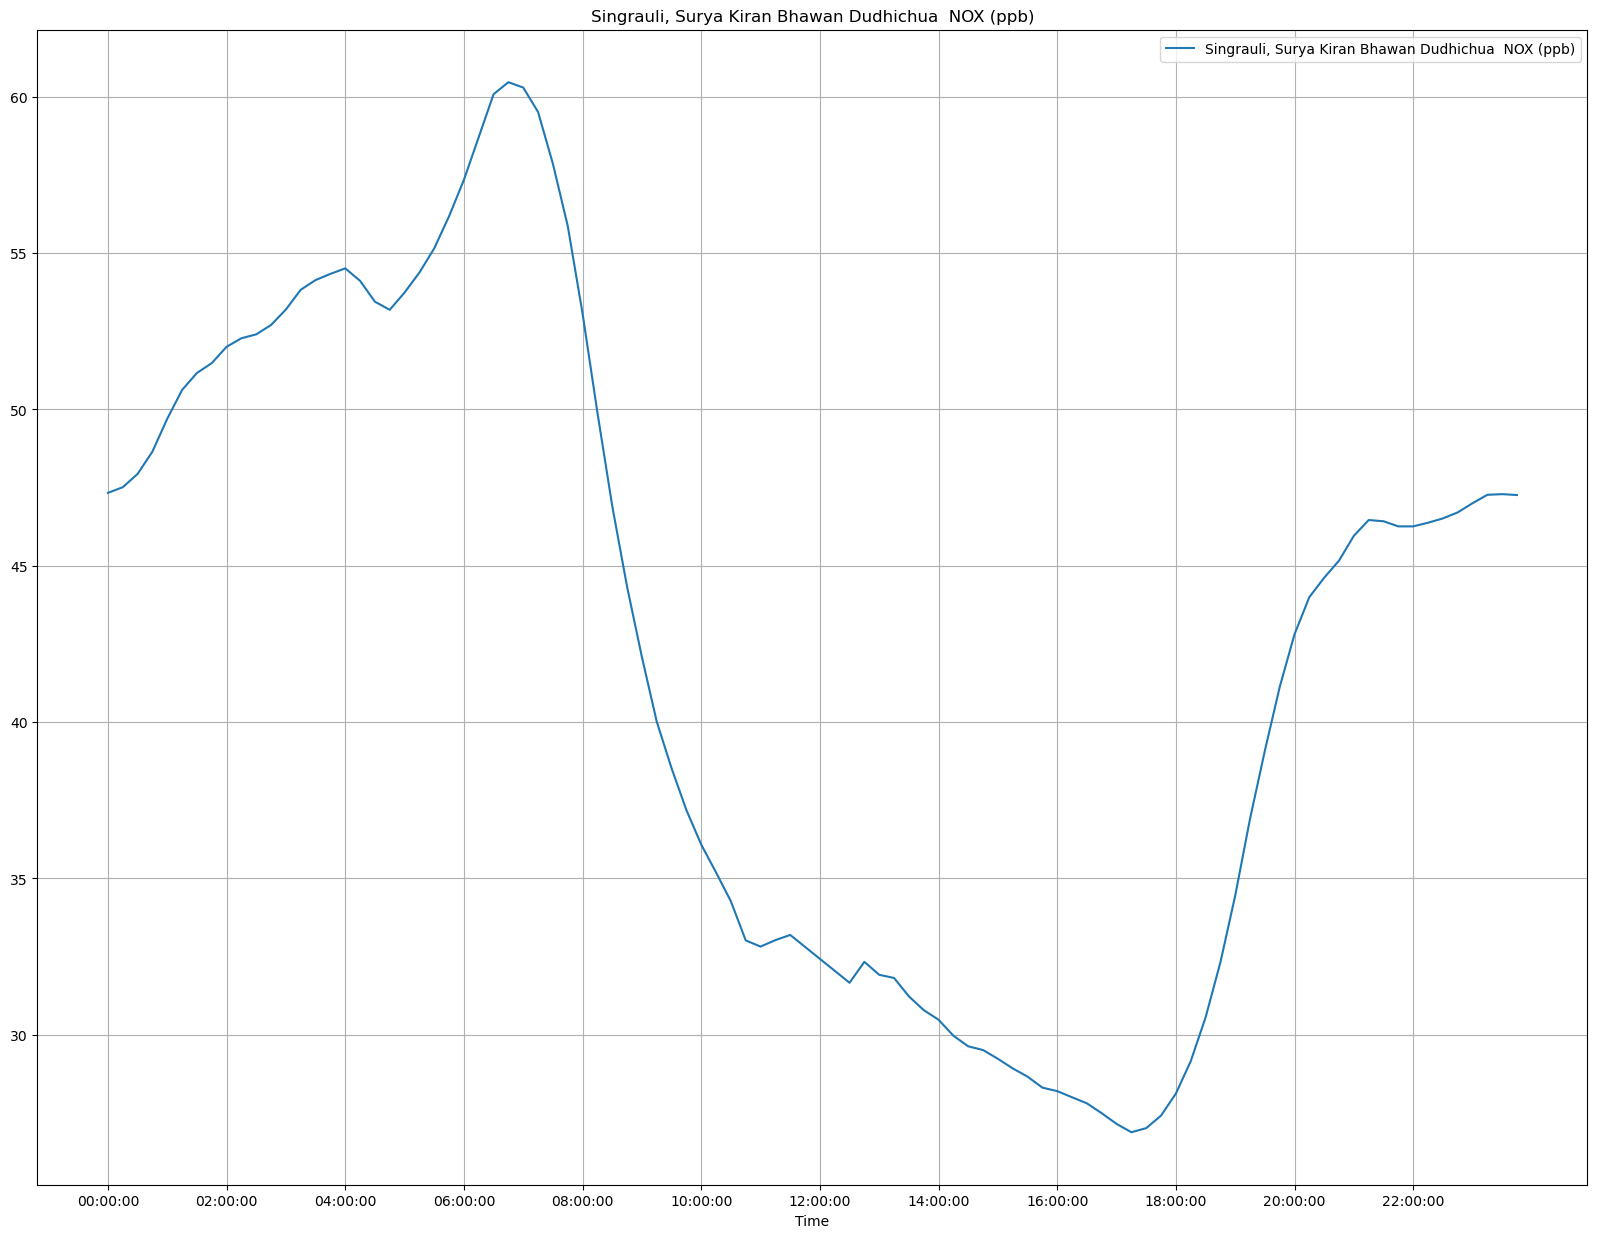

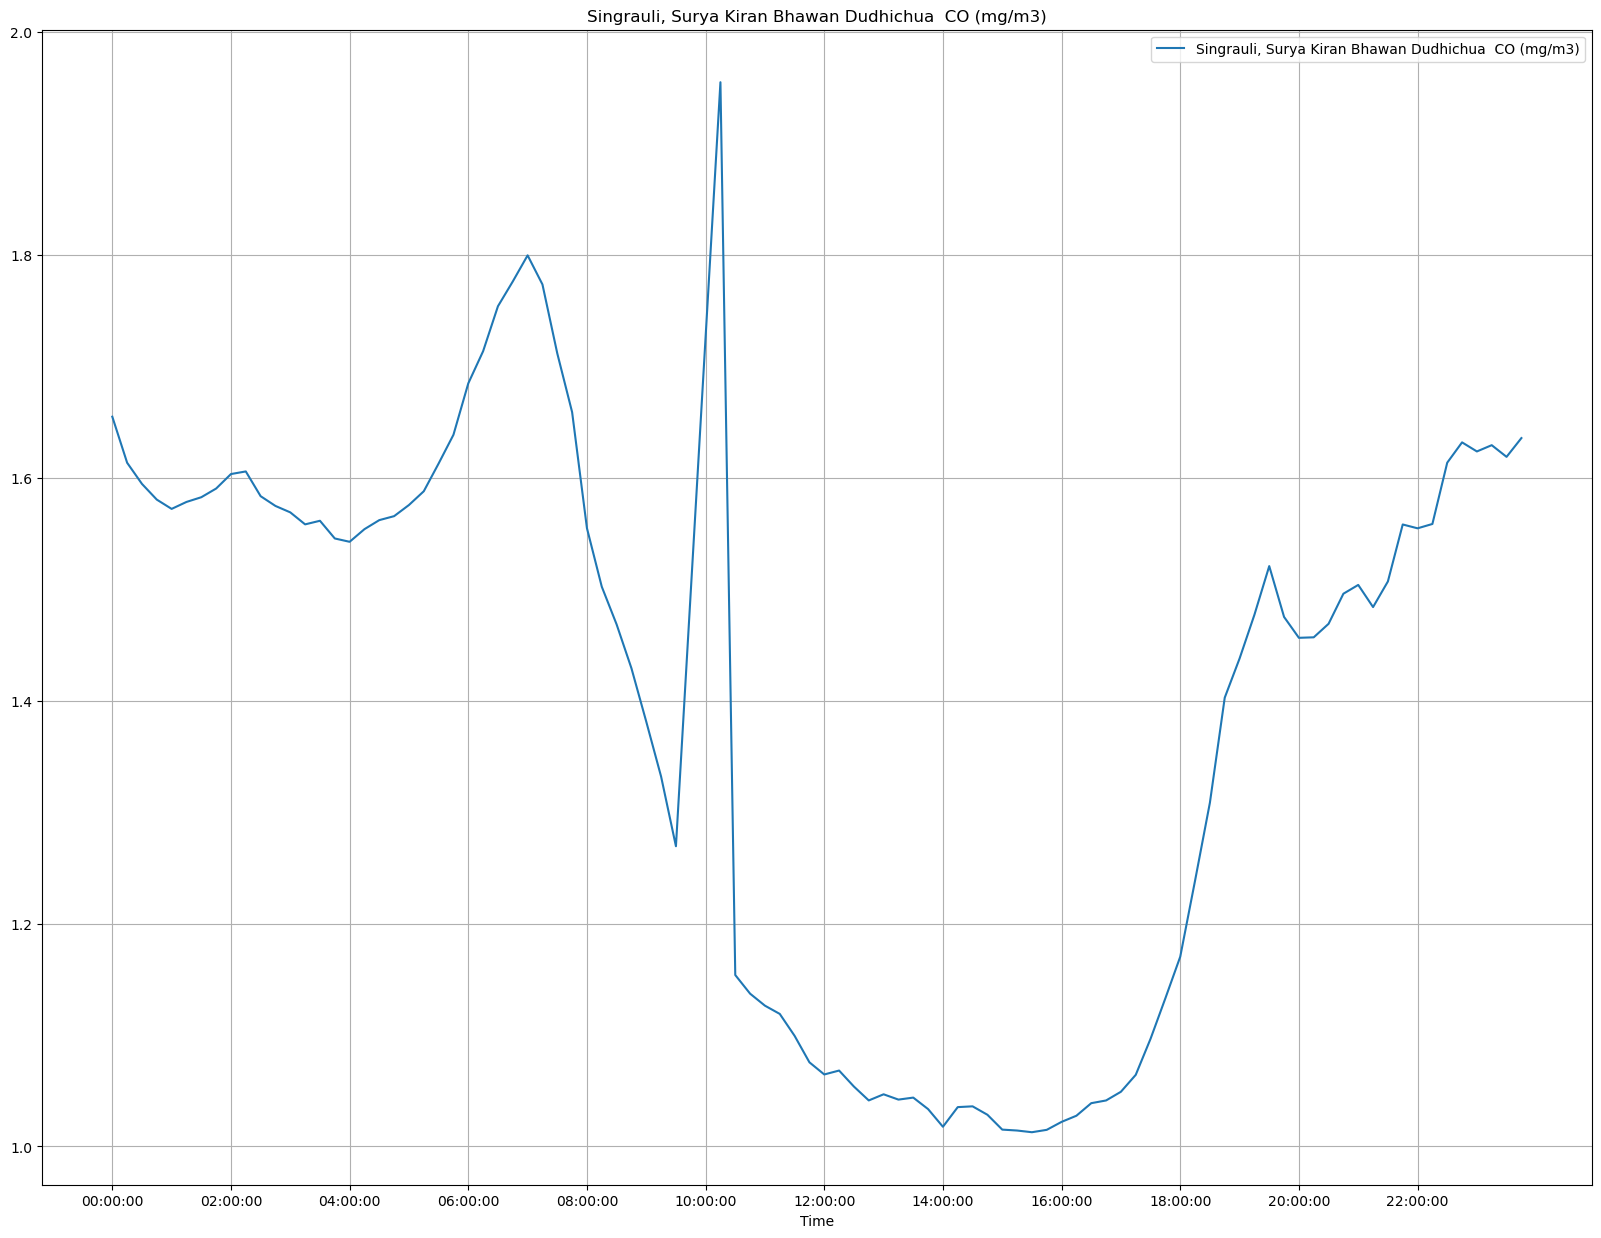

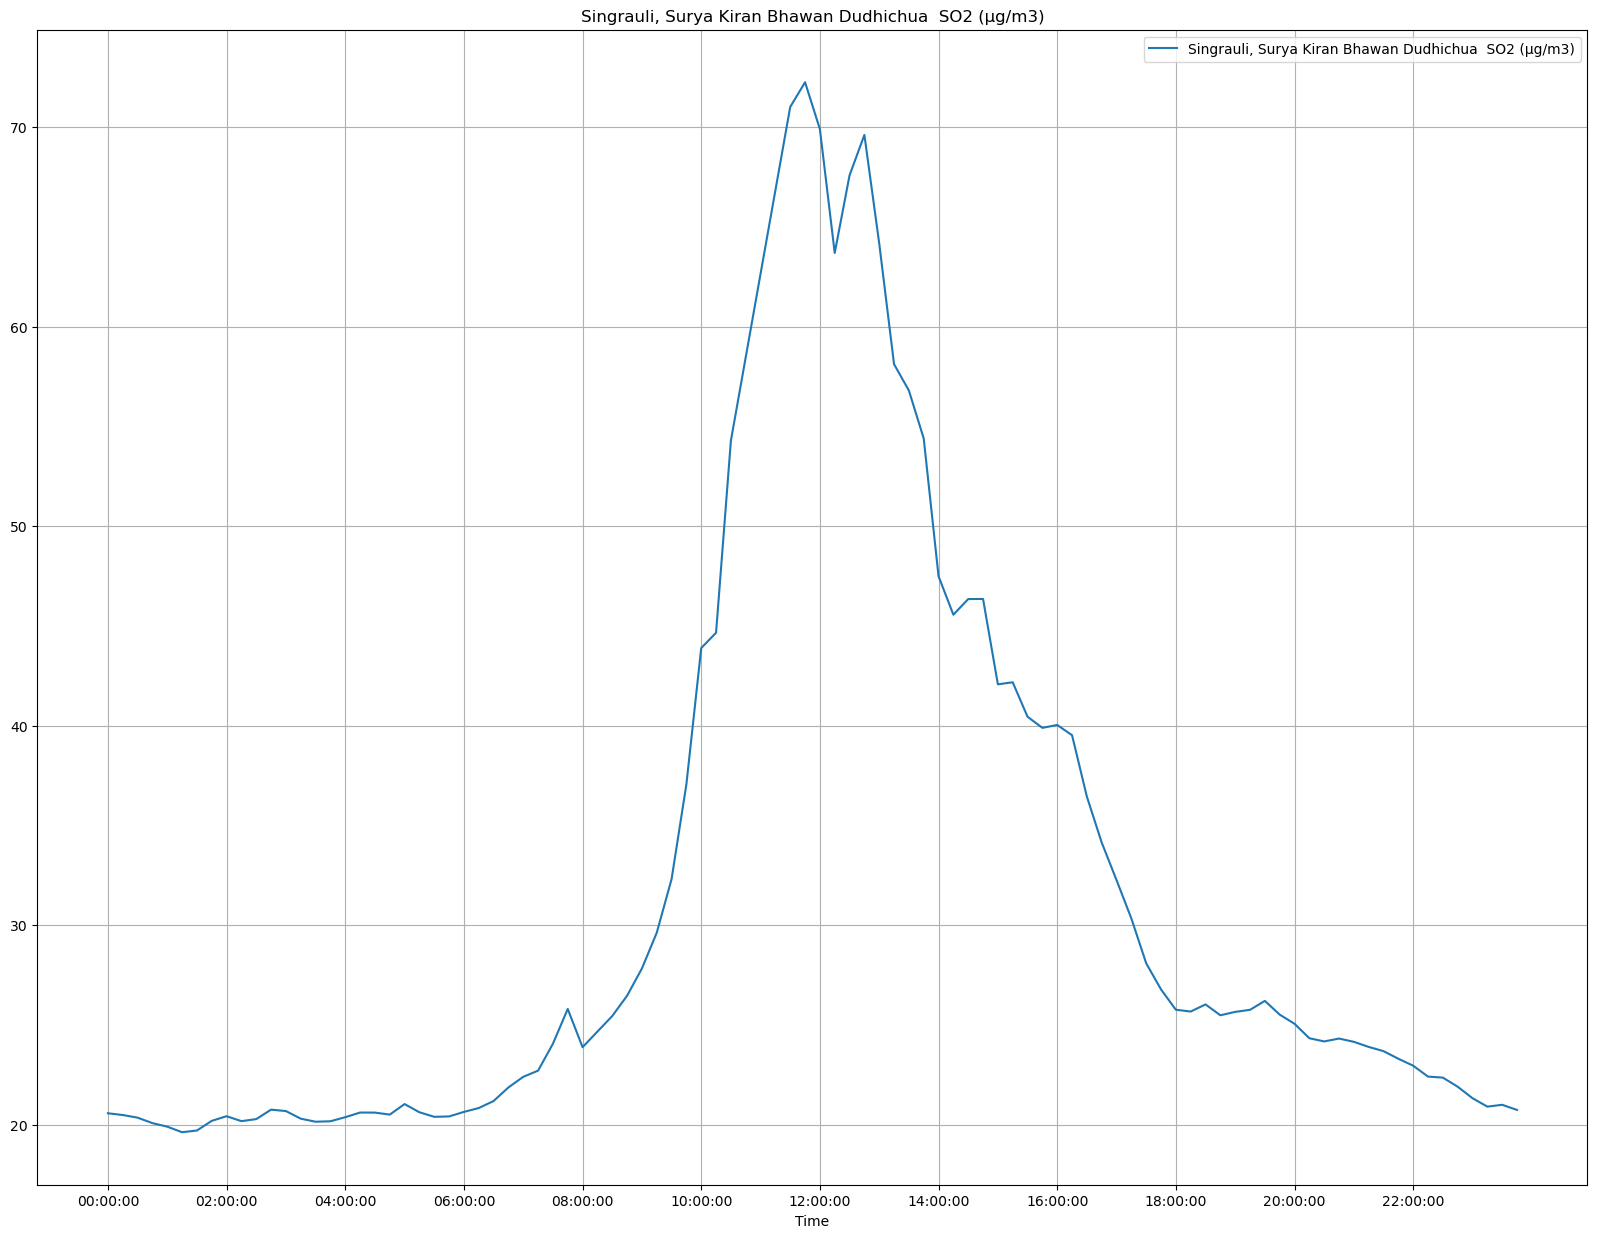

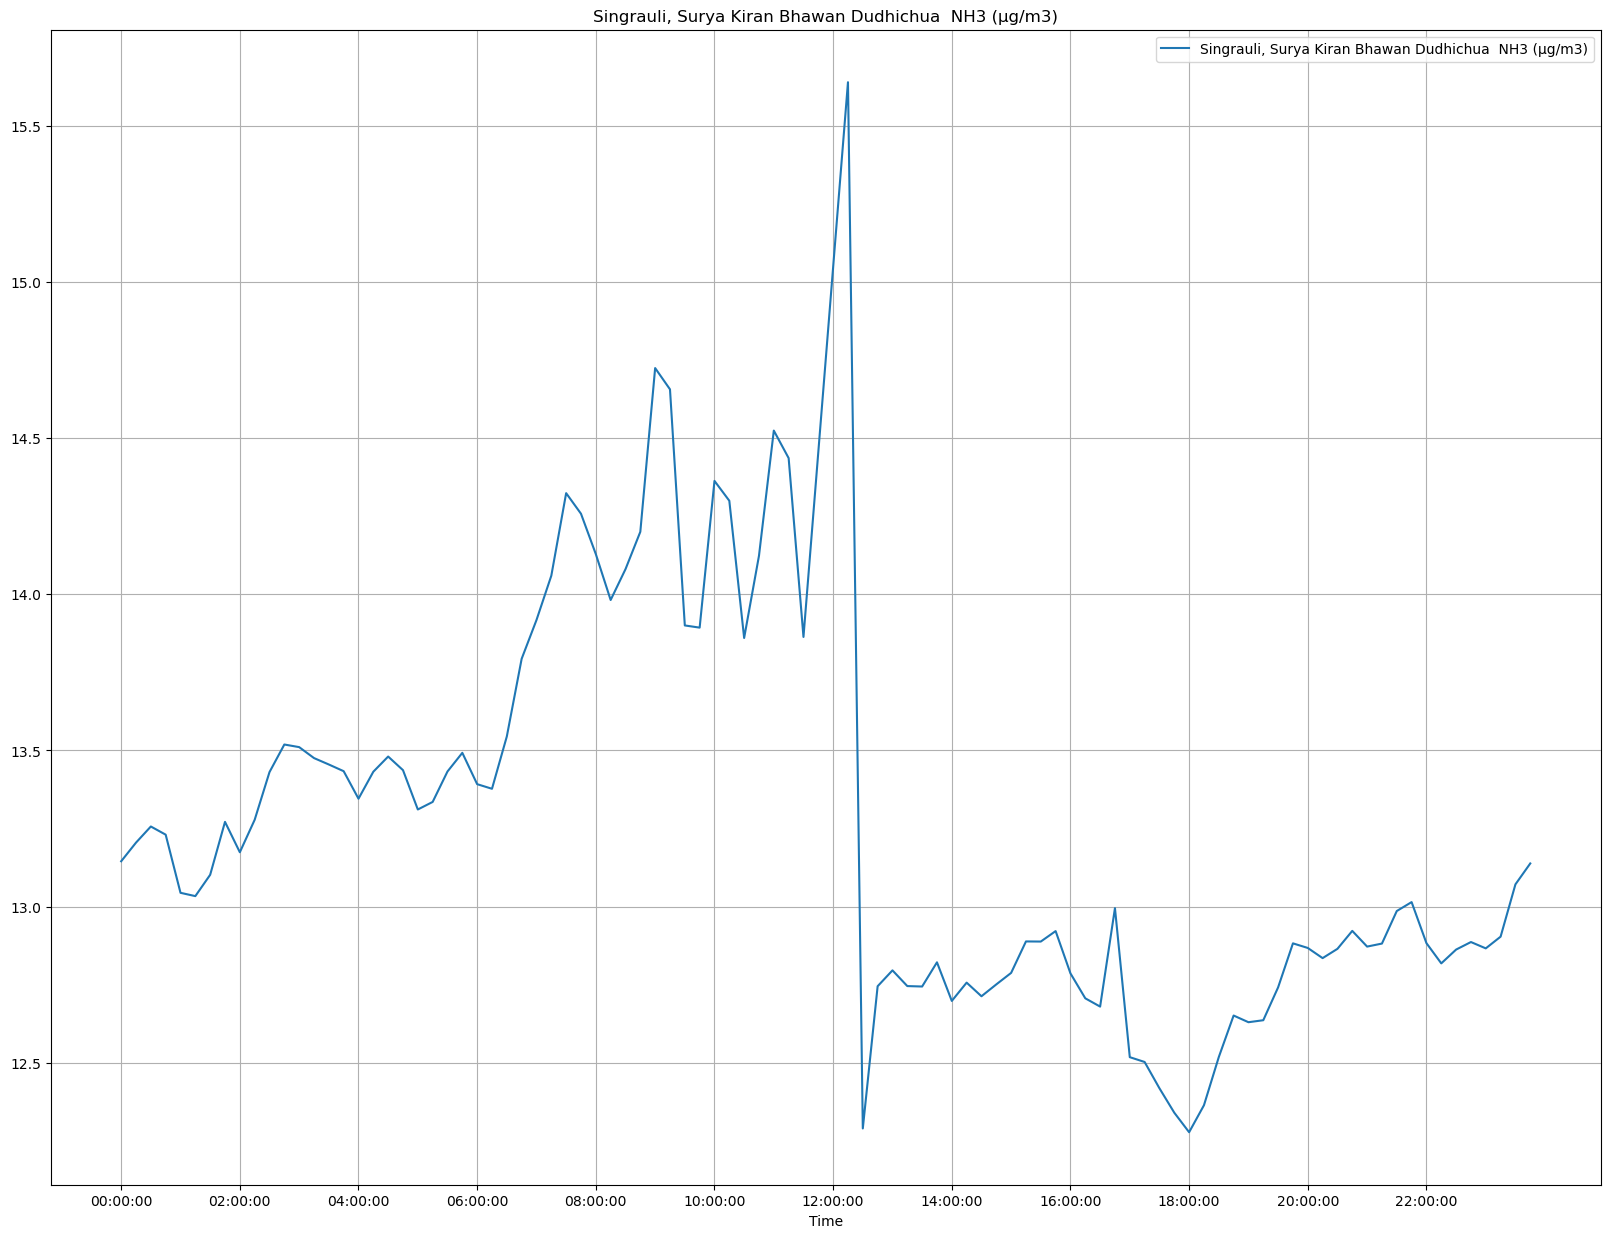

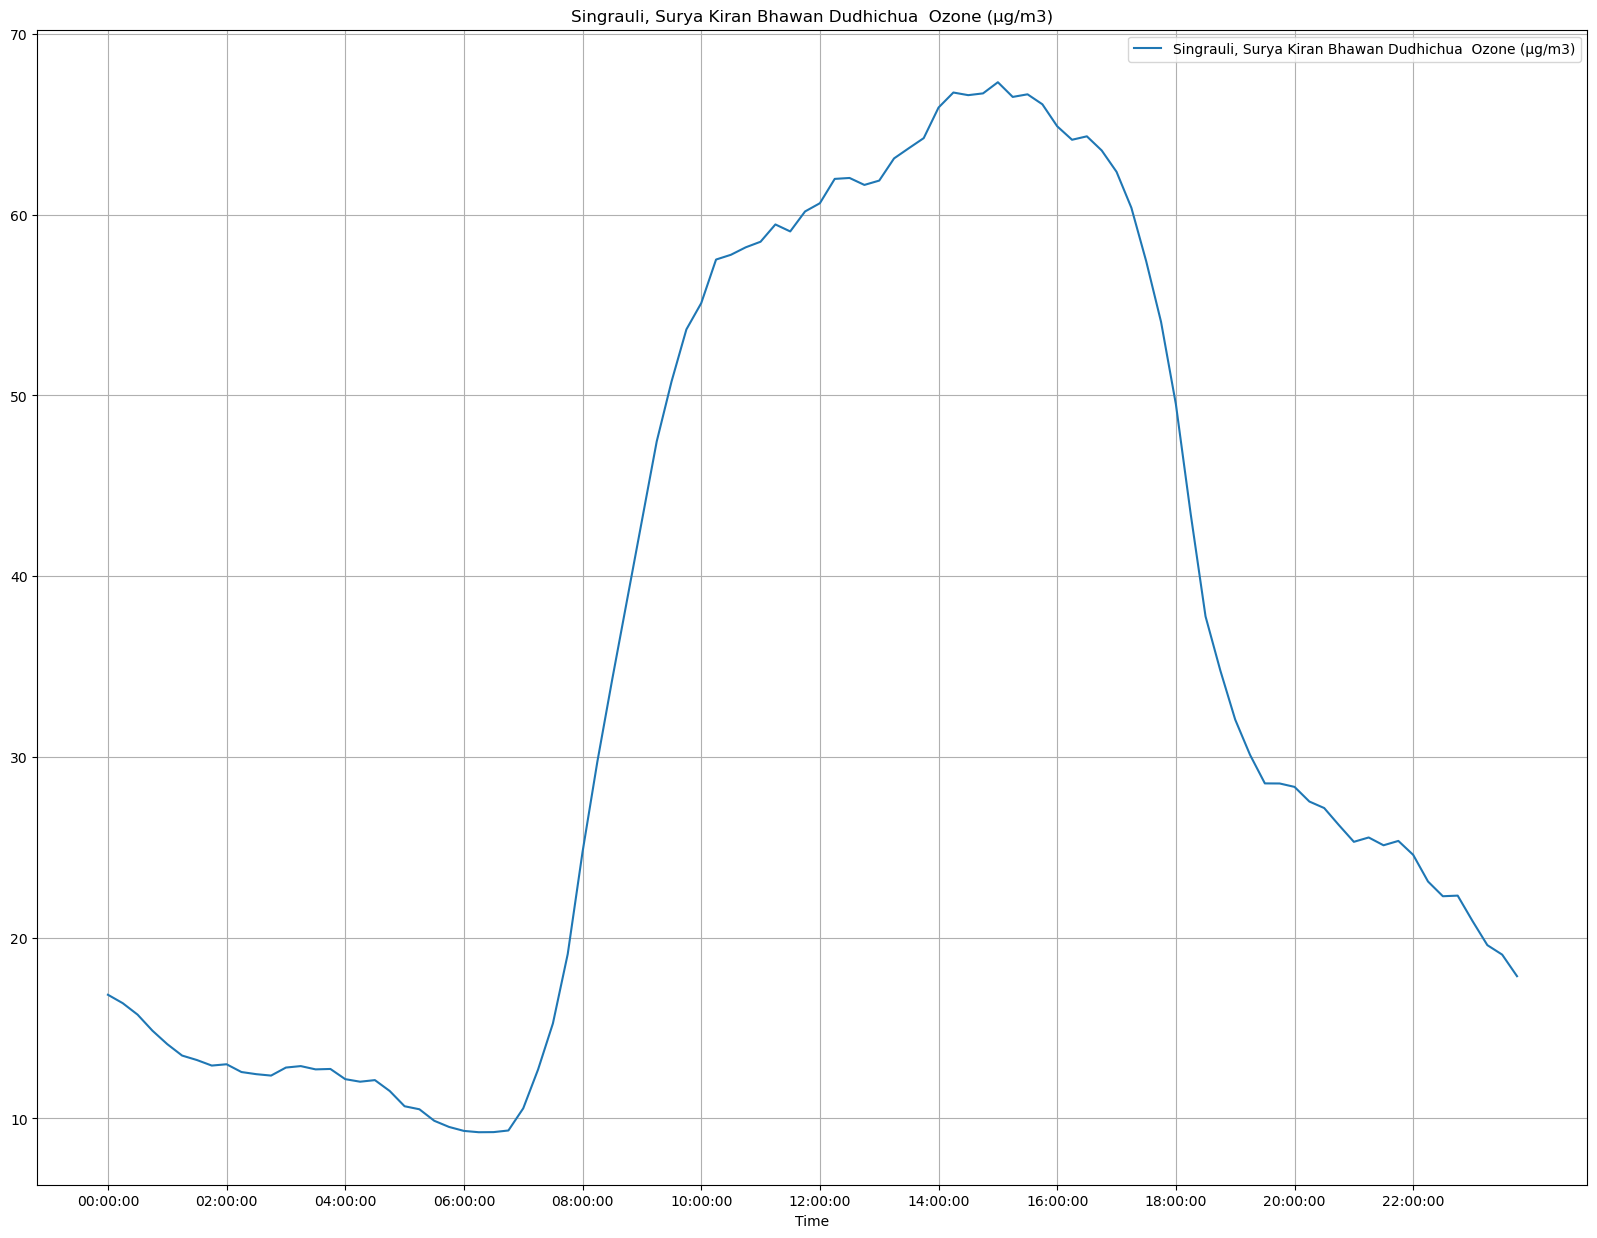

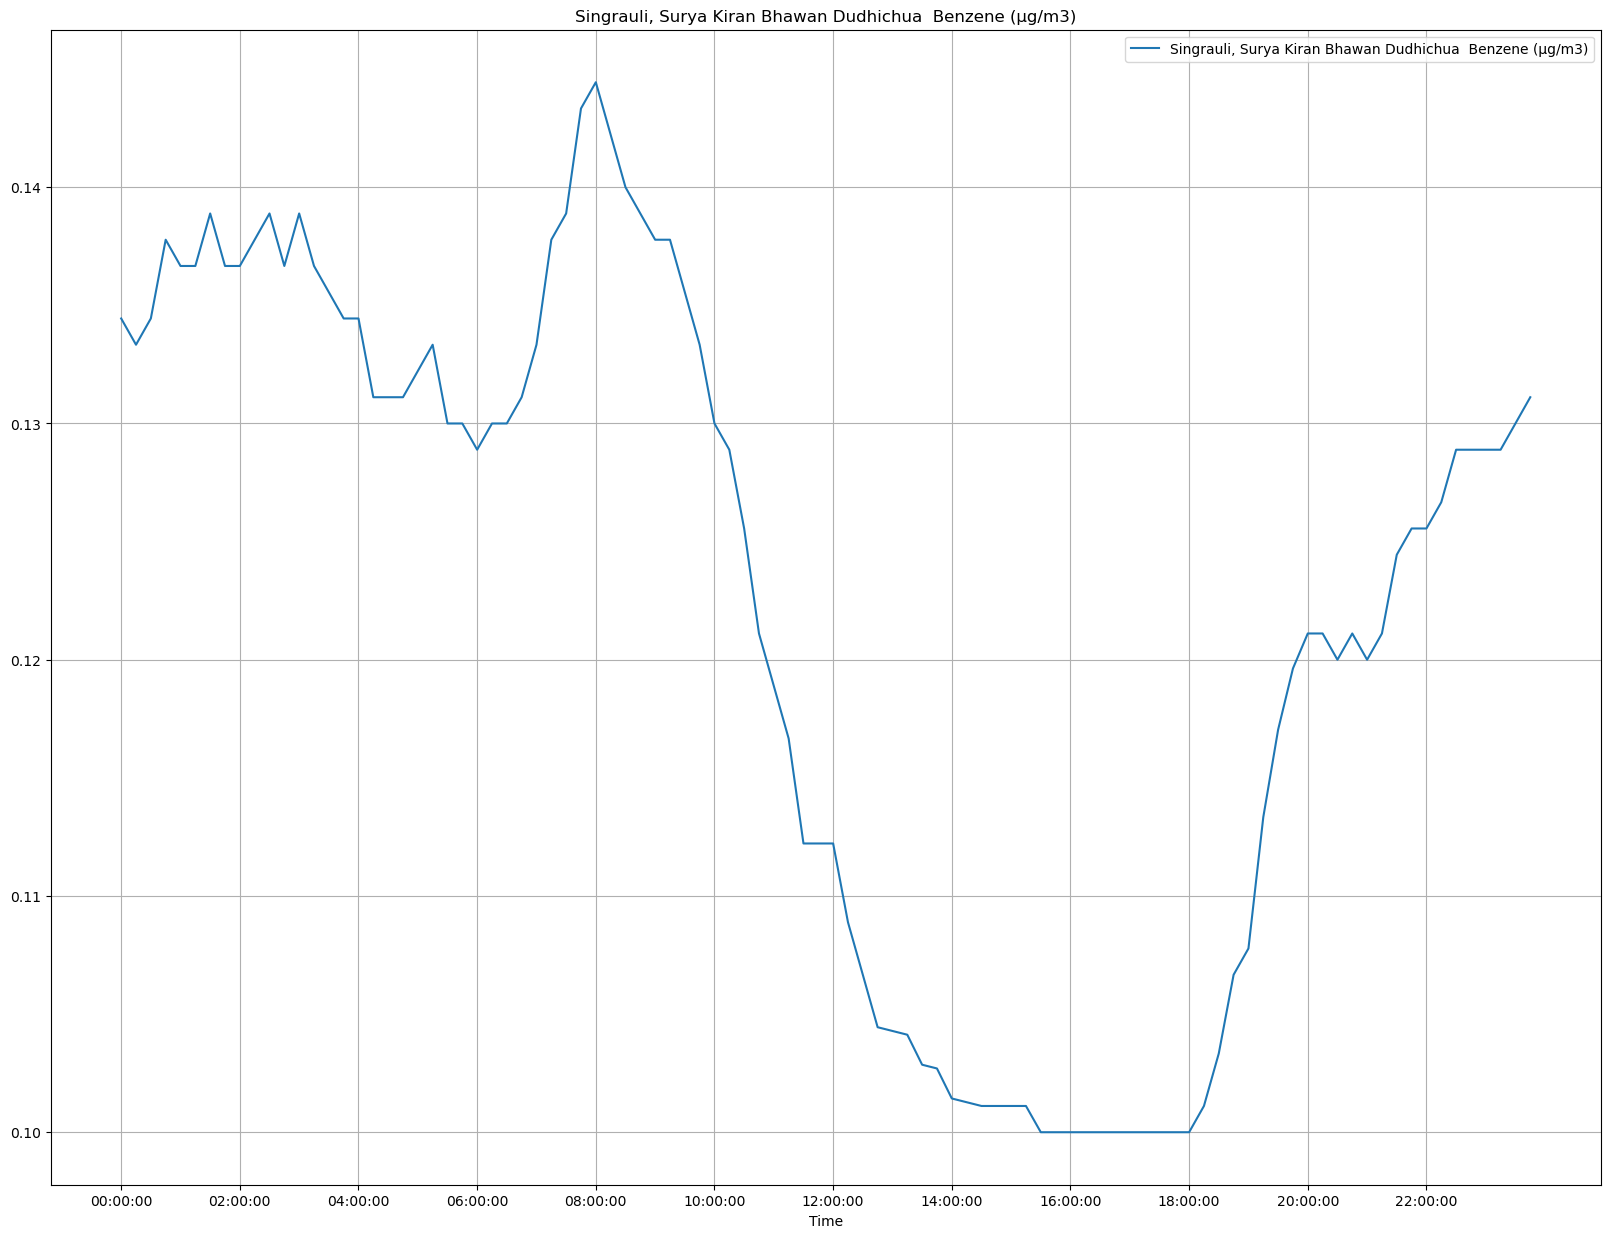

In [14]:
df1 = dataSet.copy()
df1['From'] = pd.to_datetime(df1['From'][:8640])
df1['Time'] = df1['From'].dt.strftime('%H:%M:%S')

df1_means = df1.groupby('Time').mean().reset_index()


for column in columns:
    plt.figure(figsize= (20, 15))
    plt.plot(df1_means['Time'] ,df1_means[column] , label = column)
    tick_frequency = 8

    x_ticks = range(0, len(df1_means['Time']), tick_frequency)

    x_labels = df1_means['Time'].iloc[x_ticks]
    plt.xticks(x_ticks, x_labels)
    
    plt.title(column)
    plt.xlabel('Time')
    plt.grid(True)
    plt.legend()
    plt.show()

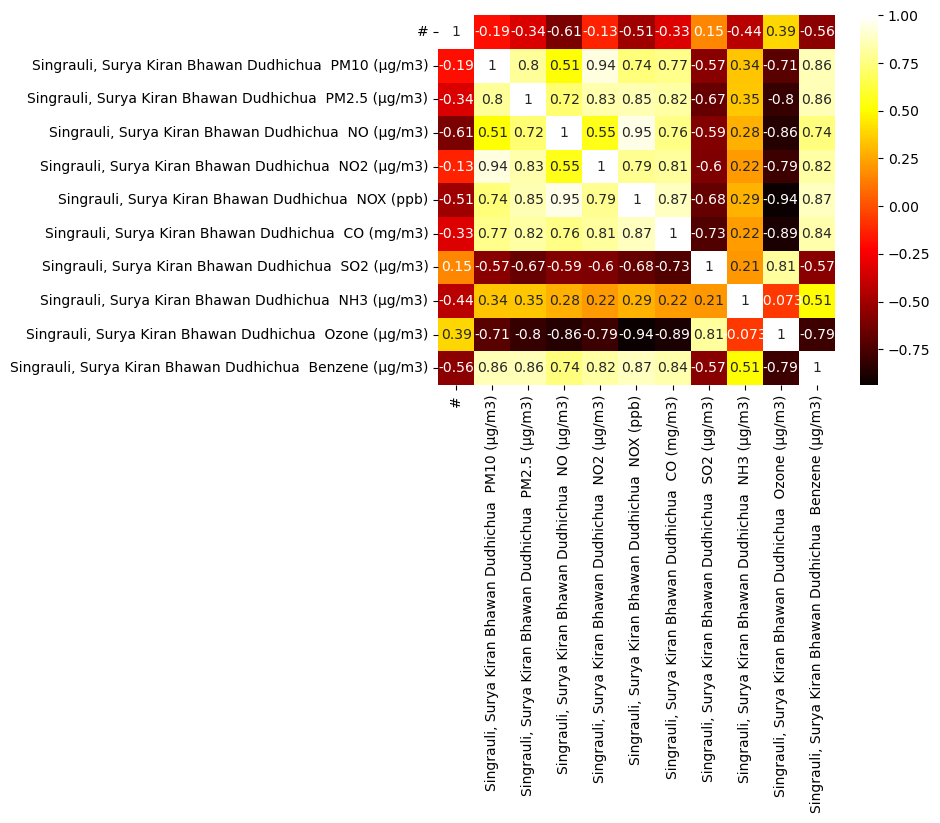

In [15]:
corr_matrix = df1_means.corr()
sns.heatmap(corr_matrix, annot=True, cmap='hot')
plt.subplots_adjust(hspace=1)
plt.show()

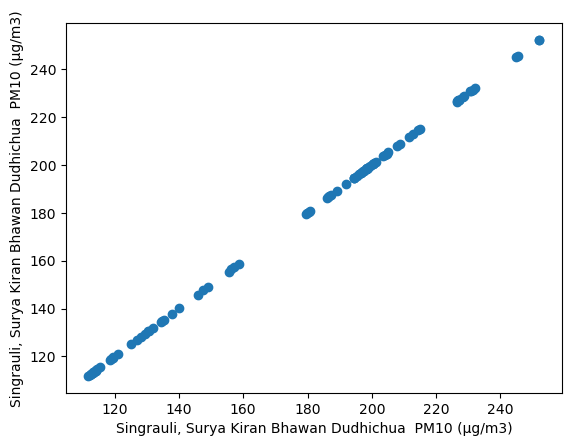

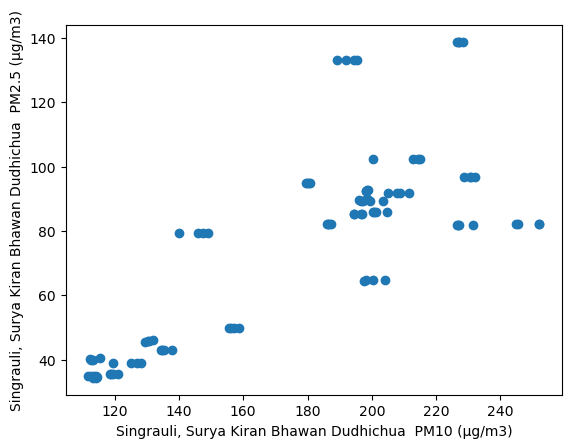

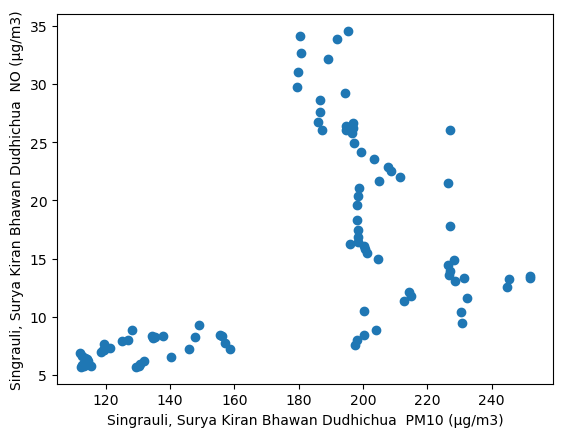

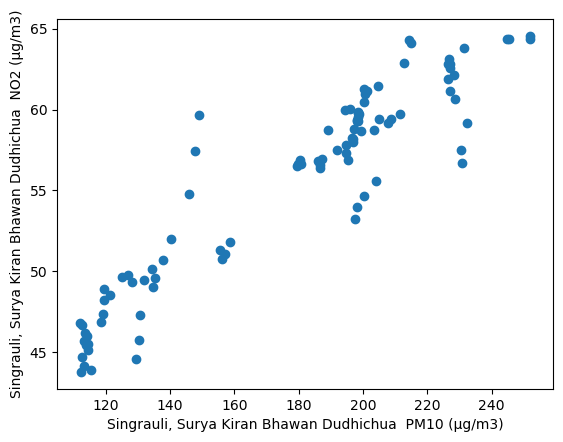

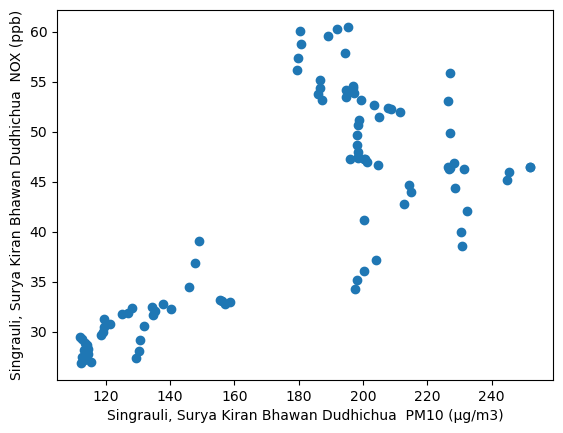

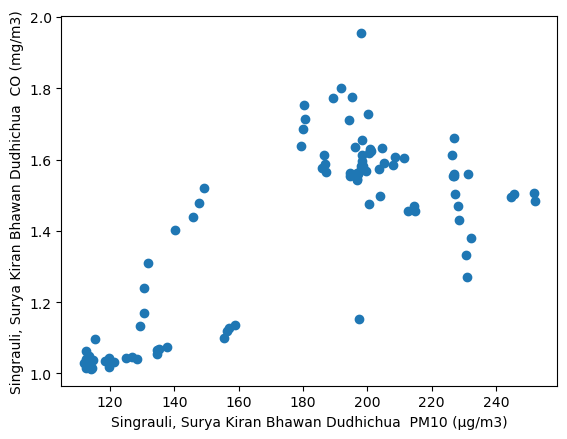

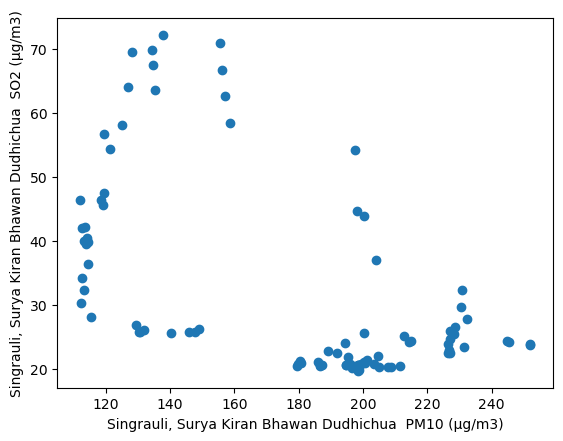

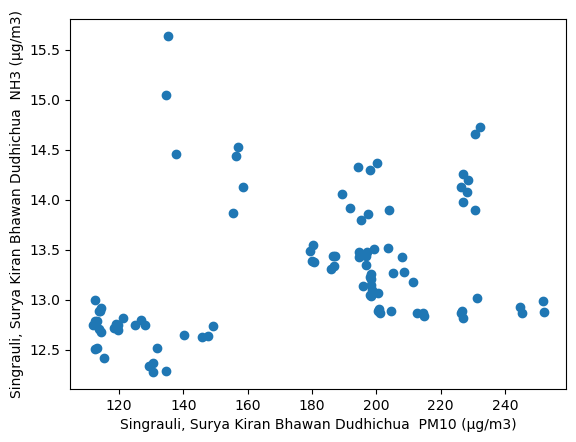

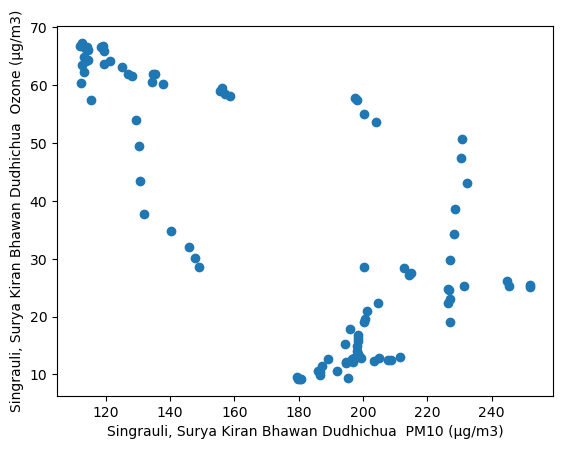

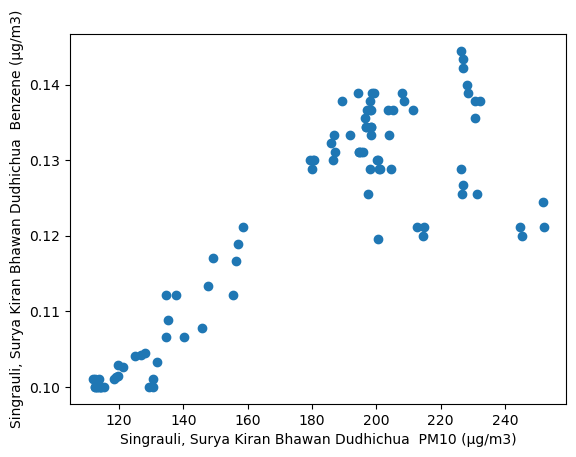

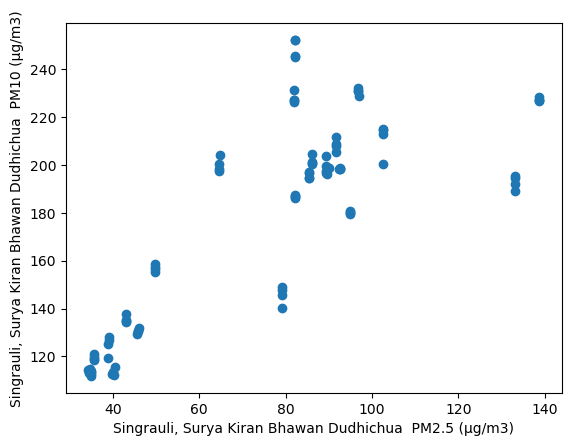

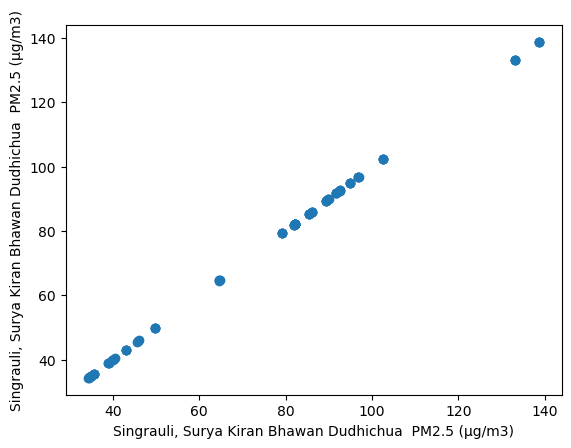

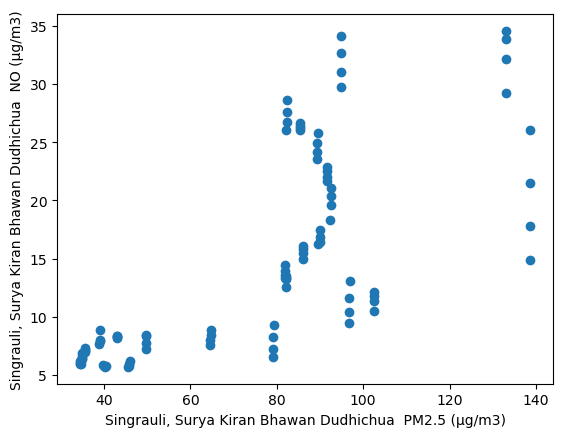

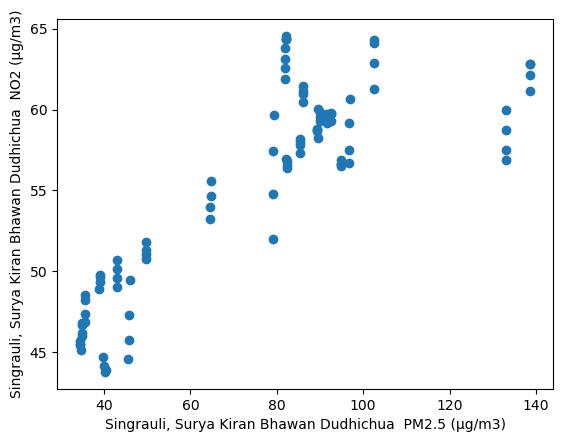

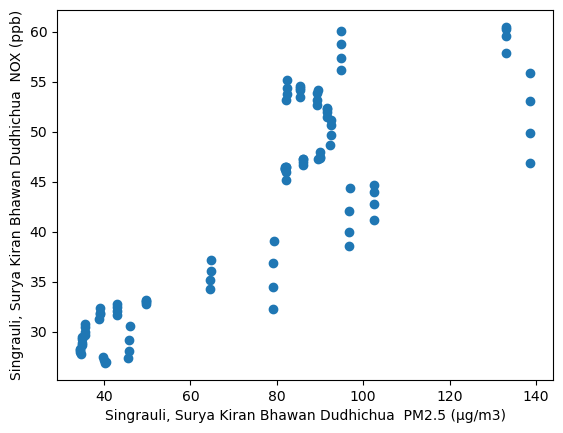

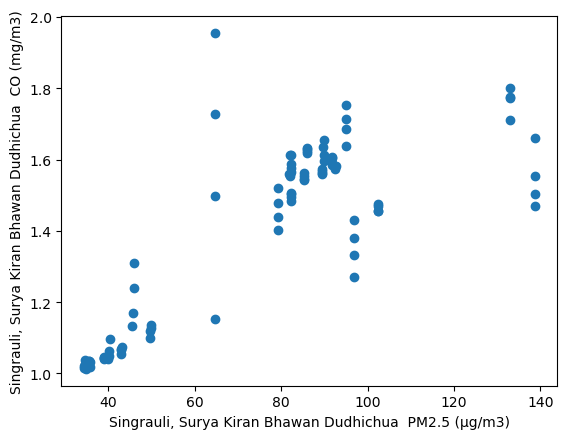

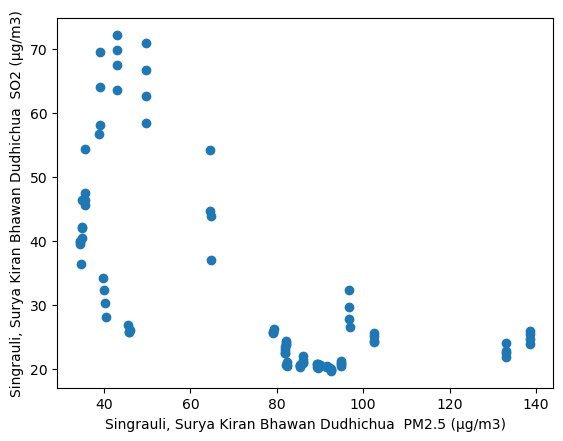

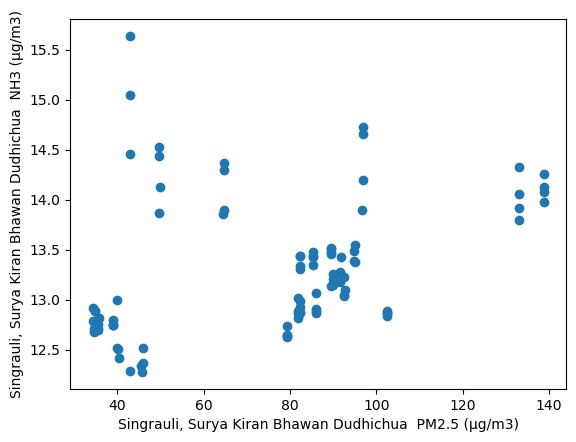

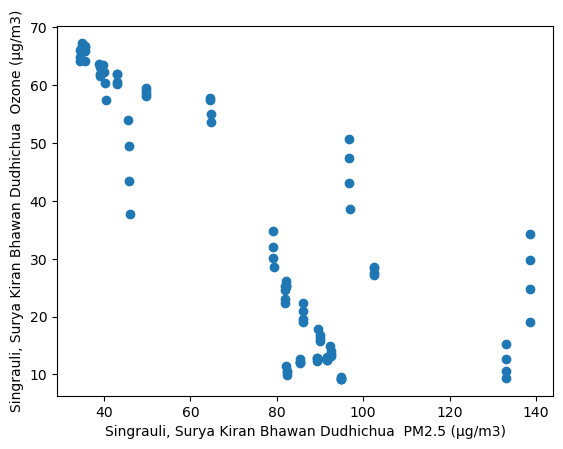

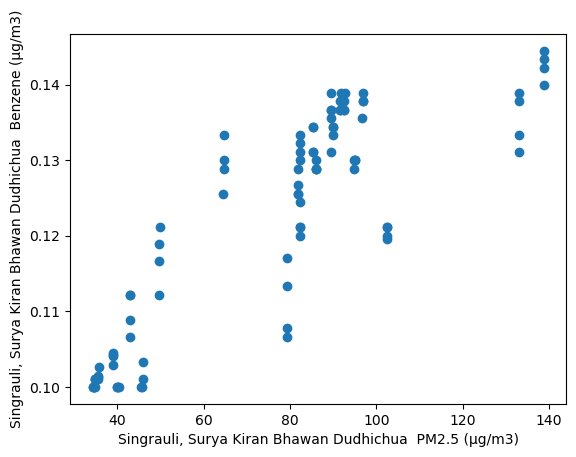

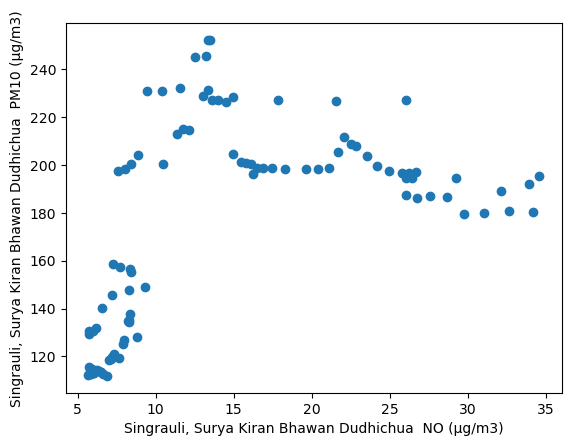

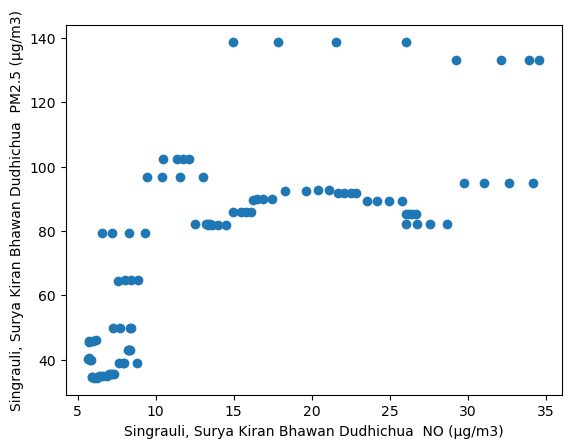

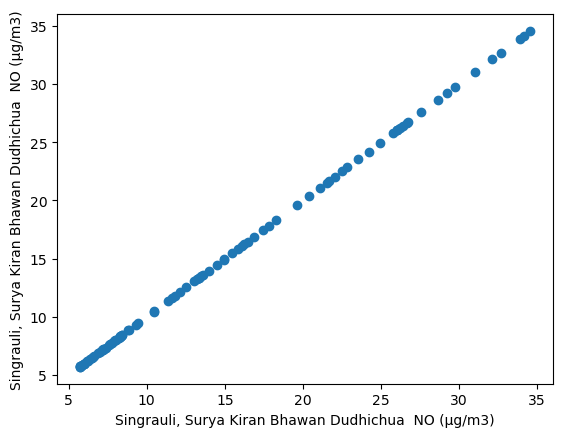

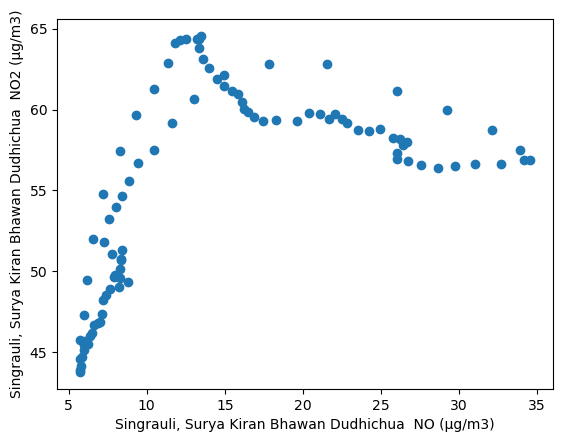

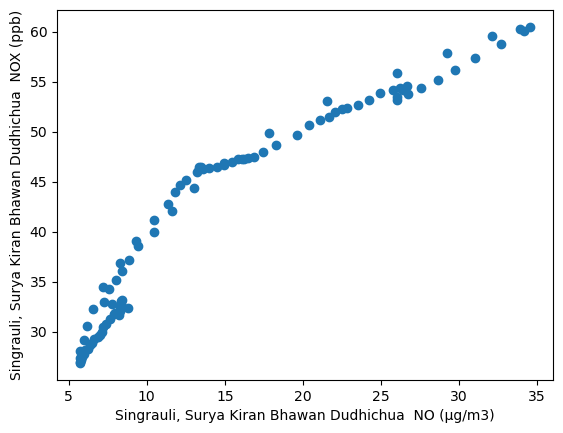

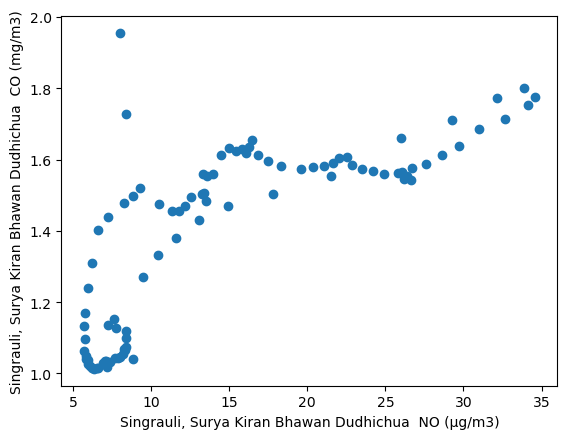

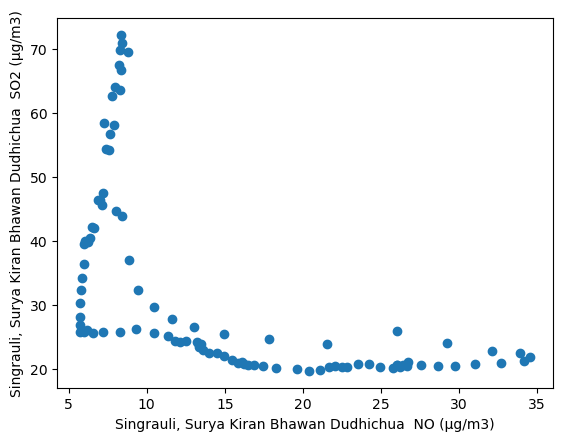

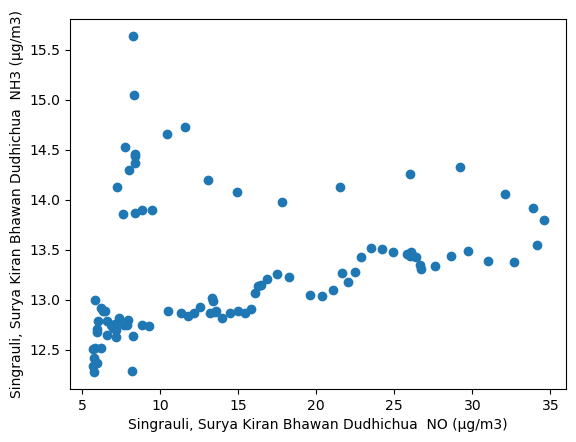

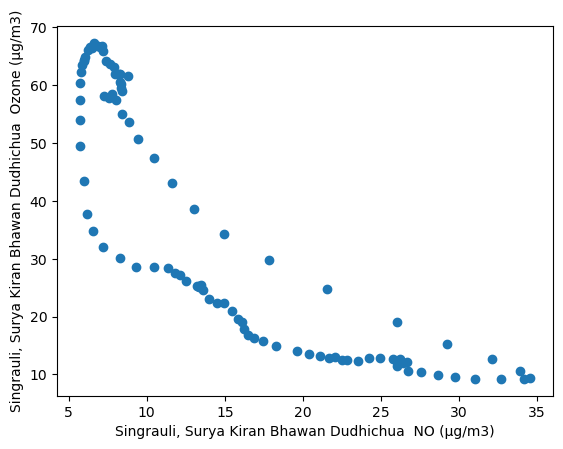

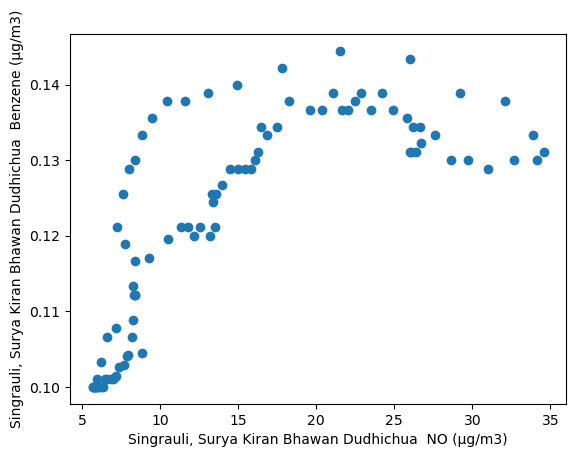

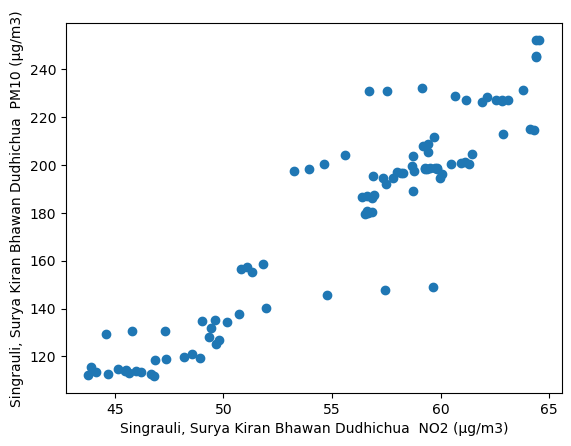

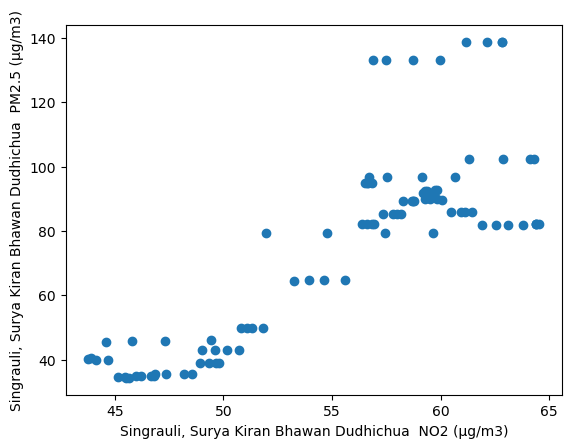

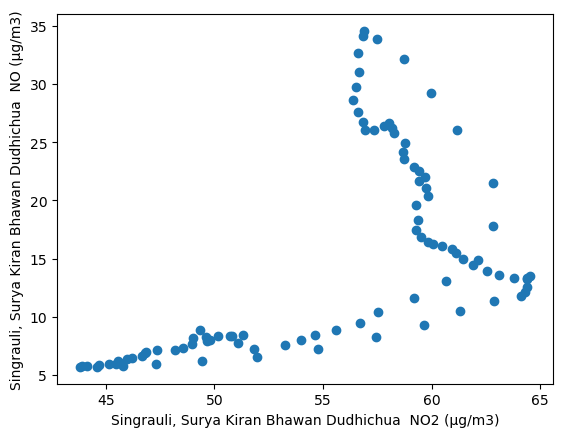

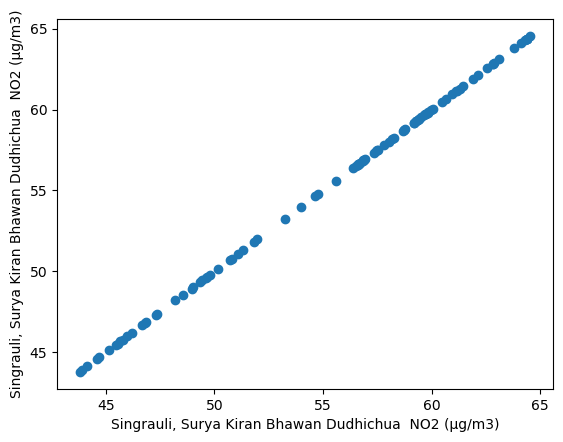

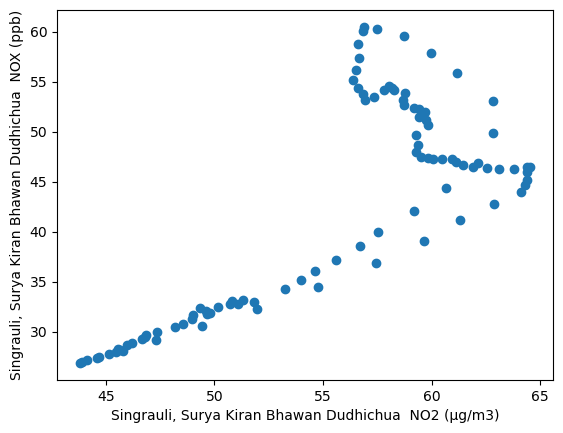

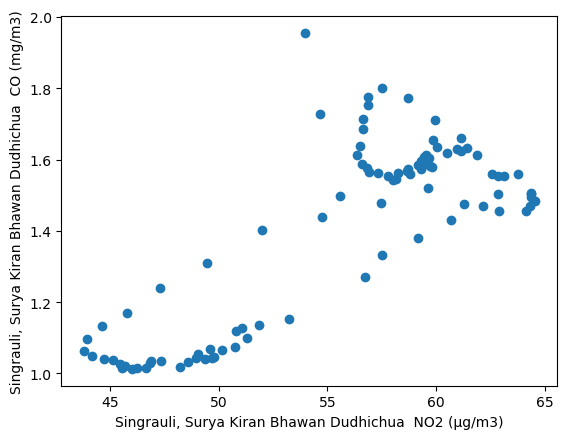

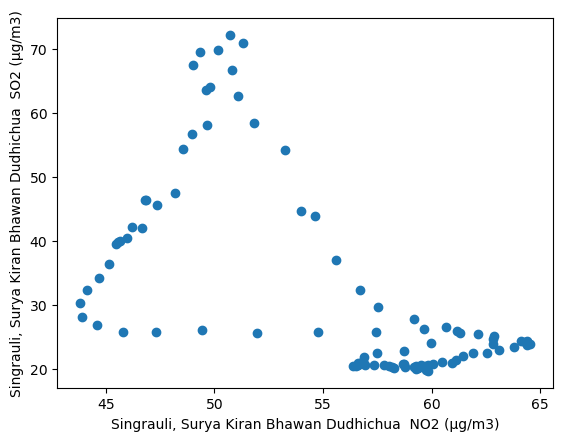

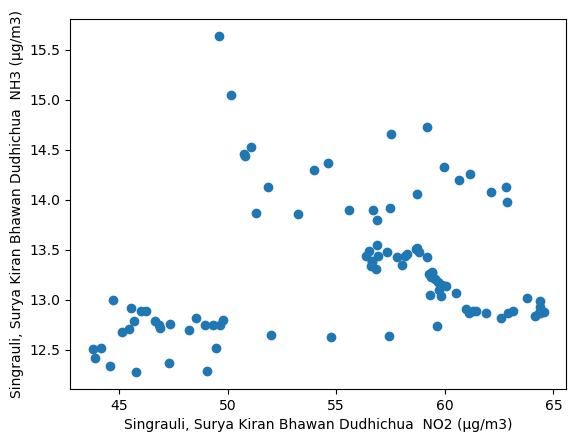

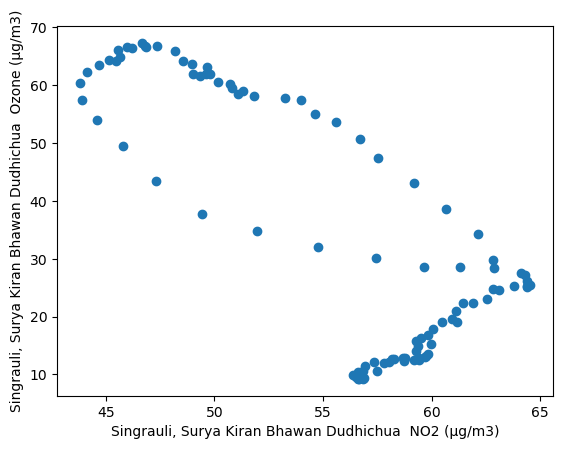

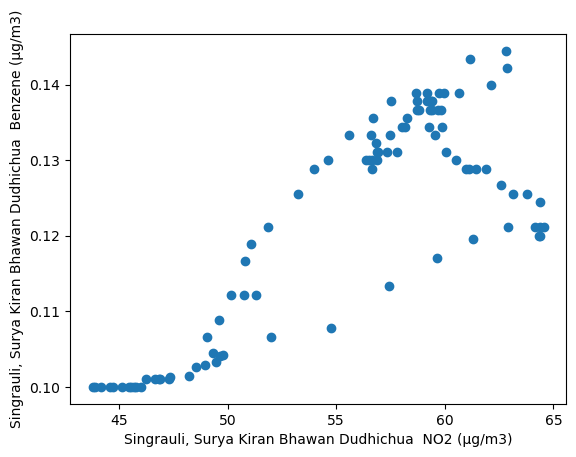

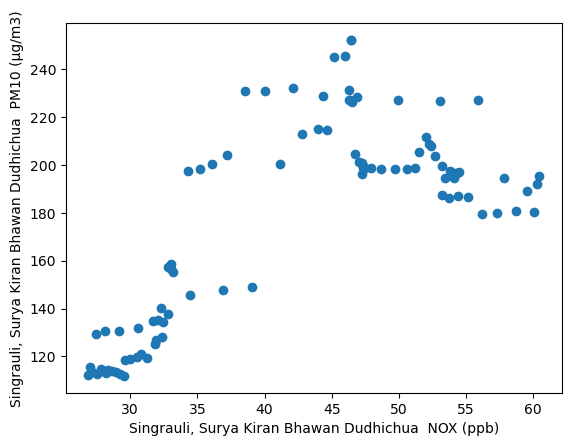

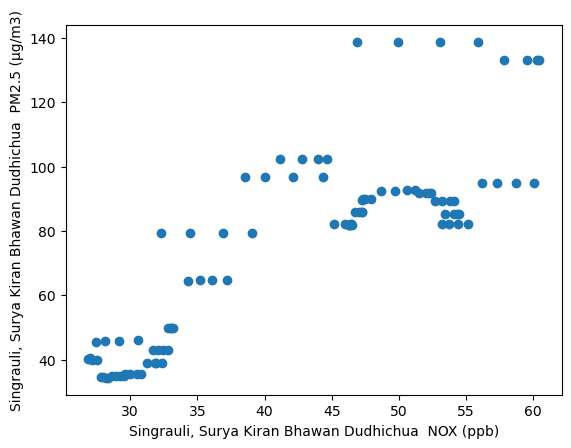

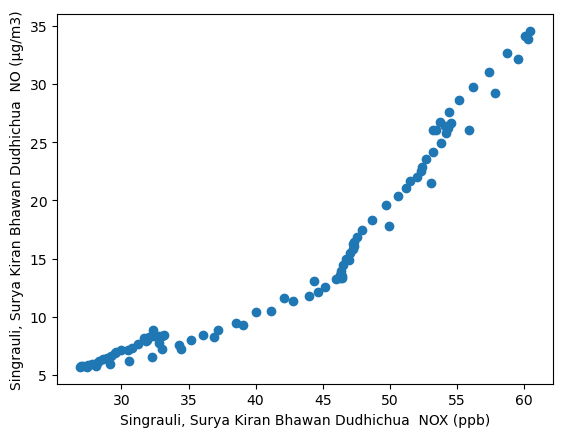

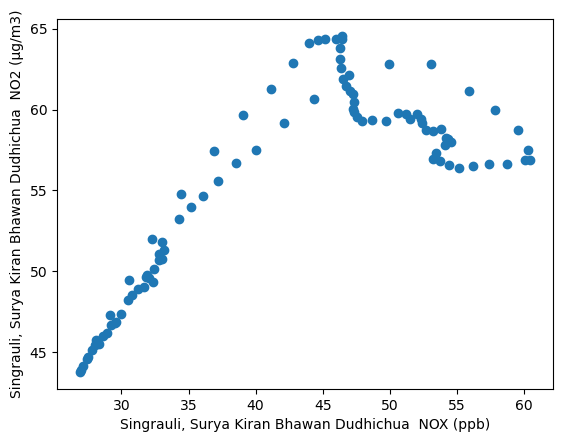

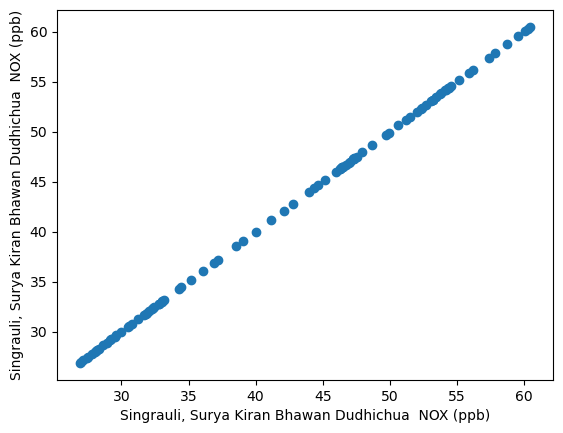

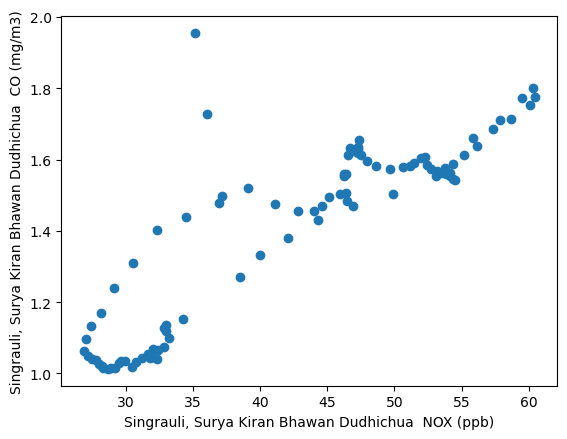

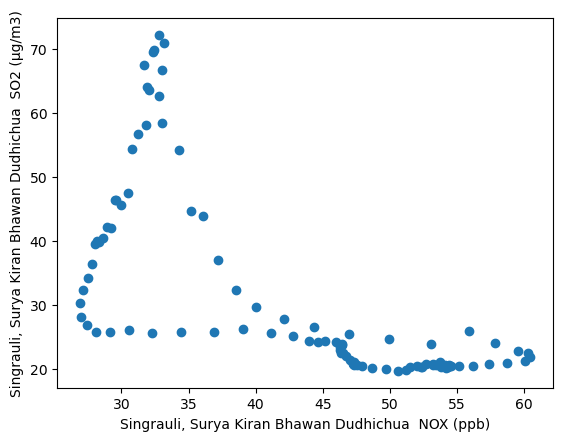

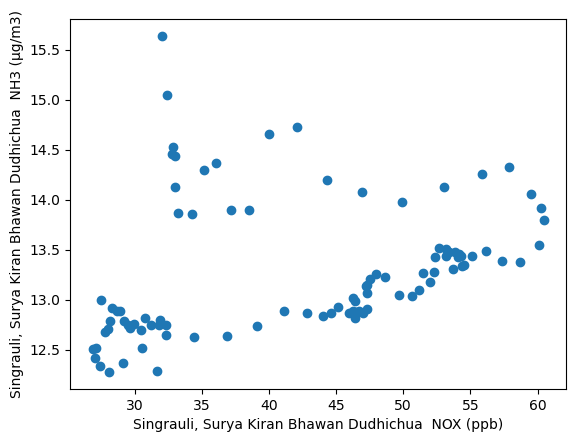

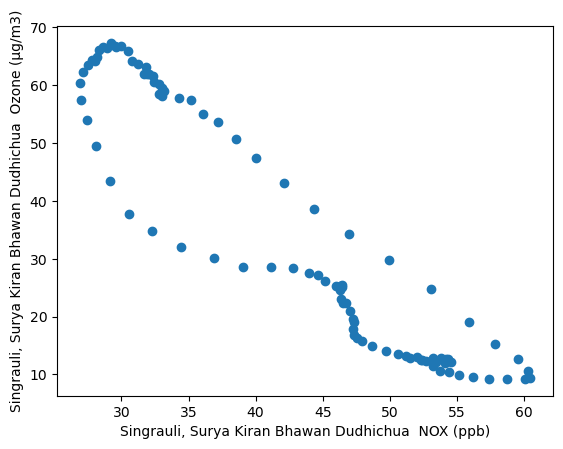

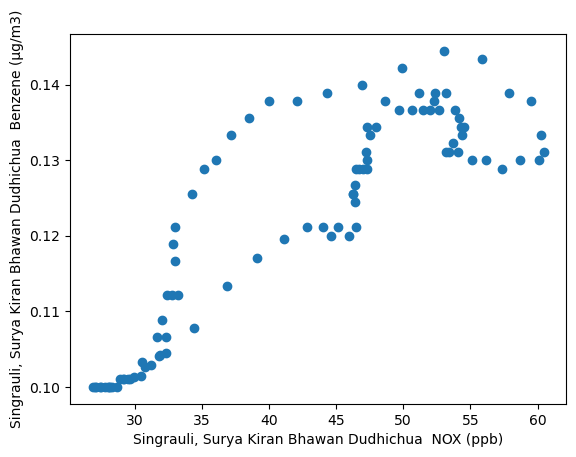

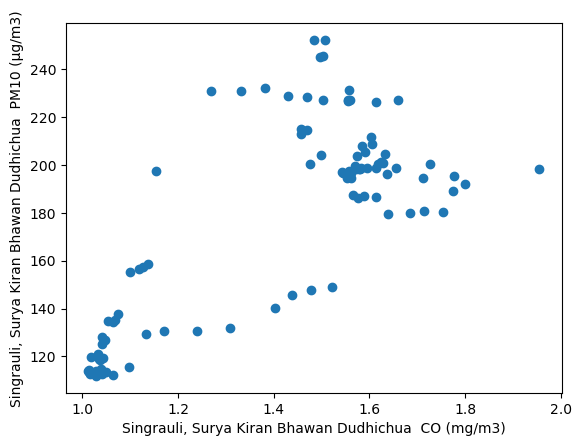

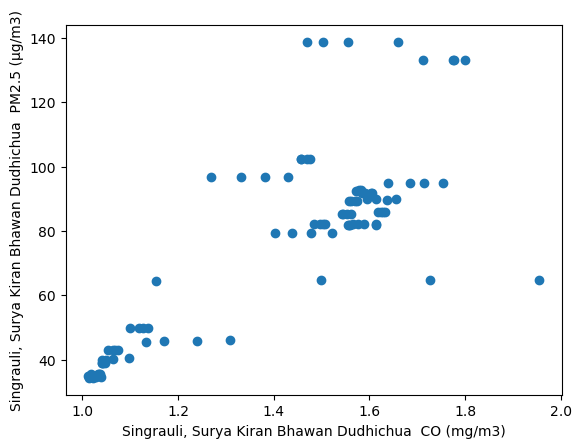

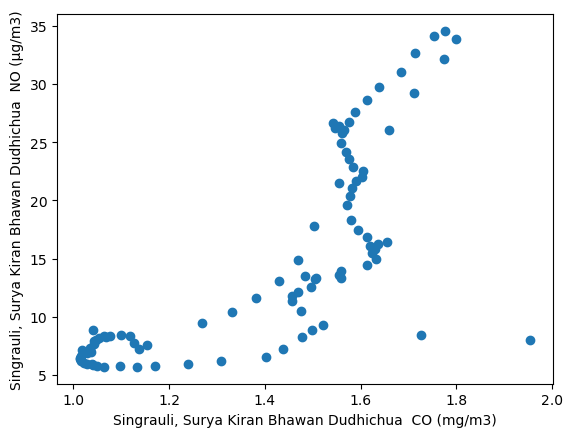

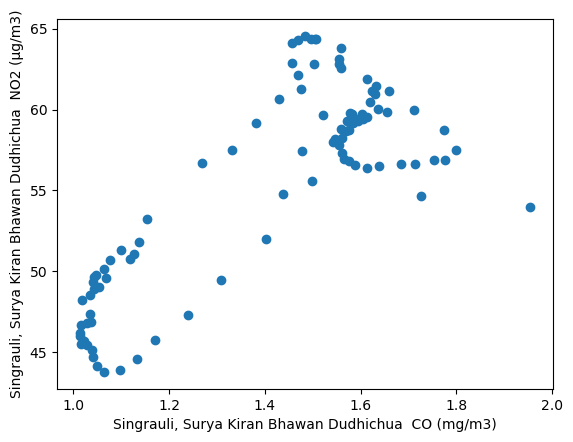

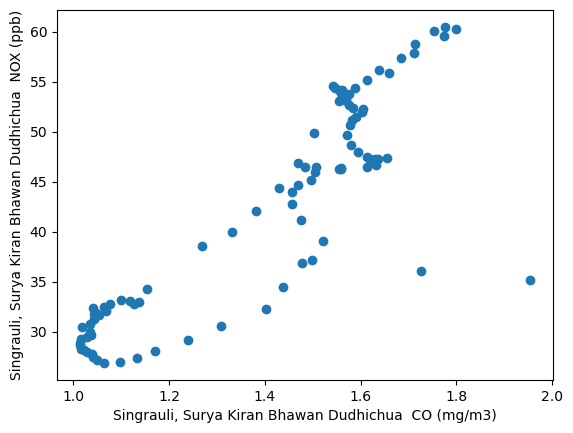

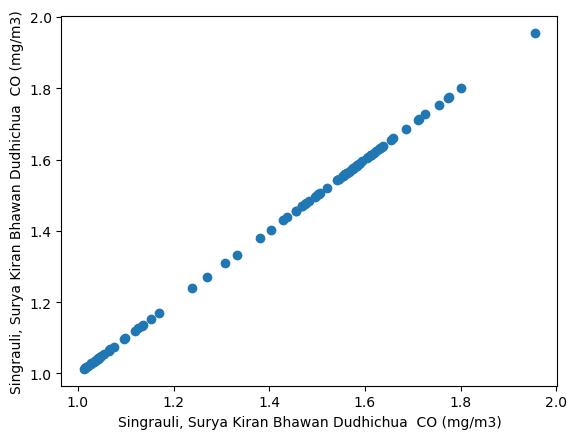

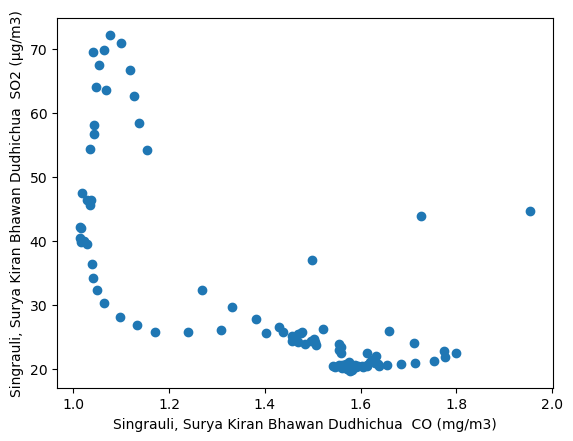

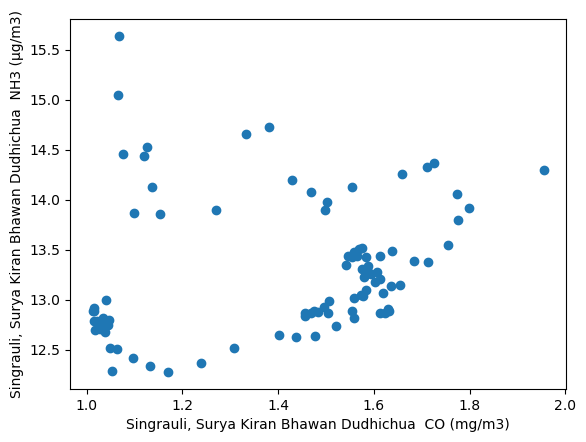

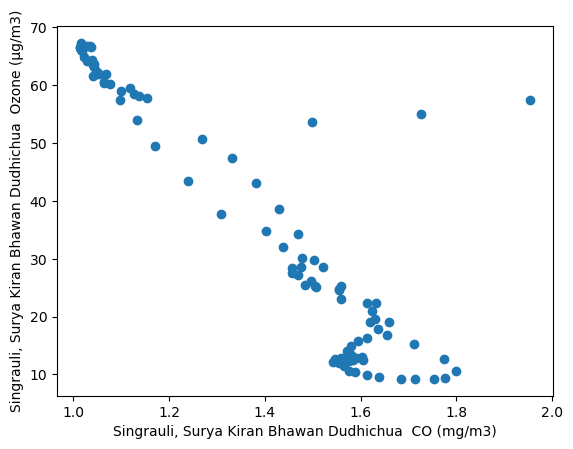

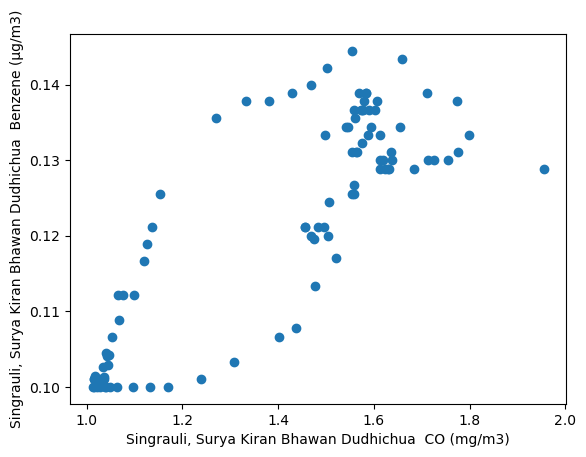

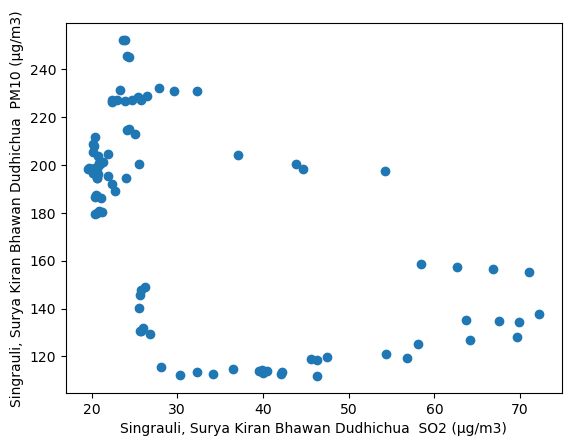

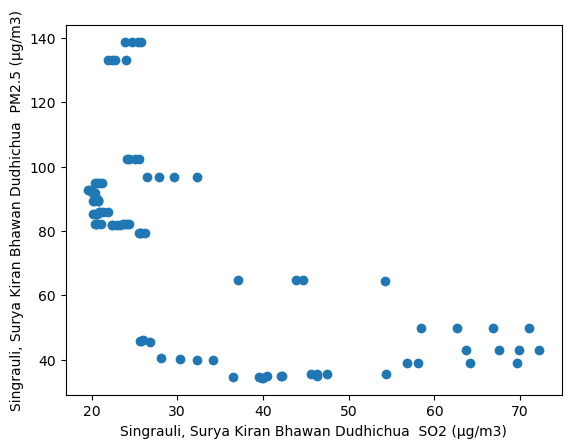

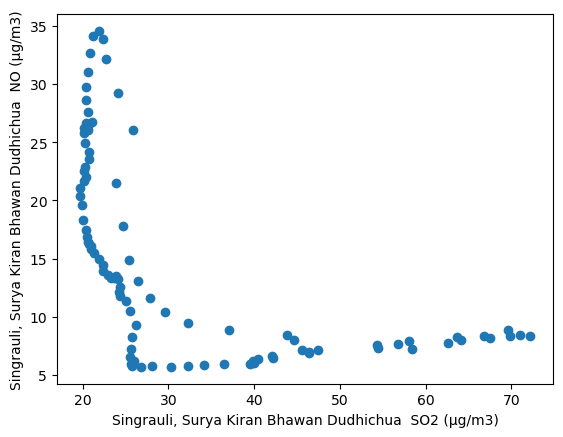

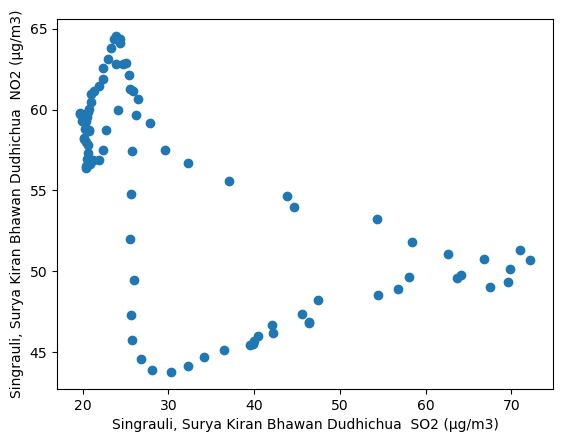

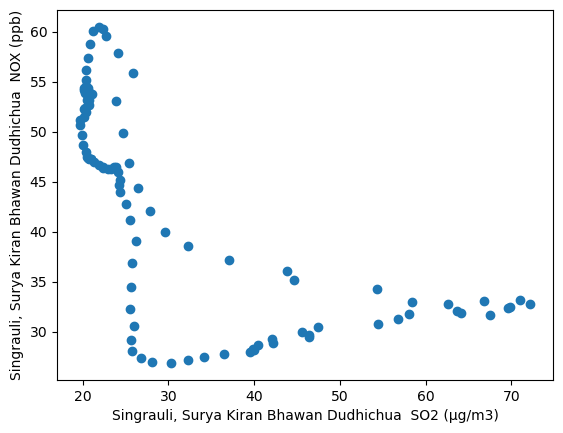

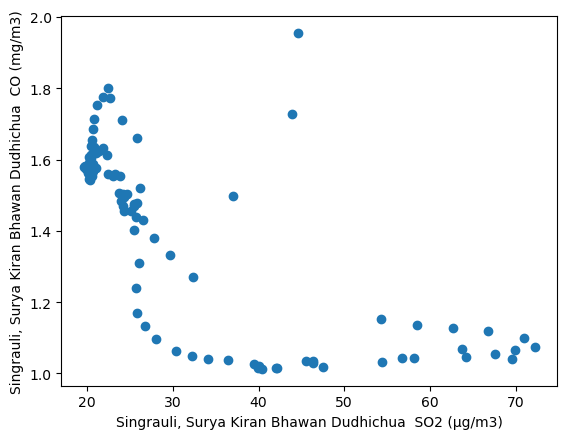

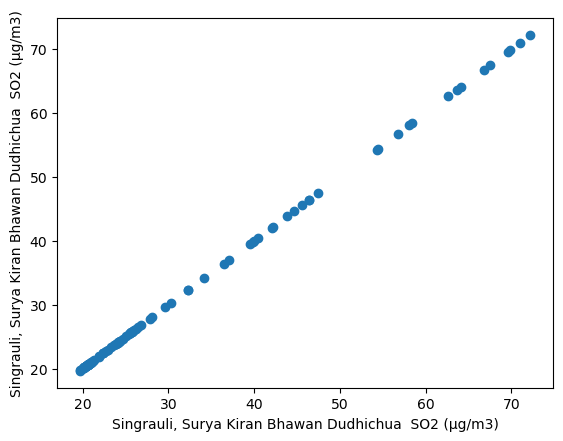

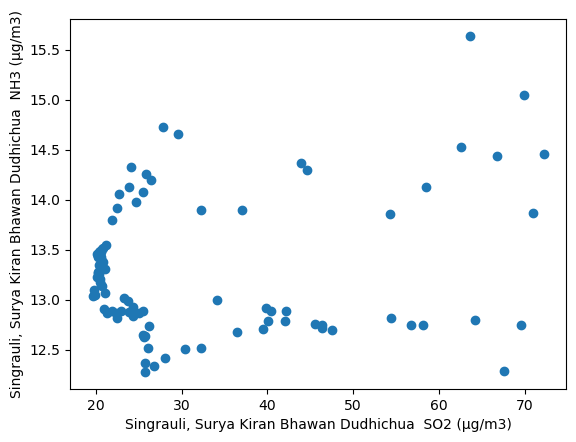

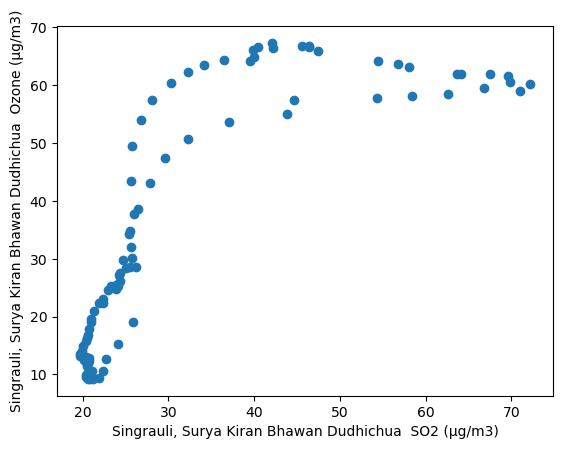

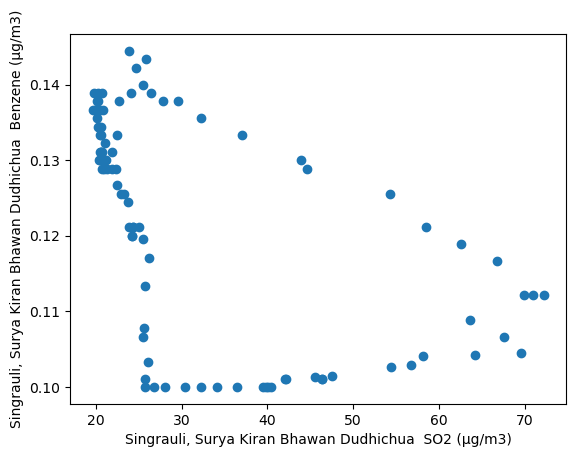

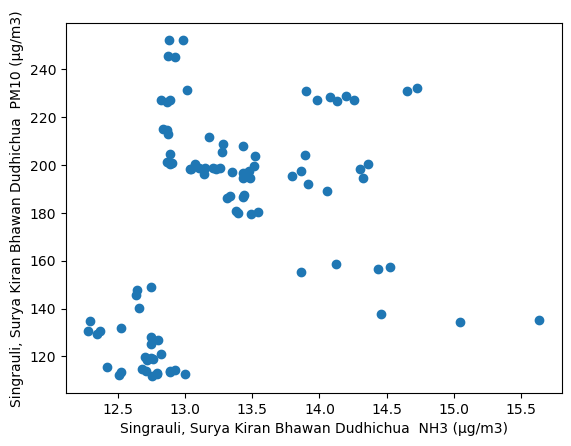

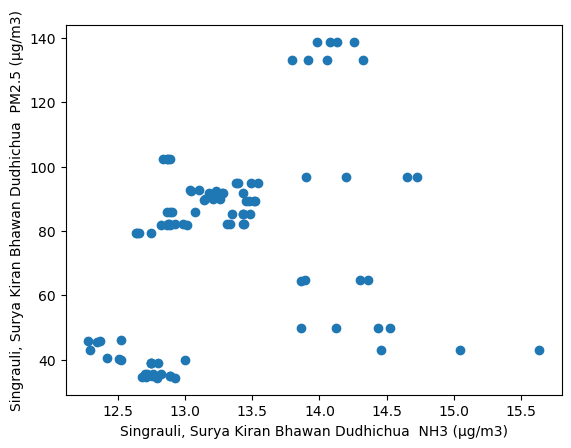

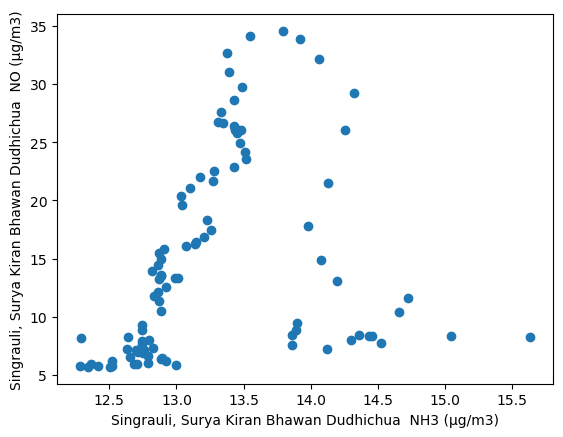

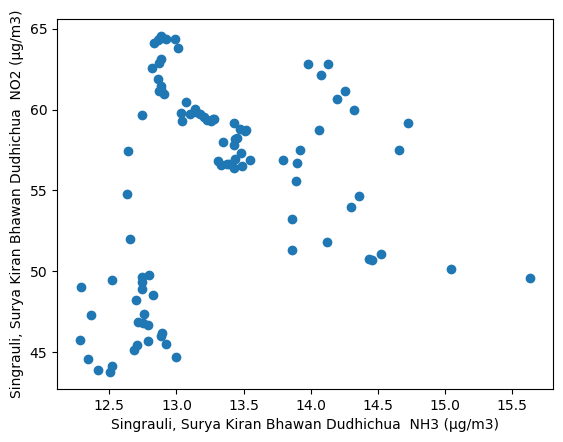

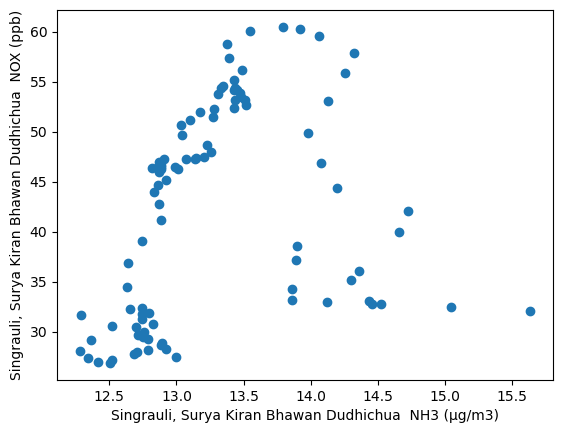

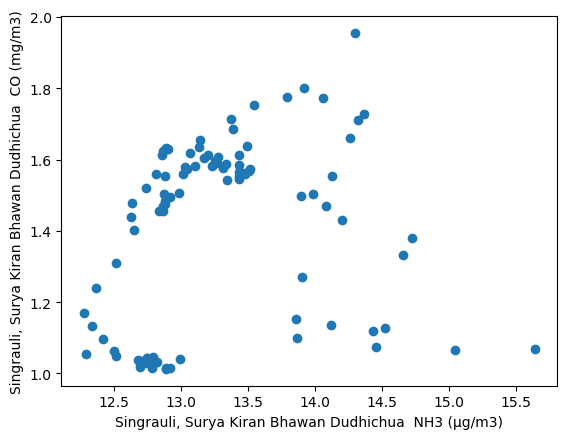

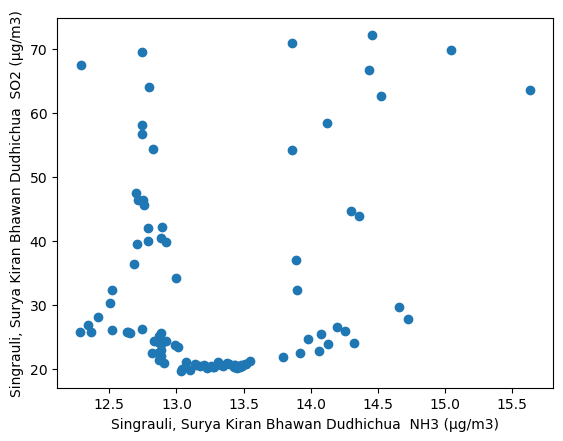

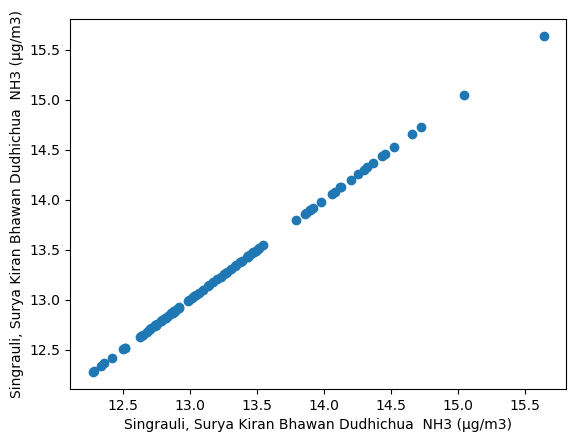

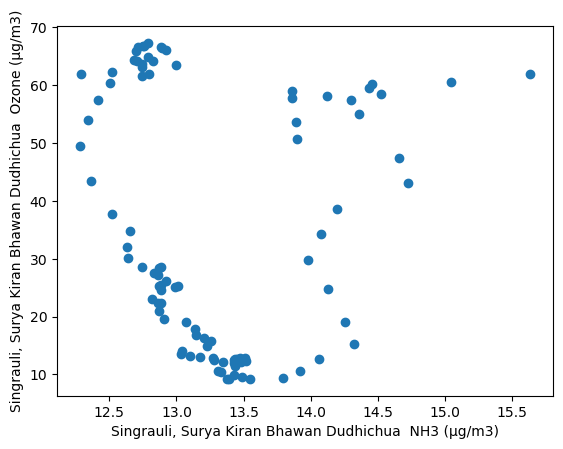

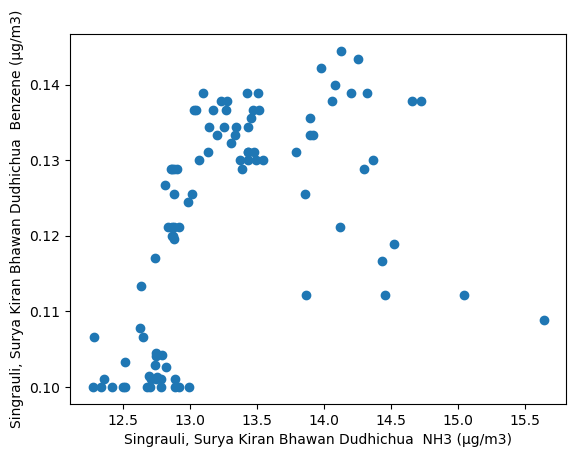

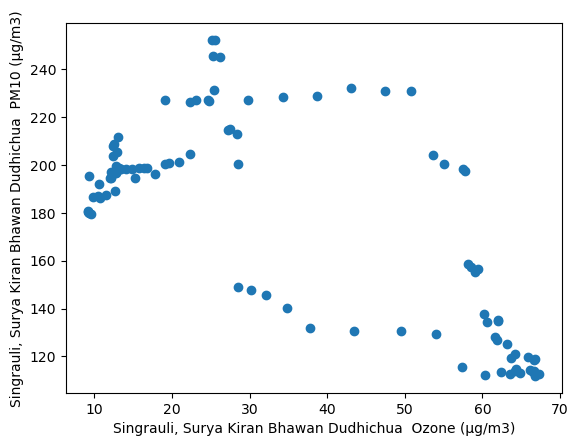

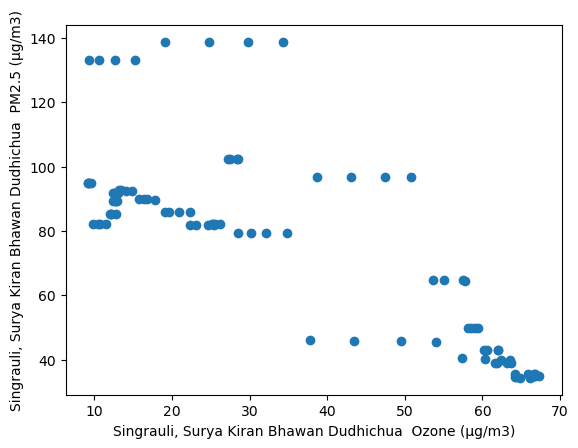

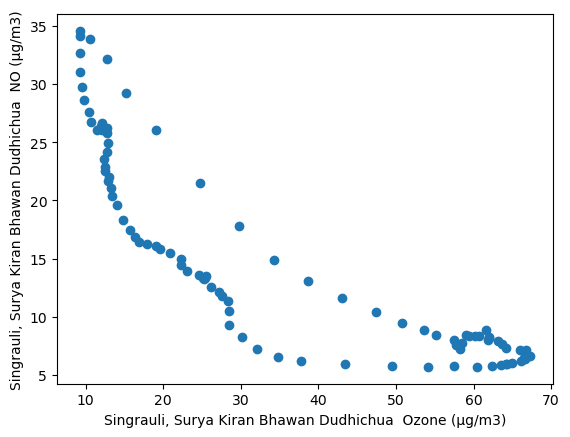

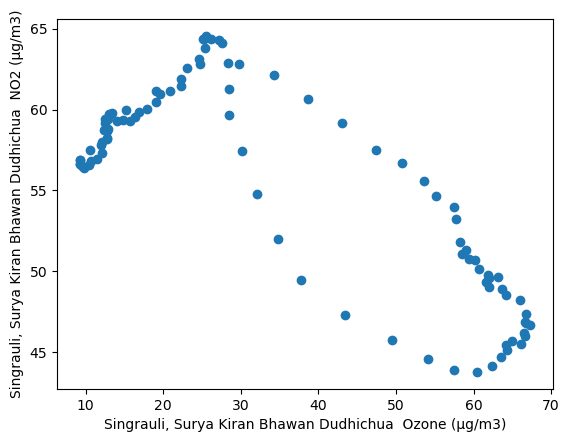

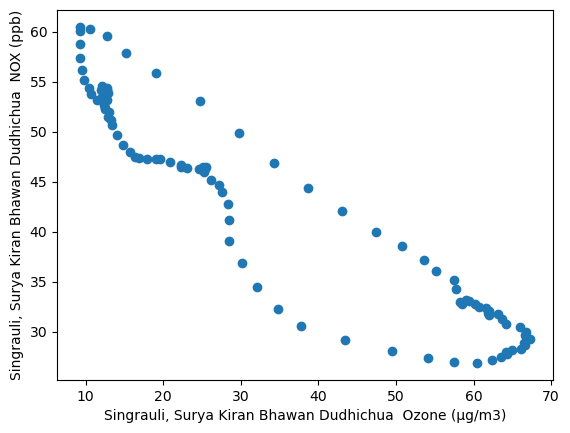

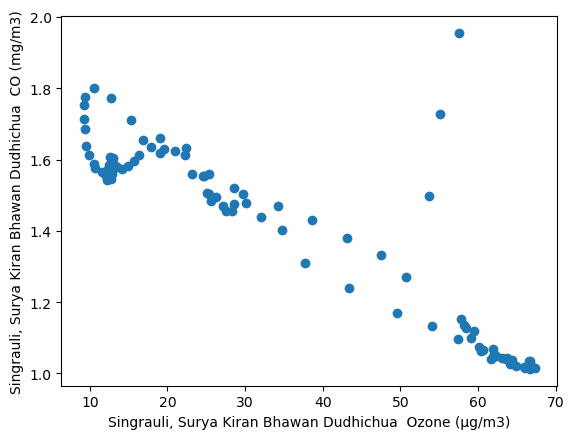

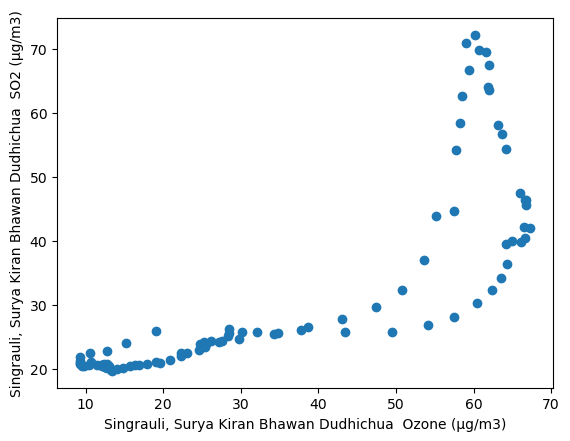

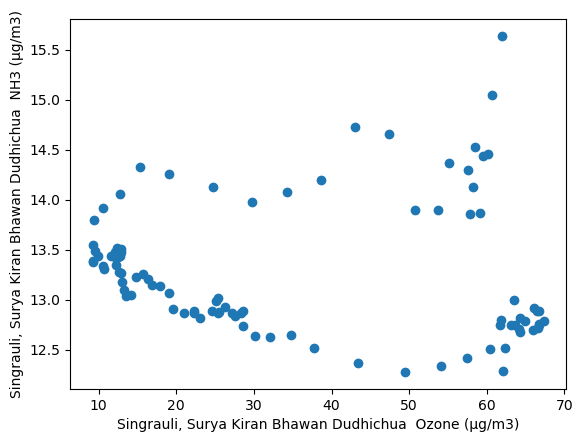

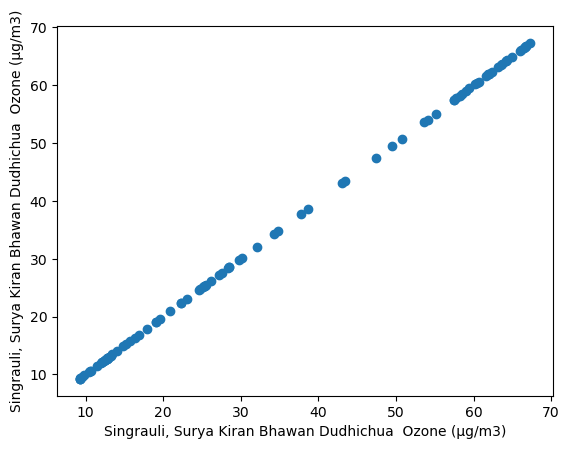

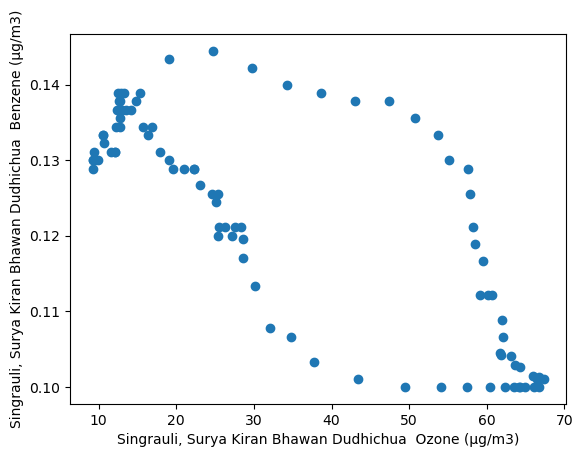

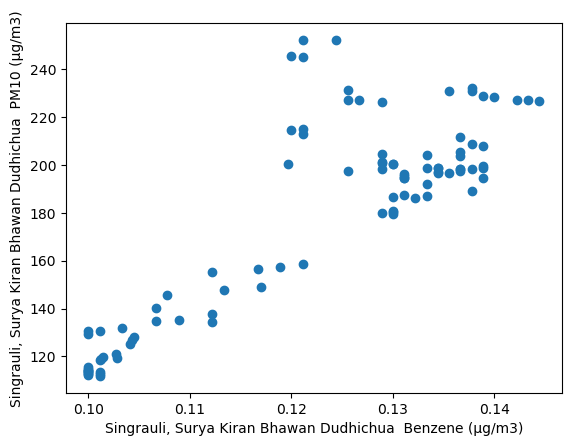

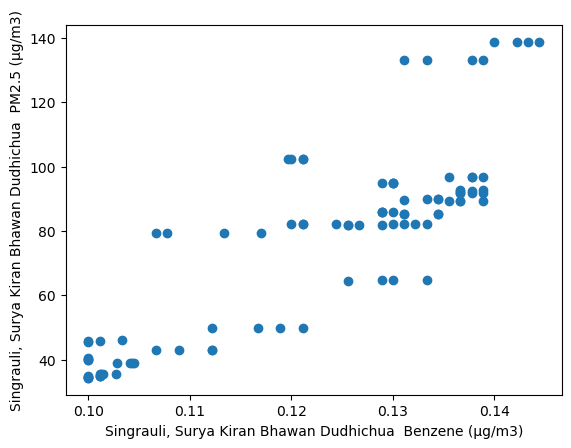

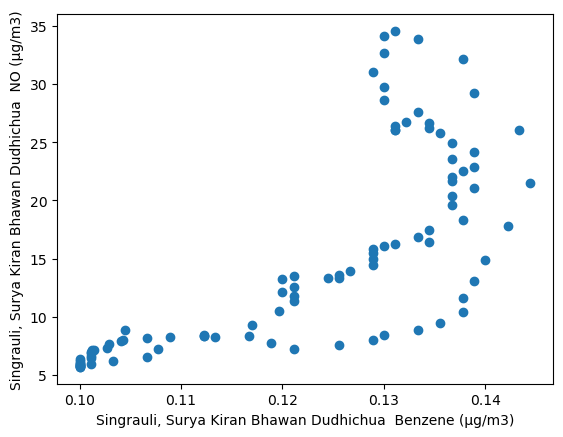

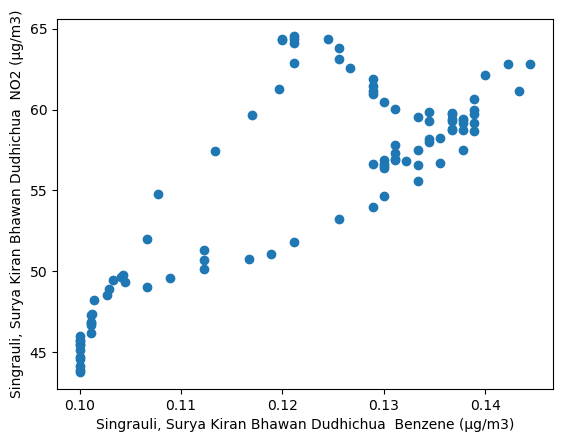

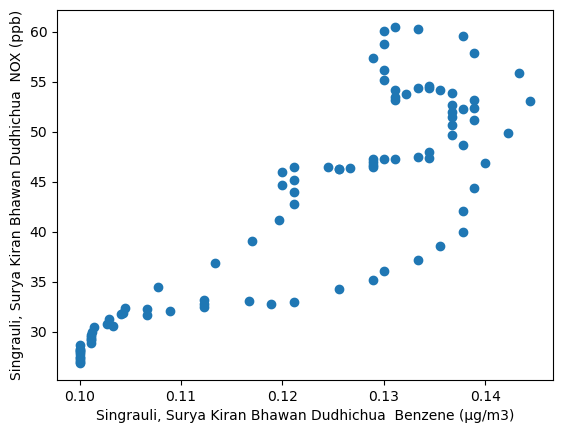

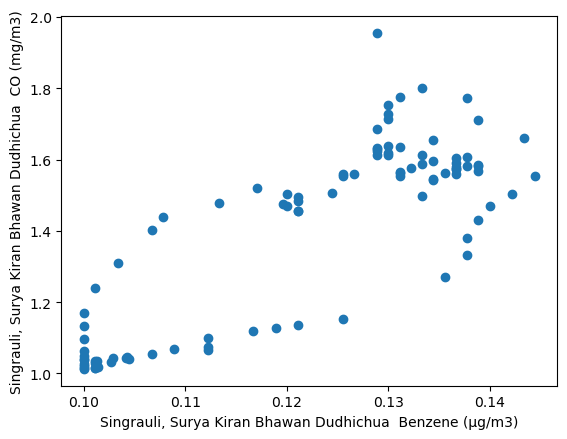

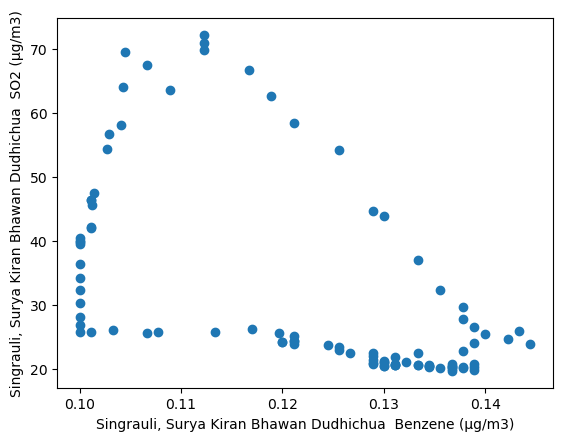

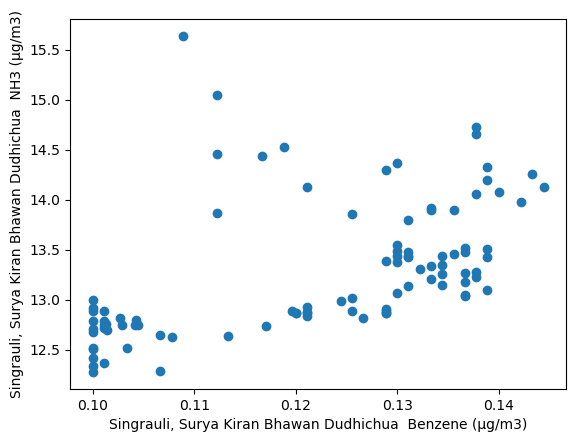

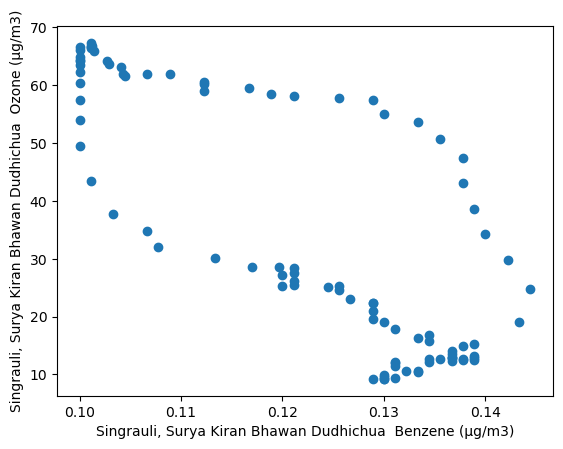

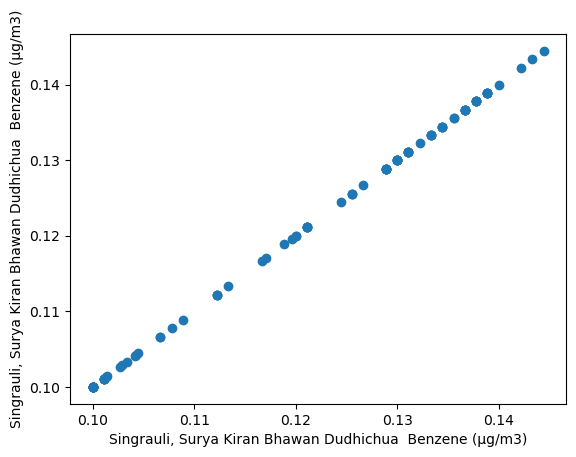

In [16]:
for column in columns:
    for column1 in columns:
        plt.scatter(df1_means[column],df1_means[column1])
        plt.xlabel(column)
        plt.ylabel(column1)
        plt.show()

In [17]:
dataSet

#                 From   To (Interval: 15M)  \
0        1  2023-02-01 00:00:00  2023-02-01 00:15:00   
1        2  2023-02-01 00:15:00  2023-02-01 00:30:00   
2        3  2023-02-01 00:30:00  2023-02-01 00:45:00   
3        4  2023-02-01 00:45:00  2023-02-01 01:00:00   
4        5  2023-02-01 01:00:00  2023-02-01 01:15:00   
...    ...                  ...                  ...   
8638  8639  2023-05-01 23:30:00  2023-05-01 23:45:00   
8639  8640  2023-05-01 23:45:00  2023-05-02 00:00:00   
8640  8641                  Min                  NaN   
8641  8642                  Max                  NaN   
8642  8643                 Avg.                  NaN   

      Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)  \
0                                                 95.00       
1                                                 95.00       
2                                                 95.00       
3                                                122.00       
4                                                122.00       
...                                                 ...       
8638                                              19.00       
8639                                              32.00       
8640                                              12.00       
8641                                             847.00       
8642                                             181.41       

      Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)  \
0                                                 35.00        
1                                                 35.00        
2                                                 35.00        
3                                                 34.00        
4                                                 34.00        
...                                                 ...        
8638                                              11.00        
8639                                               6.00        
8640                                               3.00        
8641                                             474.00        
8642                                              75.69        

      Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)  \
0                                                 18.10     
1                                                 18.10     
2                                                 18.10     
3                                                 18.10     
4                                                 18.10     
...                                                 ...     
8638                                              20.80     
8639                                              21.80     
8640                                               0.10     
8641                                             157.50     
8642                                              14.65     

      Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)  \
0                                                 90.10      
1                                                 88.00      
2                                                 87.70      
3                                                 88.90      
4                                                 90.00      
...                                                 ...      
8638                                             100.20      
8639                                              98.80      
8640                                               0.20      
8641                                             106.90      
8642                                              55.76      

      Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)  \
0                                                 56.20    
1                                                 55.10    
2                                                 55.20    
3                                                 55.70    
4                               

In [18]:
import statsmodels.api as sm

-


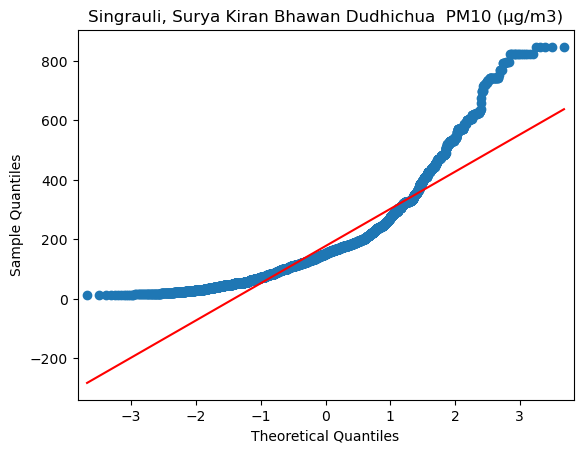

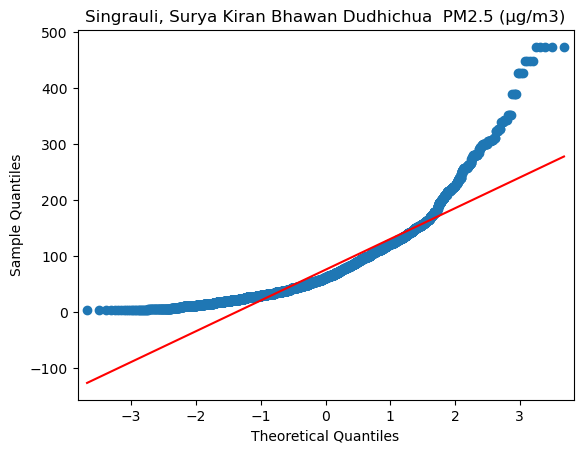

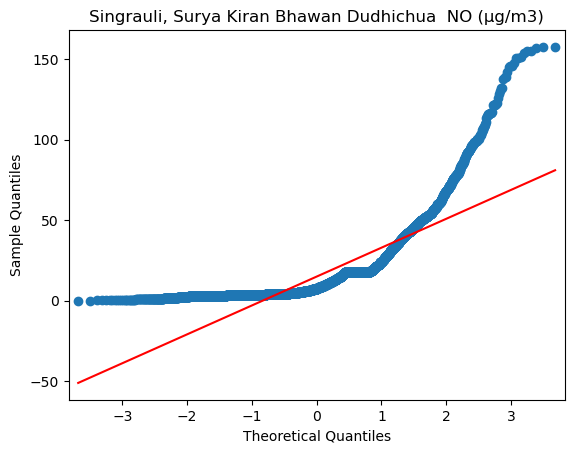

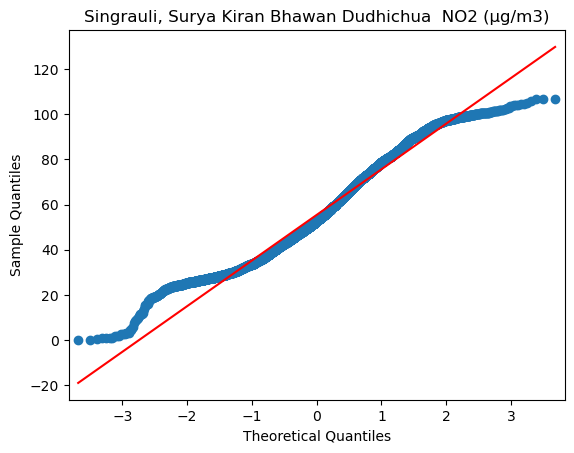

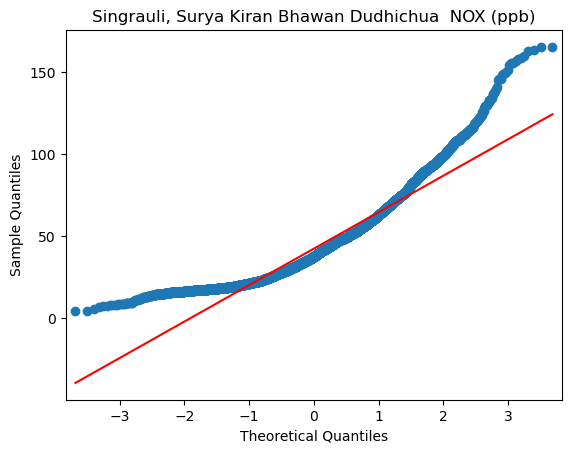

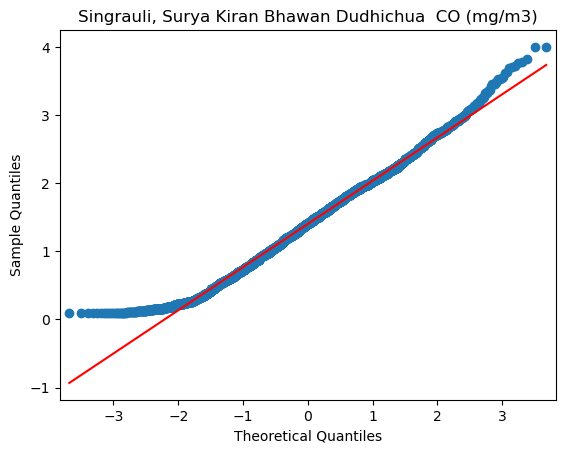

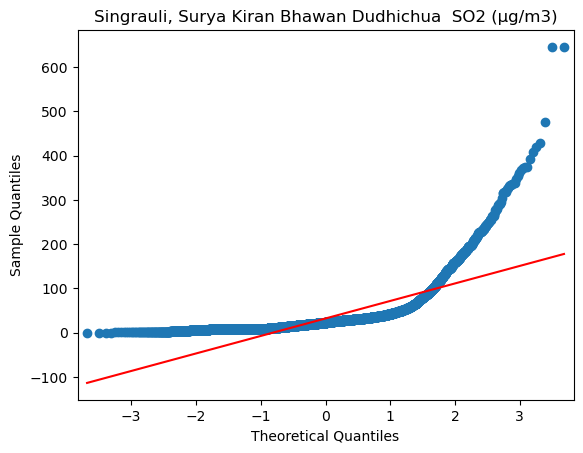

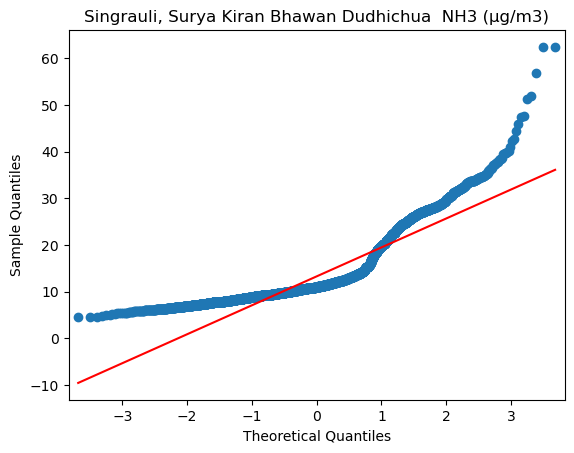

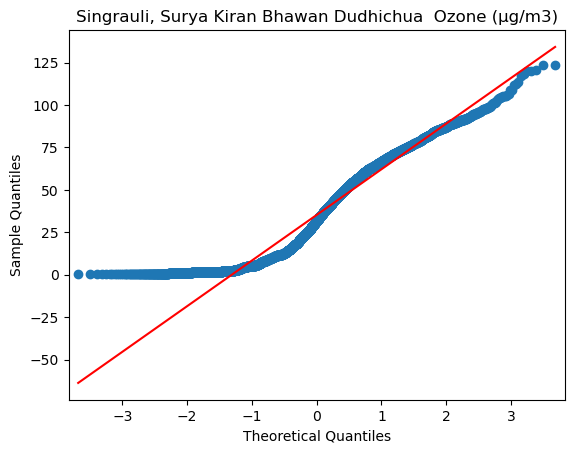

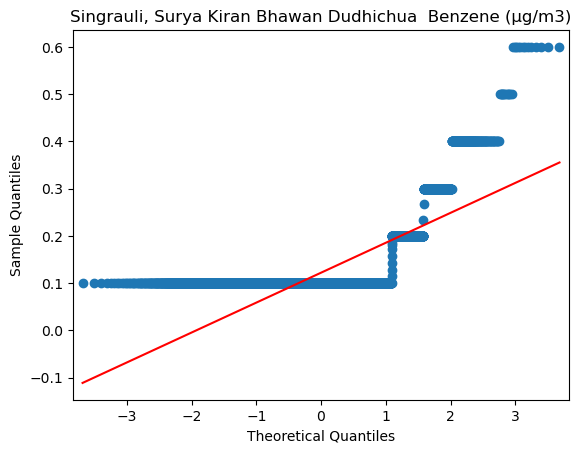

In [19]:
print("-")
for column in columns:
    fig, ax = plt.subplots()
    sm.qqplot(dataSet[column], line='s', ax=ax)  
    ax.set_title(column)
    plt.show()

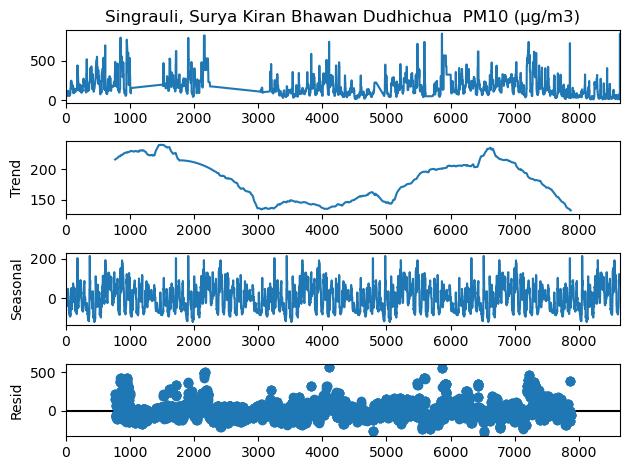

<Figure size 100x500 with 0 Axes>

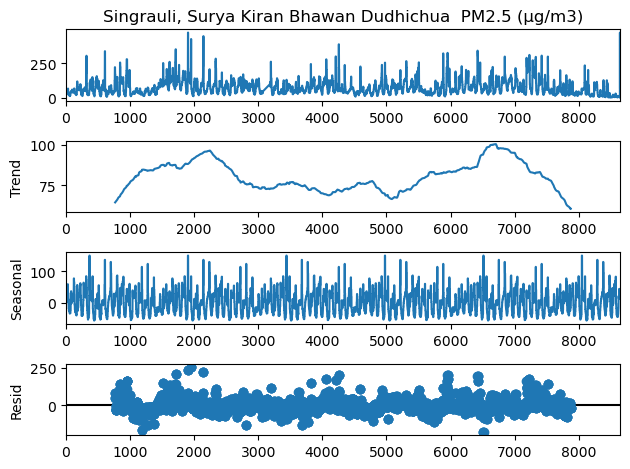

<Figure size 100x500 with 0 Axes>

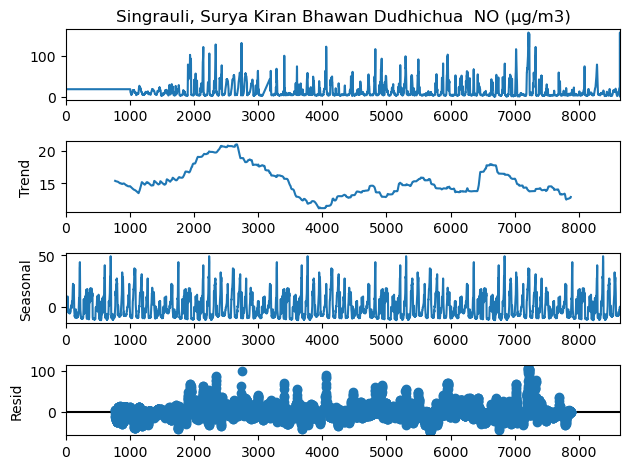

<Figure size 100x500 with 0 Axes>

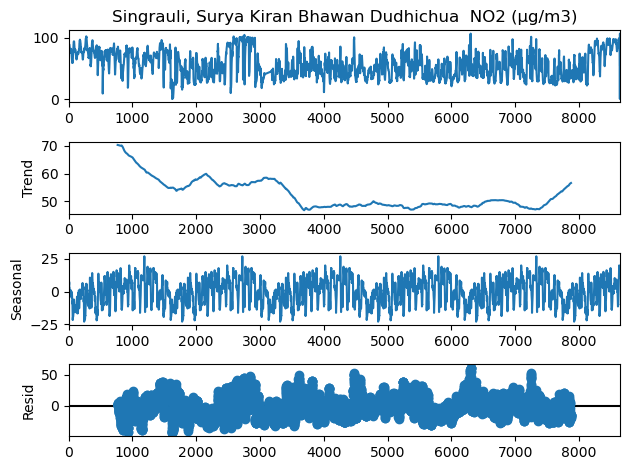

<Figure size 100x500 with 0 Axes>

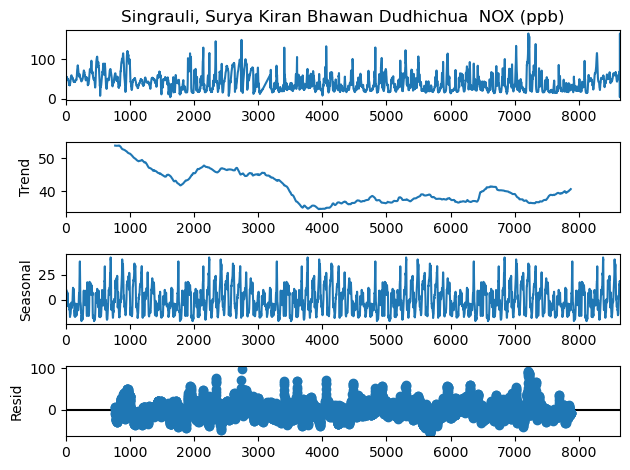

<Figure size 100x500 with 0 Axes>

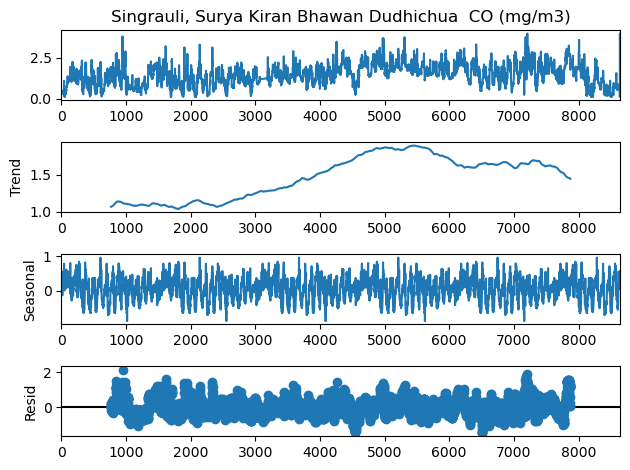

<Figure size 100x500 with 0 Axes>

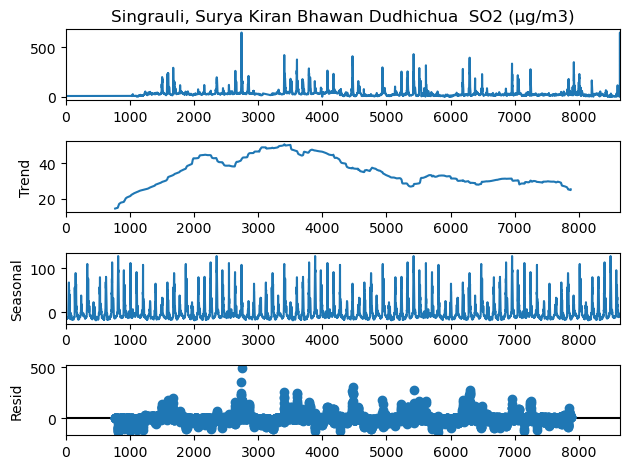

<Figure size 100x500 with 0 Axes>

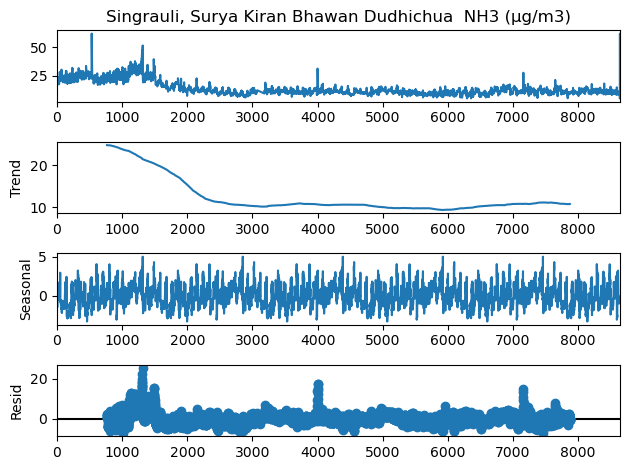

<Figure size 100x500 with 0 Axes>

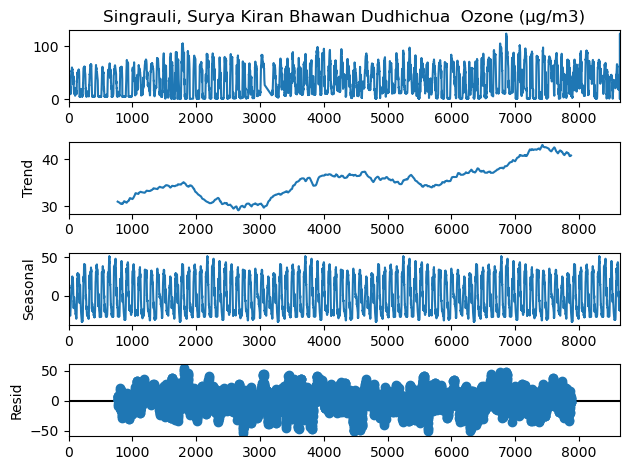

<Figure size 100x500 with 0 Axes>

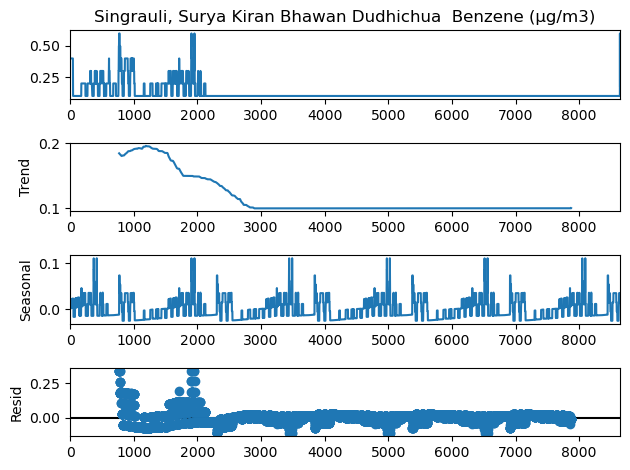

<Figure size 100x500 with 0 Axes>

In [20]:
for column in columns:
    decompose_result_mult = seasonal_decompose(dataSet[column] , period = 768+768 , model='additive')
    decompose_result_mult.plot()
    plt.figure(figsize=(1,5))
    plt.show()
    

In [21]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for column in columns:
    print("\n----",column, "----\n")
    result_trend = adfuller(dataSet[column], autolag = 'AIC')
    print("ADF Statistic (Trend):", result_trend[0])
    print("p-value (Trend):", result_trend[1])
    print("Critical Values (Trend):\n", result_trend[4])
          
    result_seasonality = adfuller(dataSet[column].diff().dropna(), autolag='AIC')
    print("\nADF Statistic (Seasonality):", result_seasonality[0])
    print("p-value (Seasonality):", result_seasonality[1])
    print("Critical Values (Seasonality):\n", result_seasonality[4])



---- Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3) ----

ADF Statistic (Trend): -9.121219449062005
p-value (Trend): 3.2013749669733968e-15
Critical Values (Trend):
 {'1%': -3.4311100803593018, '5%': -2.8618759043136137, '10%': -2.5669487969323943}

ADF Statistic (Seasonality): -22.81205689558395
p-value (Seasonality): 0.0
Critical Values (Seasonality):
 {'1%': -3.4311100803593018, '5%': -2.8618759043136137, '10%': -2.5669487969323943}

---- Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3) ----

ADF Statistic (Trend): -11.308820139207697
p-value (Trend): 1.2537252172855157e-20
Critical Values (Trend):
 {'1%': -3.4311100803593018, '5%': -2.8618759043136137, '10%': -2.5669487969323943}

ADF Statistic (Seasonality): -22.492383939614022
p-value (Seasonality): 0.0
Critical Values (Seasonality):
 {'1%': -3.4311100803593018, '5%': -2.8618759043136137, '10%': -2.5669487969323943}

---- Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3) ----

ADF Statistic (Trend): -15.2777305995

Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)


C:\Users\Shikh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


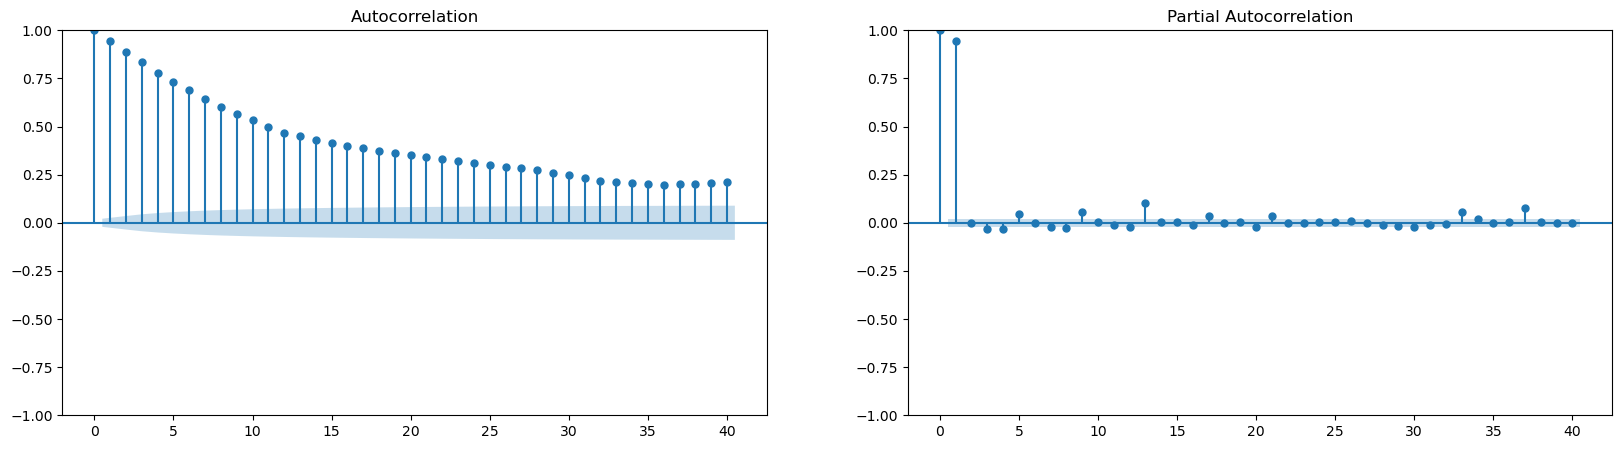

Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)


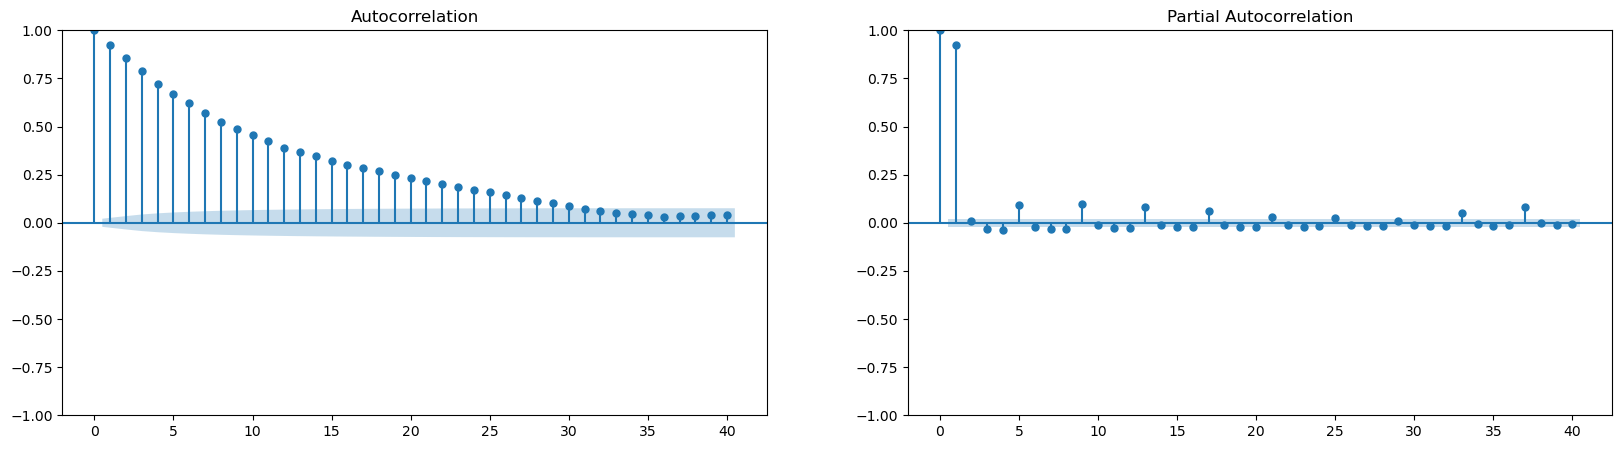

Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)


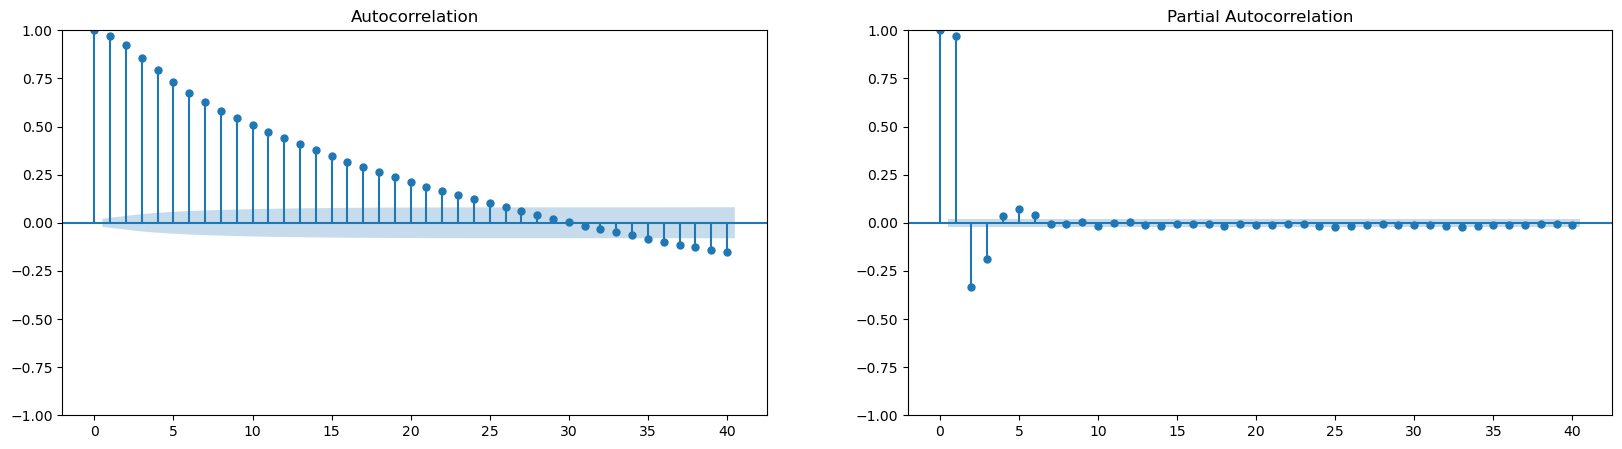

Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)


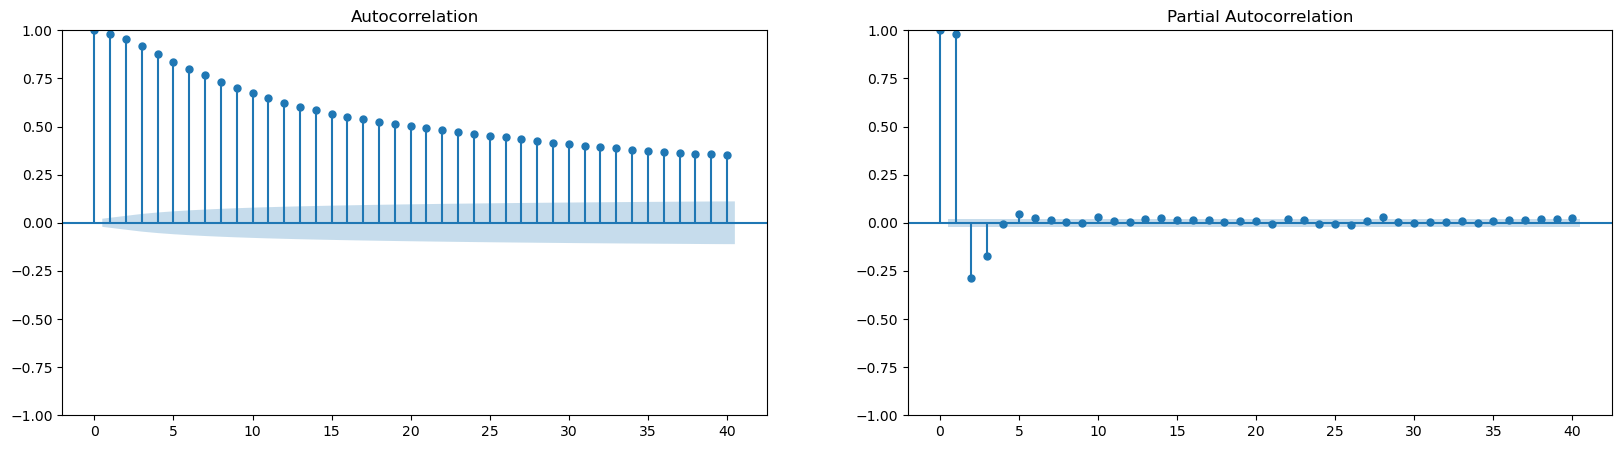

Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)


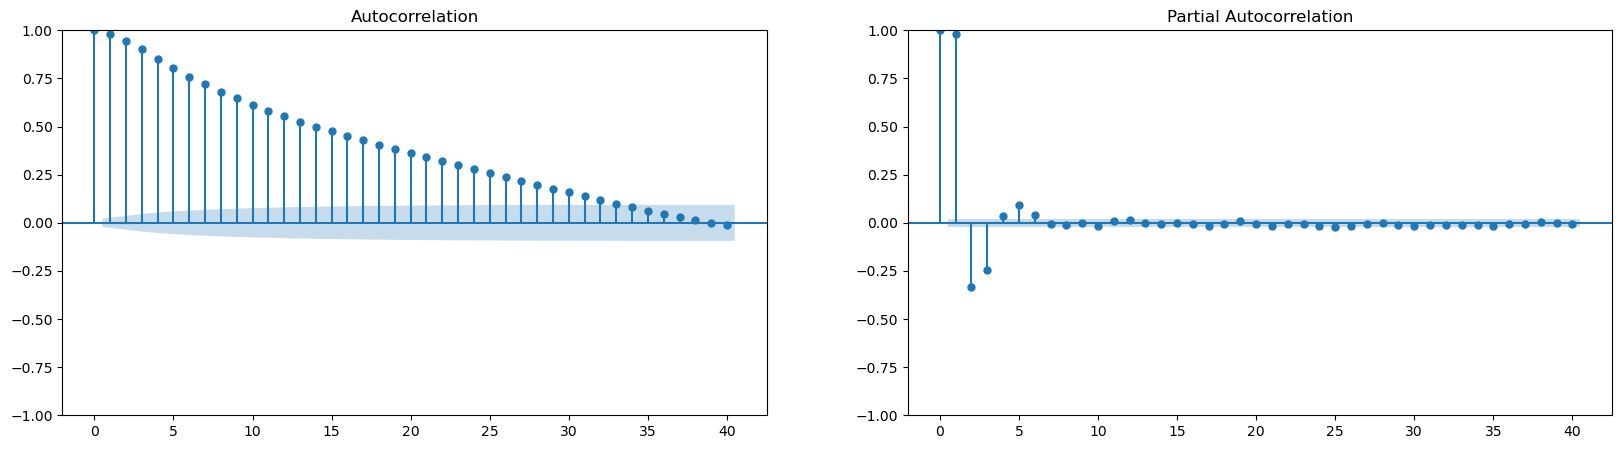

Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)


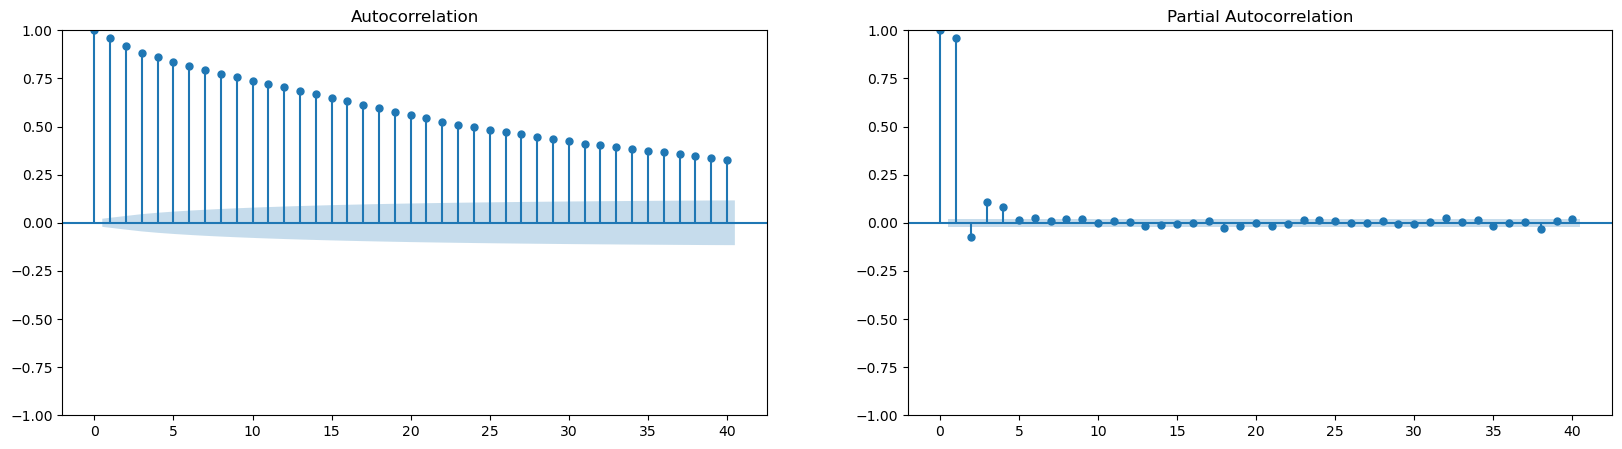

Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)


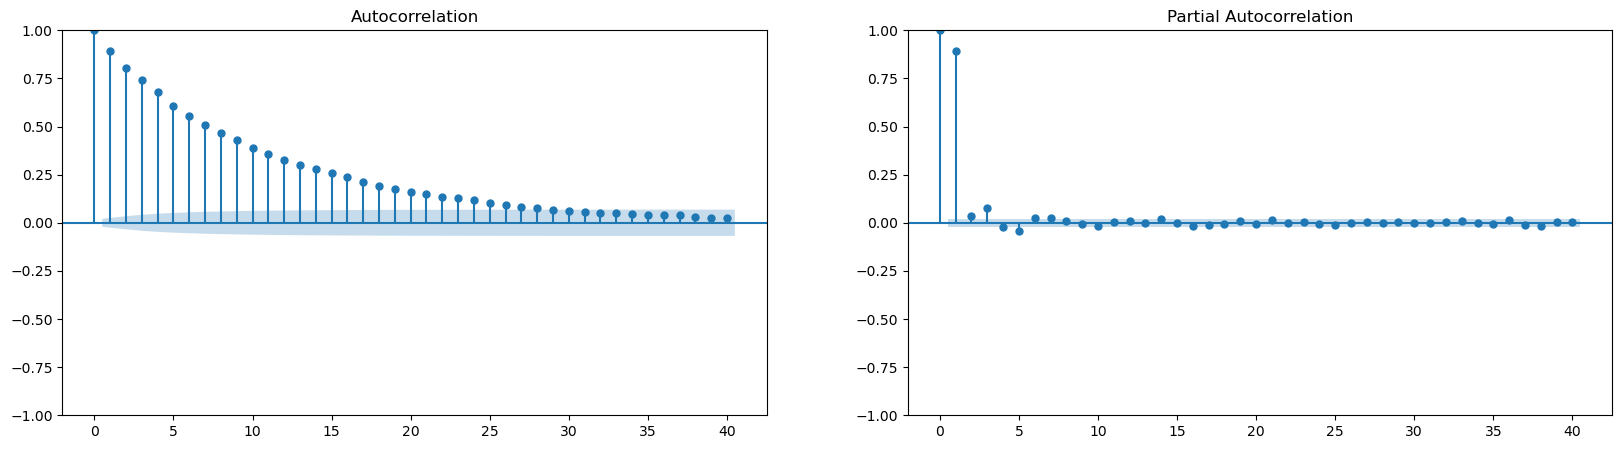

Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)


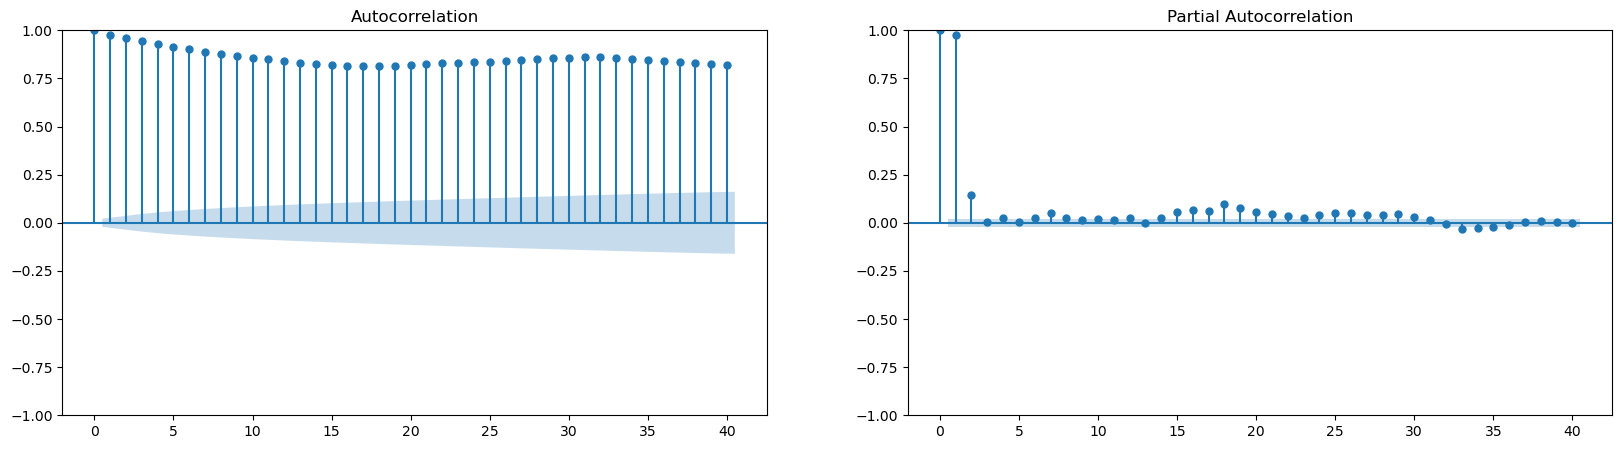

Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)


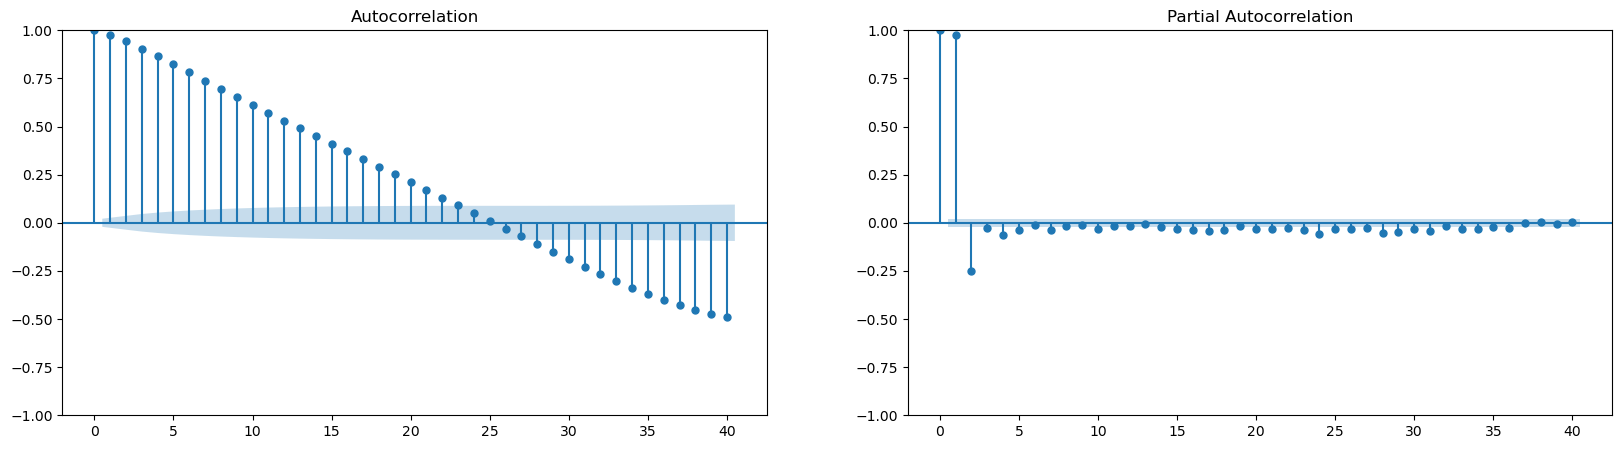

Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)


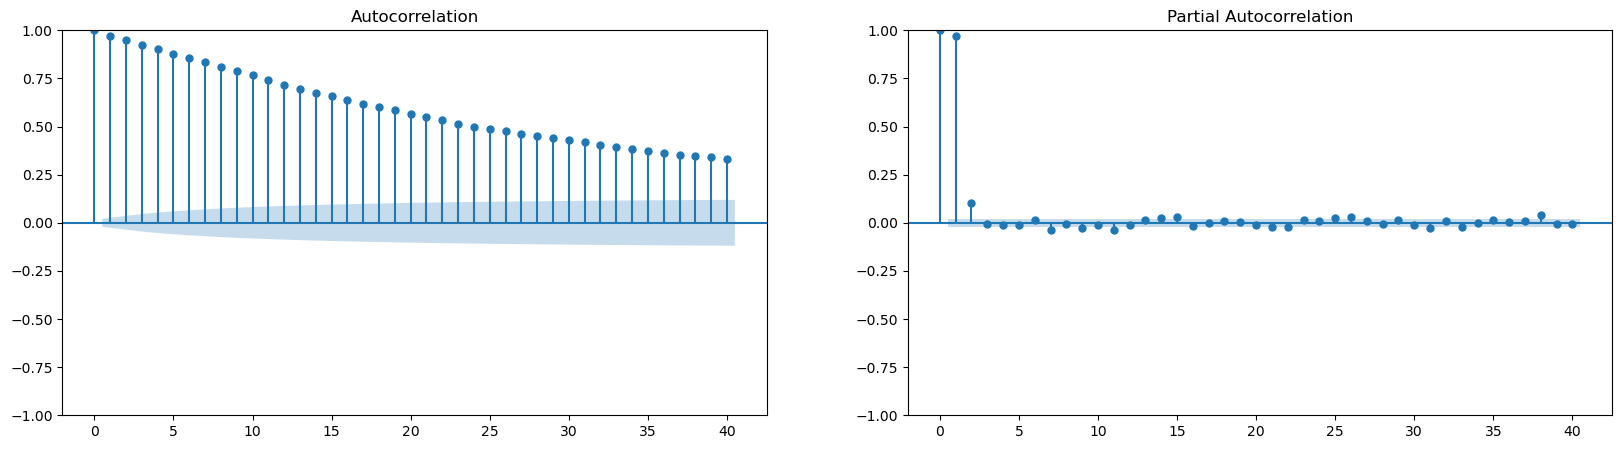

In [22]:
for column in columns:
    fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (20,5))
    print(column)
    plot_acf(dataSet[column], ax = ax1)
    plot_pacf(dataSet[column], ax = ax2)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [23]:
from statsmodels.tsa.ar_model import AutoReg

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8640
Model:                                                        AutoReg(2)   Log Likelihood              -44166.077
Method:                                                  Conditional MLE   S.D. of innovations             40.208
Date:                                                   Sat, 08 Jul 2023   AIC                          88340.154
Time:                                                           03:37:18   BIC                          88368.410
Sample:                                                                2   HQIC                         88349.788
                                                                    8640                                         
                                                               coef    std err          

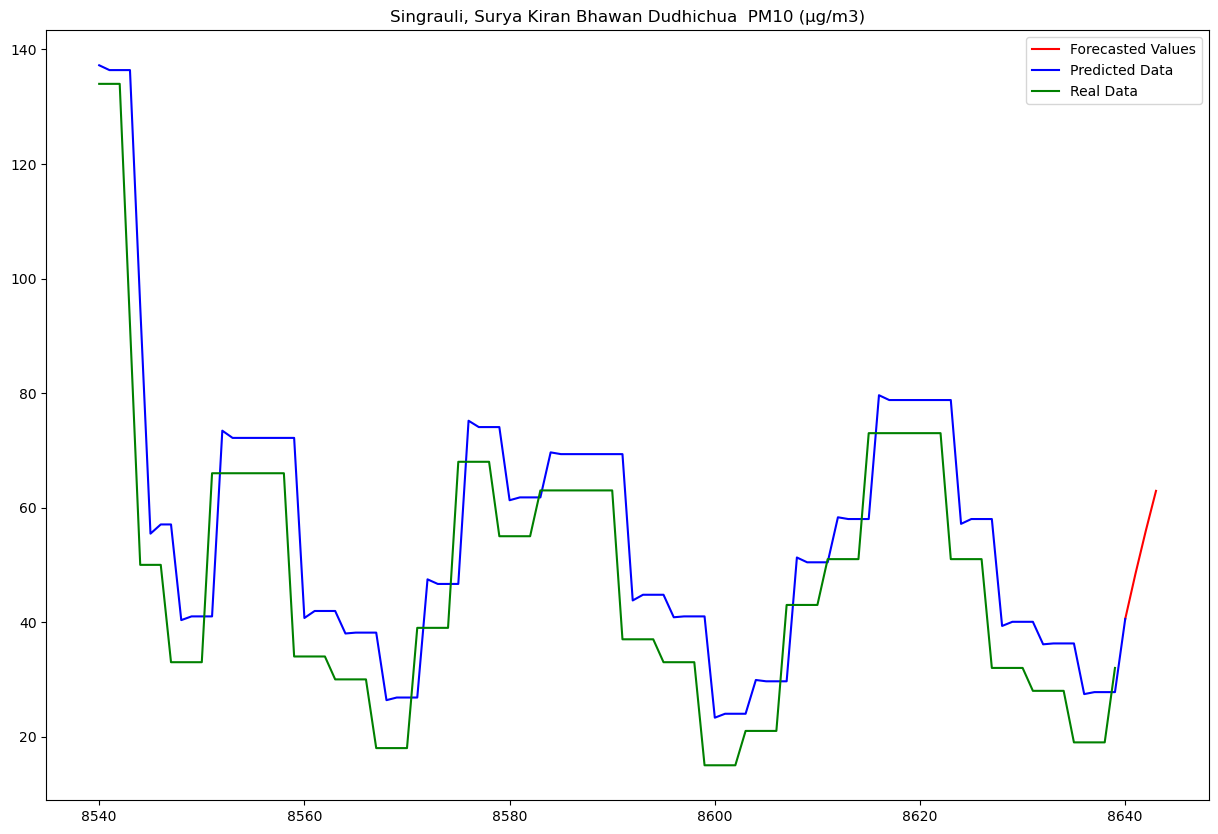

Mean Absolute Error: 9.997905641686028
Root Mean Squared Error: 12.807041015837923
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(2)   Log Likelihood              -38120.032
Method:                                                   Conditional MLE   S.D. of innovations             19.968
Date:                                                    Sat, 08 Jul 2023   AIC                          76248.064
Time:                                                            03:37:18   BIC                          76276.320
Sample:                                                                 2   HQIC                         76257.698
                                                                     8640                                       

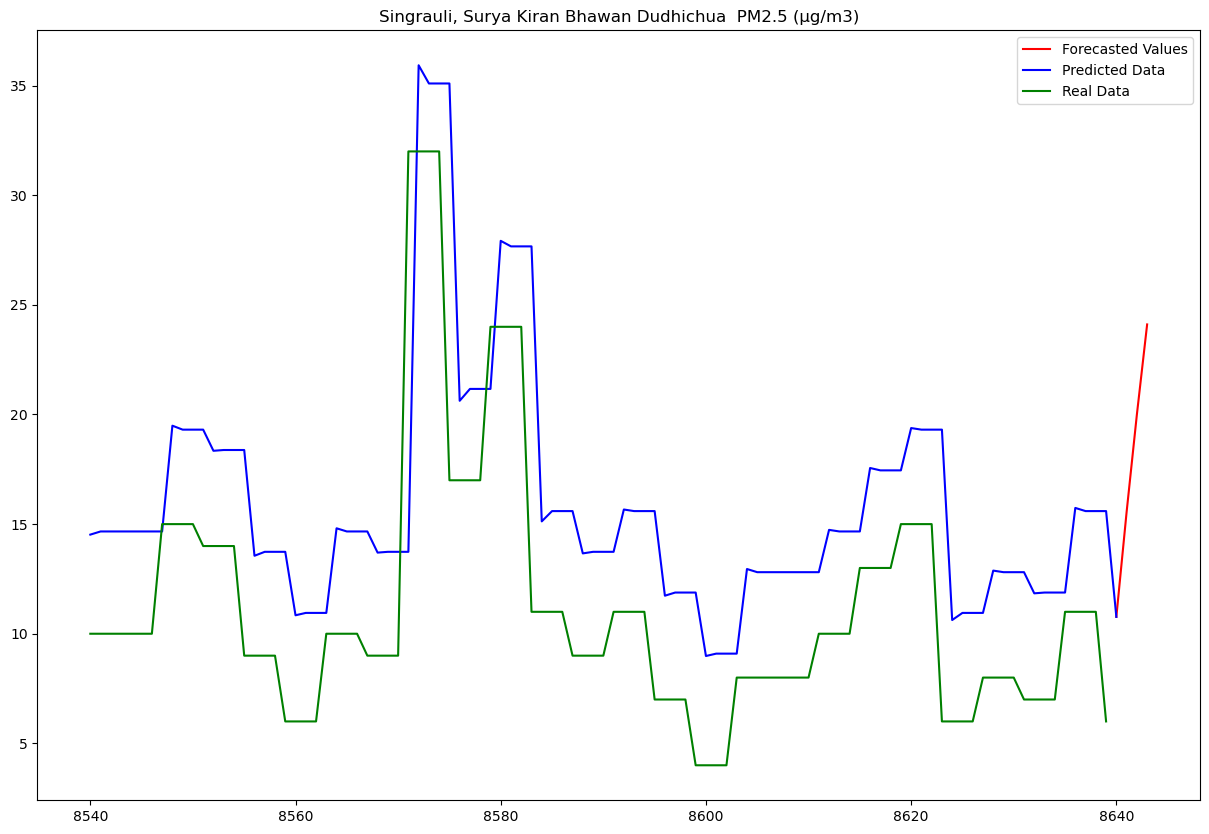

Mean Absolute Error: 5.0359820715358525
Root Mean Squared Error: 5.739367454946405
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(2)   Log Likelihood              -21144.423
Method:                                                Conditional MLE   S.D. of innovations              2.798
Date:                                                 Sat, 08 Jul 2023   AIC                          42296.847
Time:                                                         03:37:18   BIC                          42325.103
Sample:                                                              2   HQIC                         42306.481
                                                                  8640                                         
                     

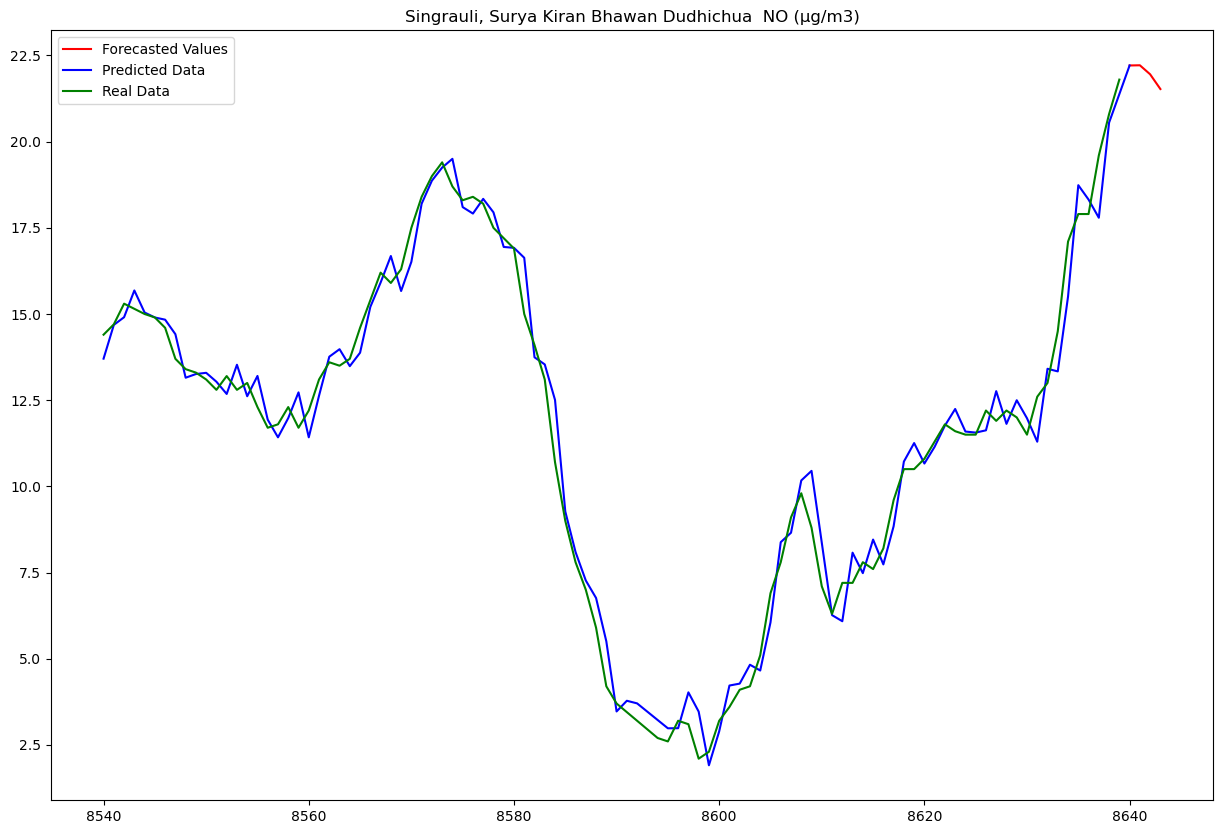

Mean Absolute Error: 0.5385183487941294
Root Mean Squared Error: 0.6791086790313348
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -21776.975
Method:                                                 Conditional MLE   S.D. of innovations              3.011
Date:                                                  Sat, 08 Jul 2023   AIC                          43561.949
Time:                                                          03:37:18   BIC                          43590.205
Sample:                                                               2   HQIC                         43571.584
                                                                   8640                                         
            

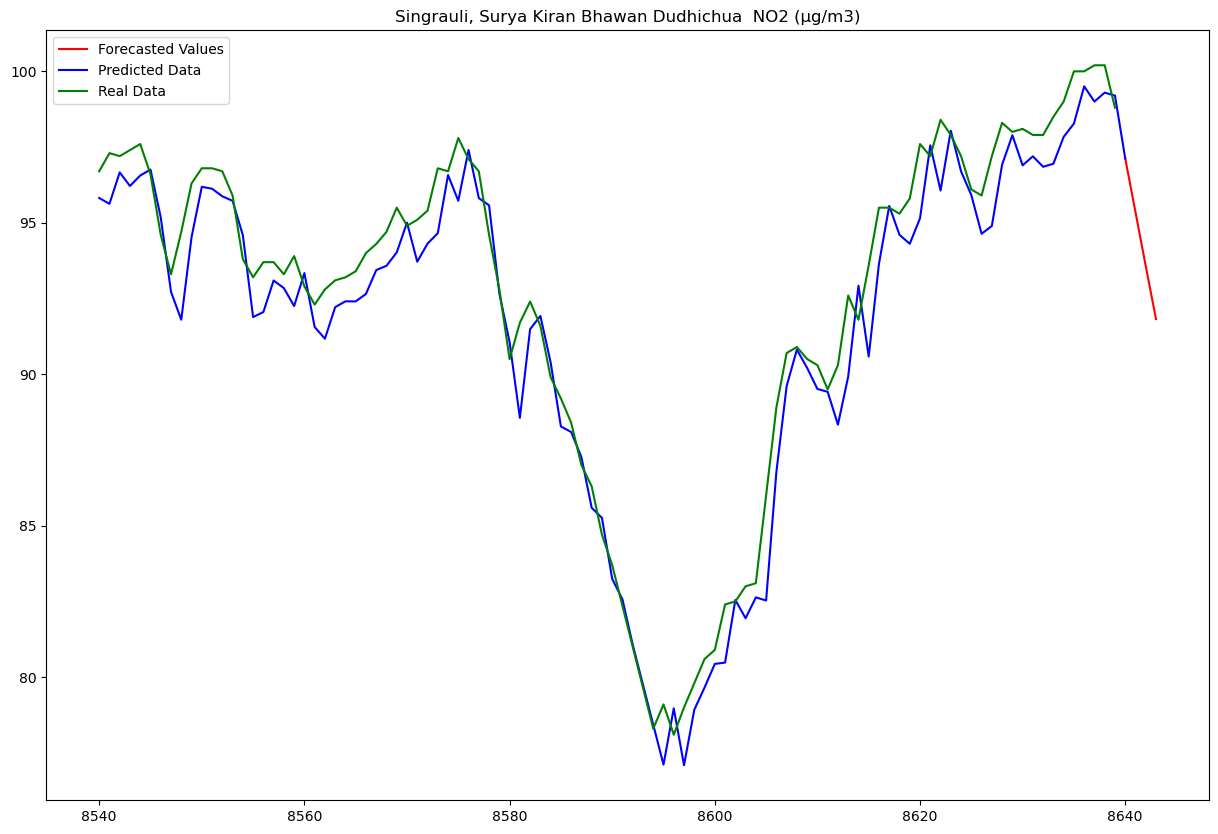

Mean Absolute Error: 1.0149966459763704
Root Mean Squared Error: 1.2730811601111378
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8640
Model:                                                     AutoReg(2)   Log Likelihood              -21178.954
Method:                                               Conditional MLE   S.D. of innovations              2.809
Date:                                                Sat, 08 Jul 2023   AIC                          42365.907
Time:                                                        03:37:18   BIC                          42394.163
Sample:                                                             2   HQIC                         42375.542
                                                                 8640                                         
                            

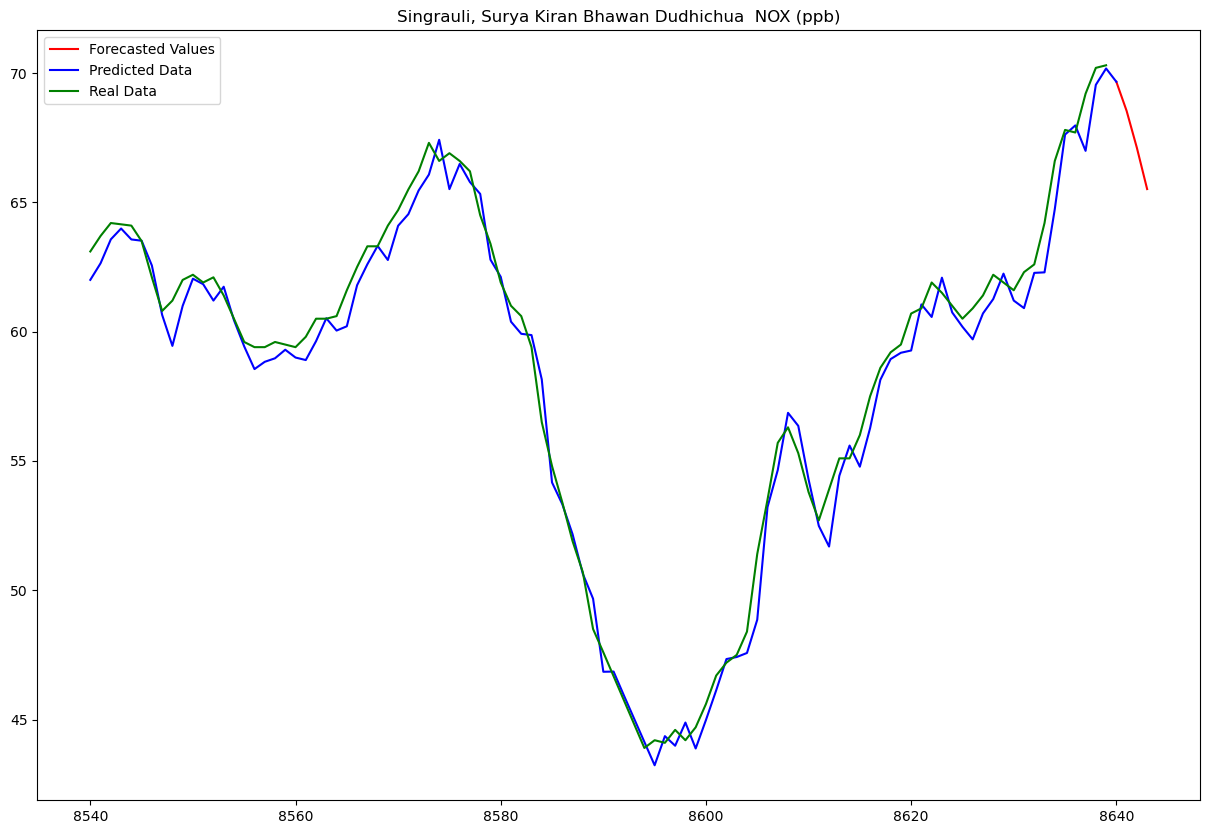

Mean Absolute Error: 0.680213076132455
Root Mean Squared Error: 0.8627181893328912
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8640
Model:                                                      AutoReg(2)   Log Likelihood                3196.420
Method:                                                Conditional MLE   S.D. of innovations              0.167
Date:                                                 Sat, 08 Jul 2023   AIC                          -6384.841
Time:                                                         03:37:18   BIC                          -6356.585
Sample:                                                              2   HQIC                         -6375.206
                                                                  8640                                         
                     

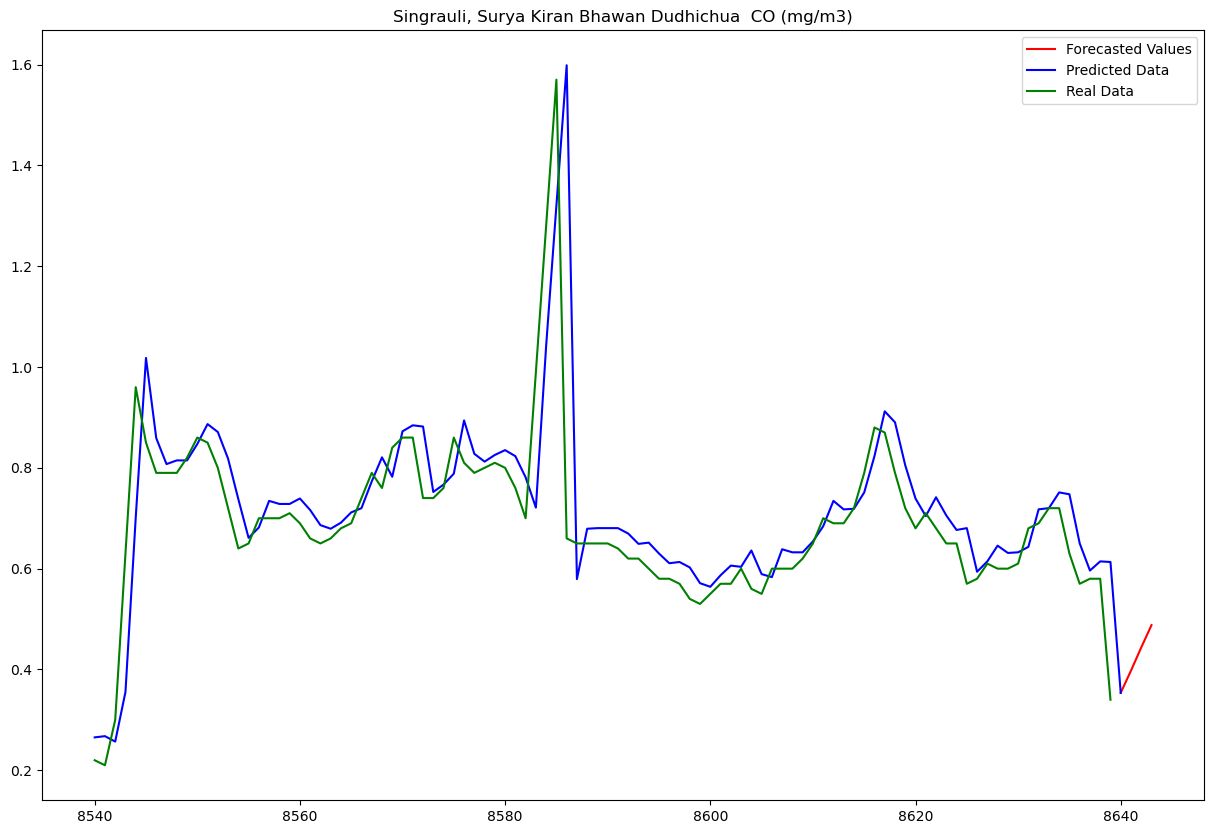

Mean Absolute Error: 0.06349337473985234
Root Mean Squared Error: 0.12402669237122571
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -35690.845
Method:                                                 Conditional MLE   S.D. of innovations             15.073
Date:                                                  Sat, 08 Jul 2023   AIC                          71389.691
Time:                                                          03:37:19   BIC                          71417.947
Sample:                                                               2   HQIC                         71399.325
                                                                   8640                                         
          

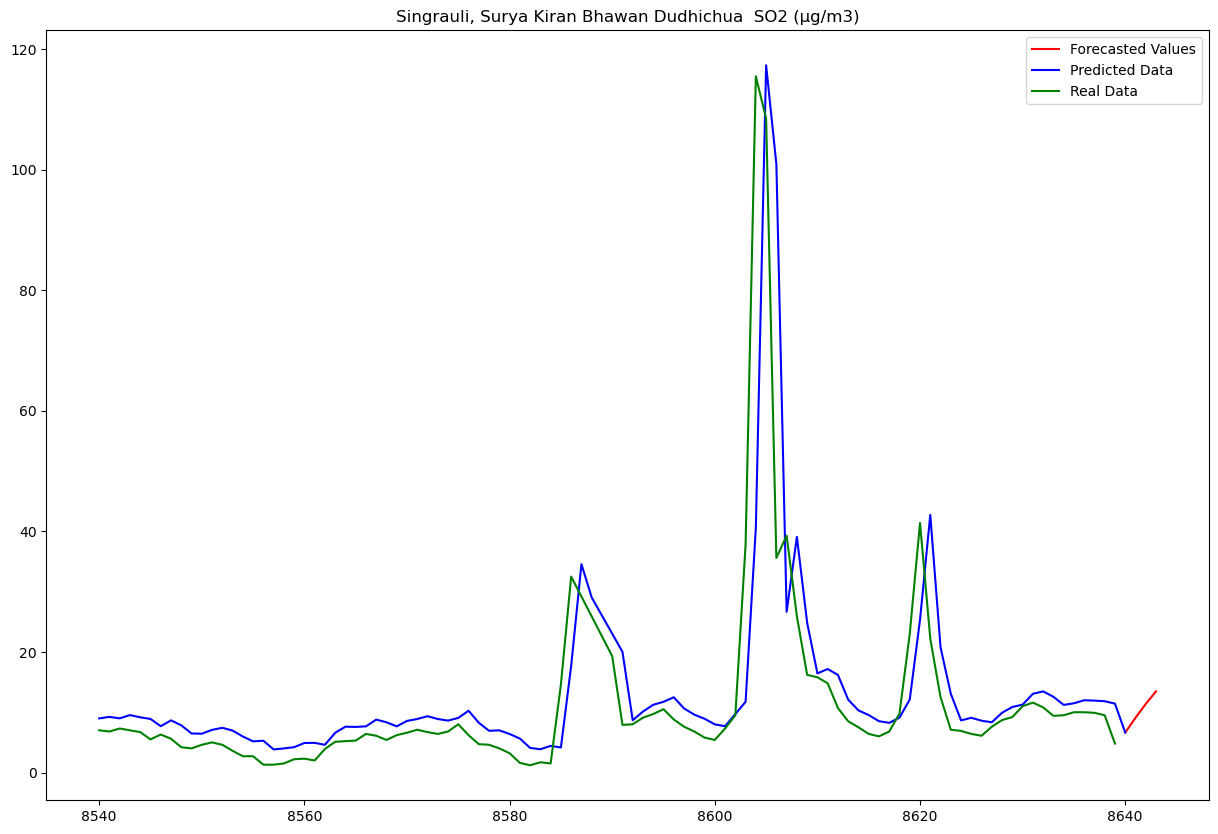

Mean Absolute Error: 5.139238616358898
Root Mean Squared Error: 11.41102988858203
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8640
Model:                                                       AutoReg(2)   Log Likelihood              -12626.145
Method:                                                 Conditional MLE   S.D. of innovations              1.044
Date:                                                  Sat, 08 Jul 2023   AIC                          25260.290
Time:                                                          03:37:19   BIC                          25288.546
Sample:                                                               2   HQIC                         25269.925
                                                                   8640                                         
              

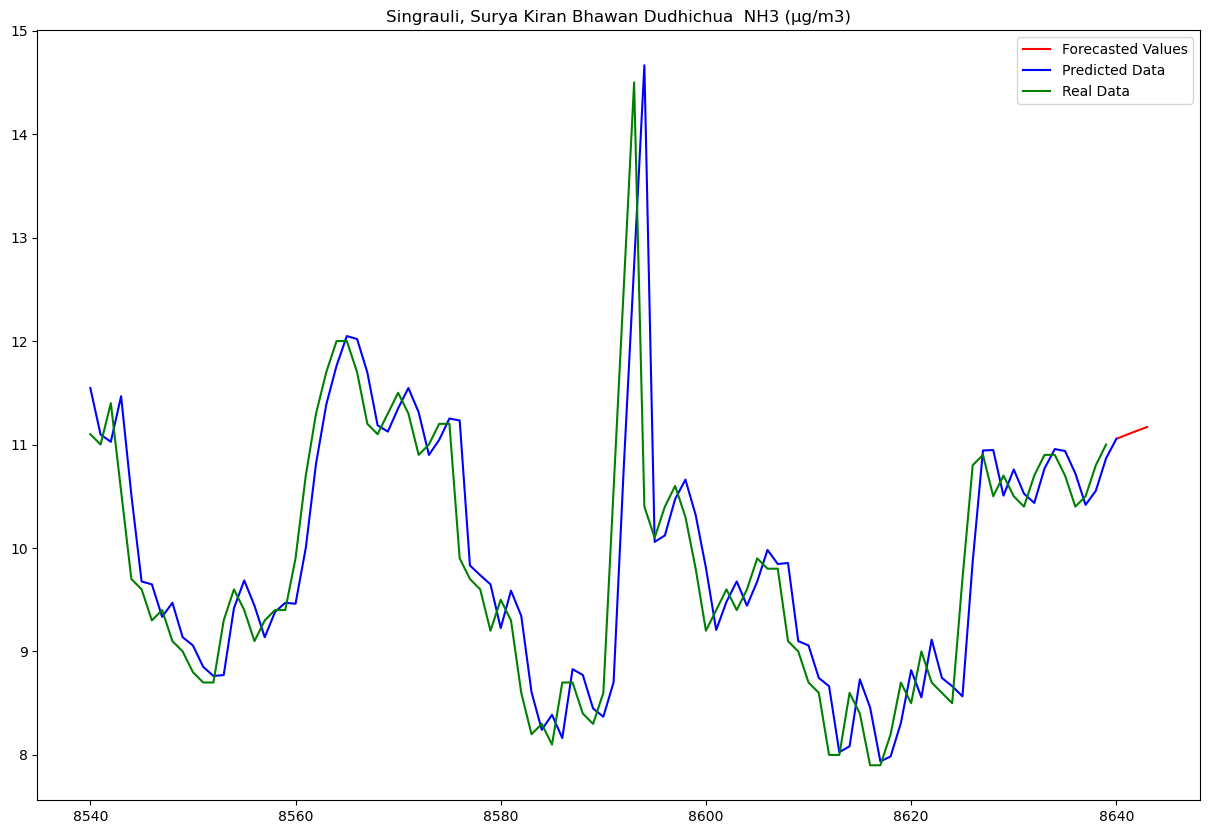

Mean Absolute Error: 0.38601713221981465
Root Mean Squared Error: 0.6506204060723245
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8640
Model:                                                         AutoReg(2)   Log Likelihood              -26584.645
Method:                                                   Conditional MLE   S.D. of innovations              5.252
Date:                                                    Sat, 08 Jul 2023   AIC                          53177.289
Time:                                                            03:37:19   BIC                          53205.545
Sample:                                                                 2   HQIC                         53186.923
                                                                     8640                                     

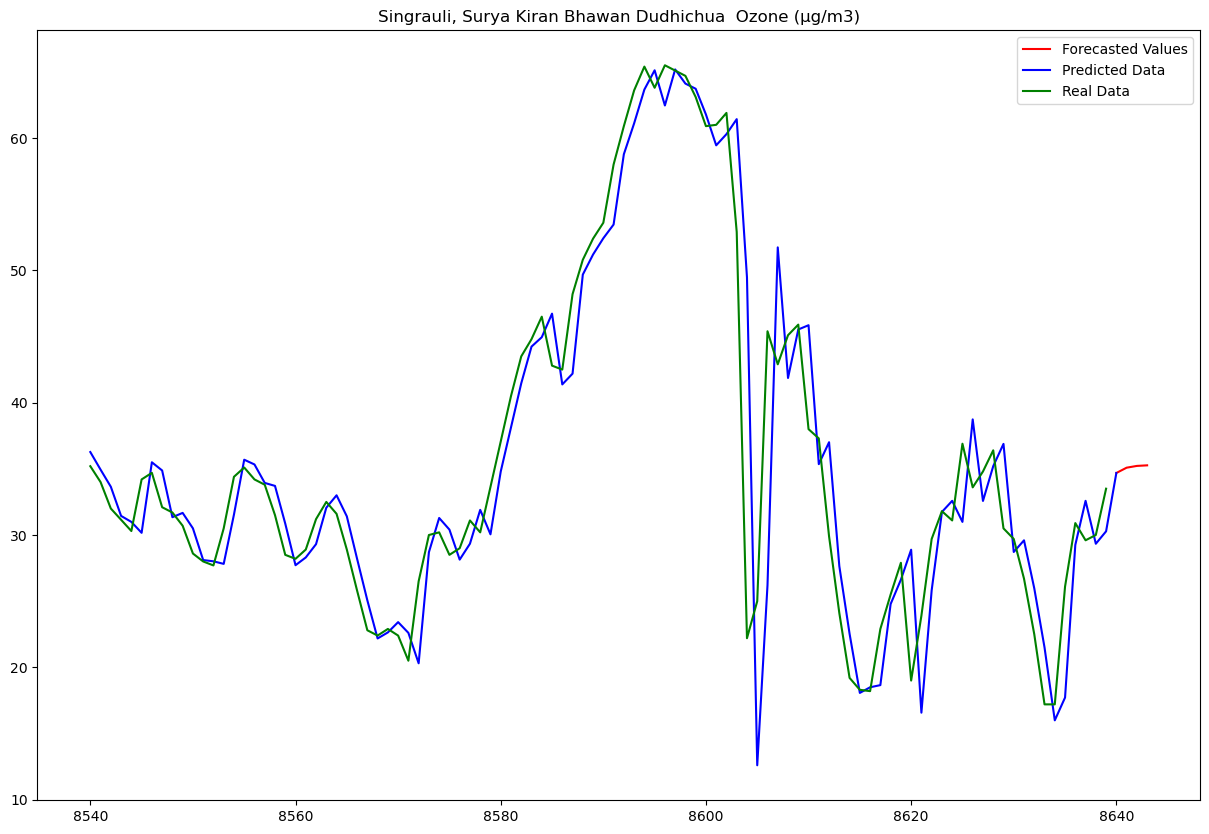

Mean Absolute Error: 2.8940956929890205
Root Mean Squared Error: 4.775819407486162
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8640
Model:                                                           AutoReg(2)   Log Likelihood               25041.140
Method:                                                     Conditional MLE   S.D. of innovations              0.013
Date:                                                      Sat, 08 Jul 2023   AIC                         -50074.281
Time:                                                              03:37:19   BIC                         -50046.025
Sample:                                                                   2   HQIC                        -50064.646
                                                                       8640                       

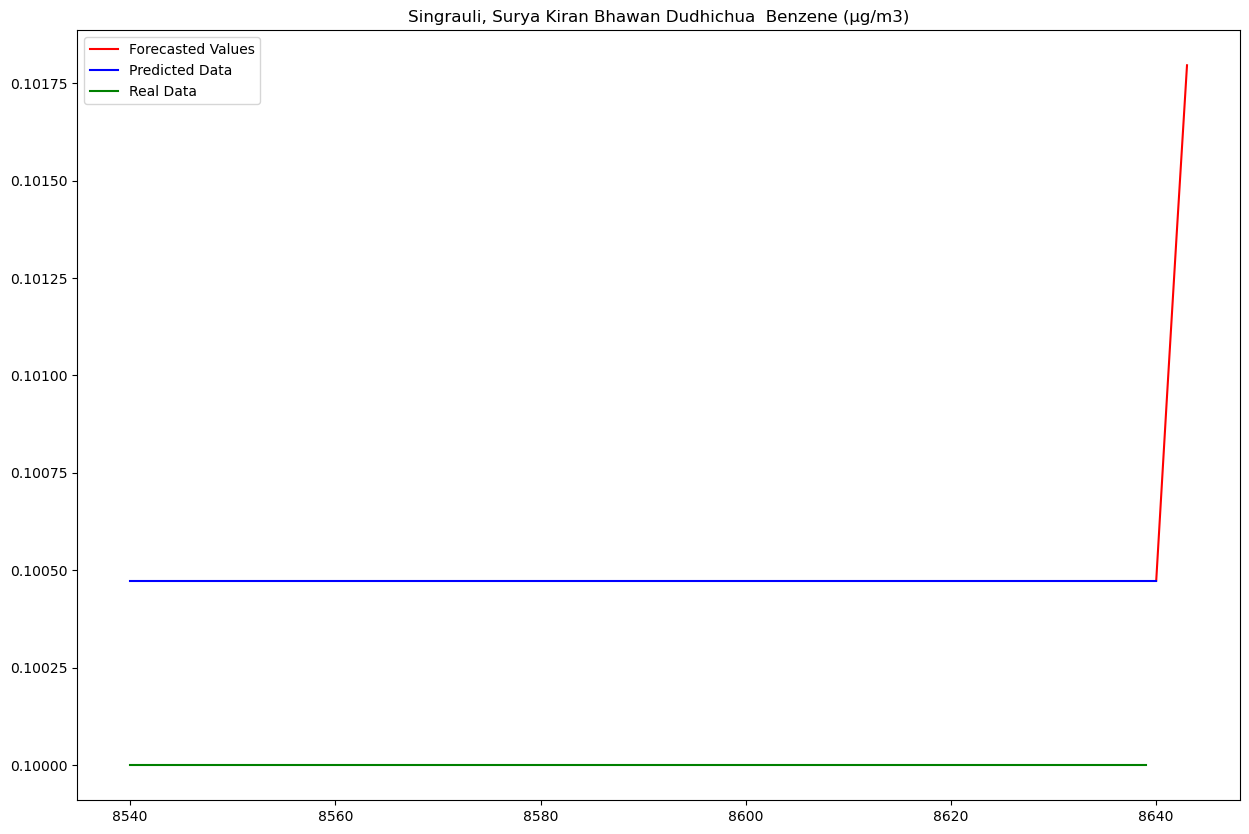

Mean Absolute Error: 0.00047358621369454623
Root Mean Squared Error: 0.0004735862136945462


In [24]:
from sklearn.metrics import mean_absolute_error
for column in columns:
    data = dataSet[column][:8640]
    train_data = data[:-100]
    test_data = data[-100:]
    ar_model = AutoReg(data, lags = 2).fit()
    print(ar_model.summary())
    #print(len(train_data) , len(data))
    pred = ar_model.predict(start = len(train_data), end = len(data), dynamic=False)
    forecast = ar_model.predict(start = len(data), end = len(data)+3, dynamic=False)
    plt.figure(figsize = (15,10))
    plt.title(column)
    plt.plot(forecast , color ="red", label="Forecasted Values")
    plt.plot(pred, color = "blue", label="Predicted Data")
    plt.plot(test_data, color = "green", label="Real Data")
    plt.legend()
    plt.show()
    pred = ar_model.predict(start = len(train_data), end = len(data)-1, dynamic=False)
    rmse = sqrt(mean_squared_error(pred, test_data))
    mean = data.mean()
#     print("Mean :",mean)
    print("Mean Absolute Error:", mean_absolute_error(pred,test_data))
    print("Root Mean Squared Error:",rmse)


## 